In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [31]:
# file_path = '/content/drive/My Drive/ML project/phase2_students_before_cleaning.csv'

file_id = '1bQ5Ak9ji-g2khzSqB9LxB0xEOd8_0Wp0'  # Replace this with your actual file ID
url = f'https://drive.google.com/uc?id={file_id}'

data = pd.read_csv(url)
# data = pd.read_csv(file_path)

df = data.copy()
df.head()

flow_time  header_size  packet_duration  overall_rate     src_rate  \
0   0.041268     15499.00            64.00   7805.845961  7805.845961   
1   0.018393      3702.54            64.00   6728.994198  6728.994198   
2   0.000000       182.00            64.00     38.559448    38.559448   
3   0.109292     35027.55            62.72   6783.234241  6783.234241   
4   0.000000       162.00            64.00      2.305494     2.305494   

   dst_rate  fin_packets  urg_packets  rst_packets  max_value  ...  syn_flags  \
0       0.0          0.0         0.00         0.00      50.00  ...          0   
1       0.0          0.0         0.00         0.01      54.28  ...          0   
2       0.0          0.0         0.00         0.00     182.00  ...          0   
3       0.0          0.0         0.03         0.11      65.11  ...          0   
4       0.0          0.0         0.00         0.00     162.00  ...          0   

   rst_flags  psh_flags  ack_flags  protocol_http  protocol_https  \
0          0          0          0              0               0   
1          0          0          0              0               0   
2          0          0          0              0               0   
3          0          0          0              0               0   
4          0          0          0              0               0   

   protocol_tcp  protocol_udp  protocol_icmp  label  
0             0             1              0   DDoS  
1             0             1              0   DDoS  
2             0             1              0    DoS  
3             0             1              0    DoS  
4             0             1              0    DoS  

[5 rows x 22 columns]

flow_time  header_size  packet_duration  overall_rate     src_rate  \
0   0.041268     15499.00            64.00   7805.845961  7805.845961   
1   0.018393      3702.54            64.00   6728.994198  6728.994198   
2   0.000000       182.00            64.00     38.559448    38.559448   
3   0.109292     35027.55            62.72   6783.234241  6783.234241   
4   0.000000       162.00            64.00      2.305494     2.305494   

   dst_rate  fin_packets  urg_packets  rst_packets  max_value  ...  syn_flags  \
0       0.0          0.0         0.00         0.00      50.00  ...          0   
1       0.0          0.0         0.00         0.01      54.28  ...          0   
2       0.0          0.0         0.00         0.00     182.00  ...          0   
3       0.0          0.0         0.03         0.11      65.11  ...          0   
4       0.0          0.0         0.00         0.00     162.00  ...          0   

   rst_flags  psh_flags  ack_flags  protocol_http  protocol_https  \
0          0          0          0              0               0   
1          0          0          0              0               0   
2          0          0          0              0               0   
3          0          0          0              0               0   
4          0          0          0              0               0   

   protocol_tcp  protocol_udp  protocol_icmp  label  
0             0             1              0   DDoS  
1             0             1              0   DDoS  
2             0             1              0    DoS  
3             0             1              0    DoS  
4             0             1              0    DoS  

[5 rows x 22 columns]

In [32]:
df.dtypes

flow_time           float64
header_size         float64
packet_duration     float64
overall_rate        float64
src_rate            float64
dst_rate            float64
fin_packets         float64
urg_packets         float64
rst_packets         float64
max_value           float64
value_covariance    float64
fin_flags             int64
syn_flags             int64
rst_flags             int64
psh_flags             int64
ack_flags             int64
protocol_http         int64
protocol_https        int64
protocol_tcp          int64
protocol_udp          int64
protocol_icmp         int64
label                object
dtype: object

flow_time           float64
header_size         float64
packet_duration     float64
overall_rate        float64
src_rate            float64
dst_rate            float64
fin_packets         float64
urg_packets         float64
rst_packets         float64
max_value           float64
value_covariance    float64
fin_flags             int64
syn_flags             int64
rst_flags             int64
psh_flags             int64
ack_flags             int64
protocol_http         int64
protocol_https        int64
protocol_tcp          int64
protocol_udp          int64
protocol_icmp         int64
label                object
dtype: object

In [33]:
df.columns

Index(['flow_time', 'header_size', 'packet_duration', 'overall_rate',
       'src_rate', 'dst_rate', 'fin_packets', 'urg_packets', 'rst_packets',
       'max_value', 'value_covariance', 'fin_flags', 'syn_flags', 'rst_flags',
       'psh_flags', 'ack_flags', 'protocol_http', 'protocol_https',
       'protocol_tcp', 'protocol_udp', 'protocol_icmp', 'label'],
      dtype='object')

Index(['flow_time', 'header_size', 'packet_duration', 'overall_rate',
       'src_rate', 'dst_rate', 'fin_packets', 'urg_packets', 'rst_packets',
       'max_value', 'value_covariance', 'fin_flags', 'syn_flags', 'rst_flags',
       'psh_flags', 'ack_flags', 'protocol_http', 'protocol_https',
       'protocol_tcp', 'protocol_udp', 'protocol_icmp', 'label'],
      dtype='object')

In [34]:
target = df['label']

In [35]:
numerical_columns = df.select_dtypes(include=np.number).columns
for col in numerical_columns:
    if (df[col] < 0).any():
        df[col] = df[col].clip(lower=0)

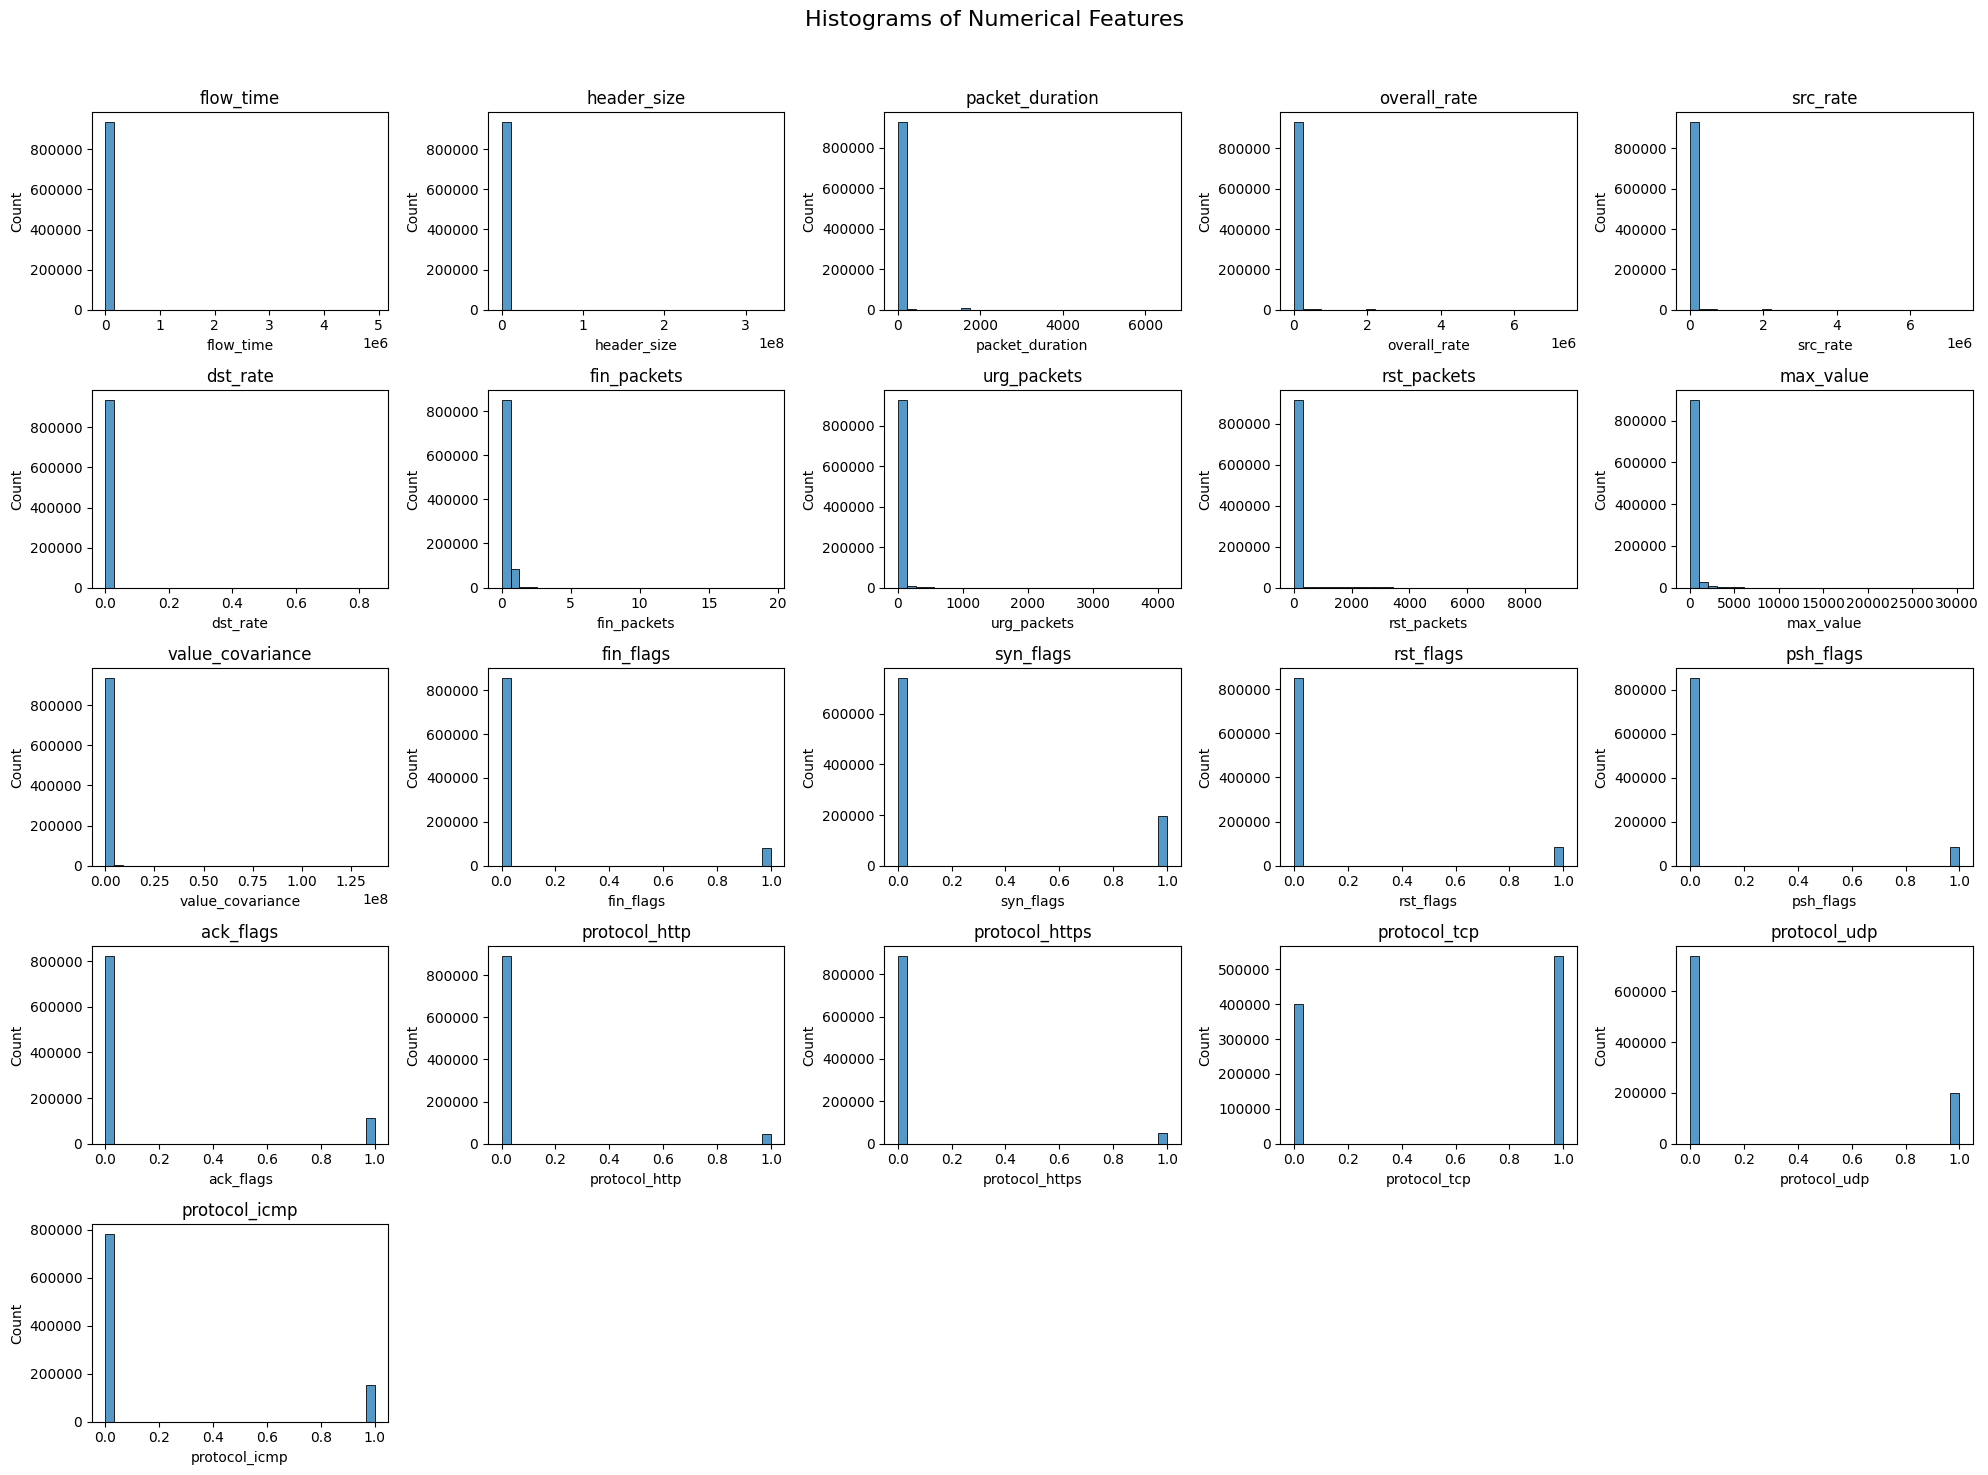

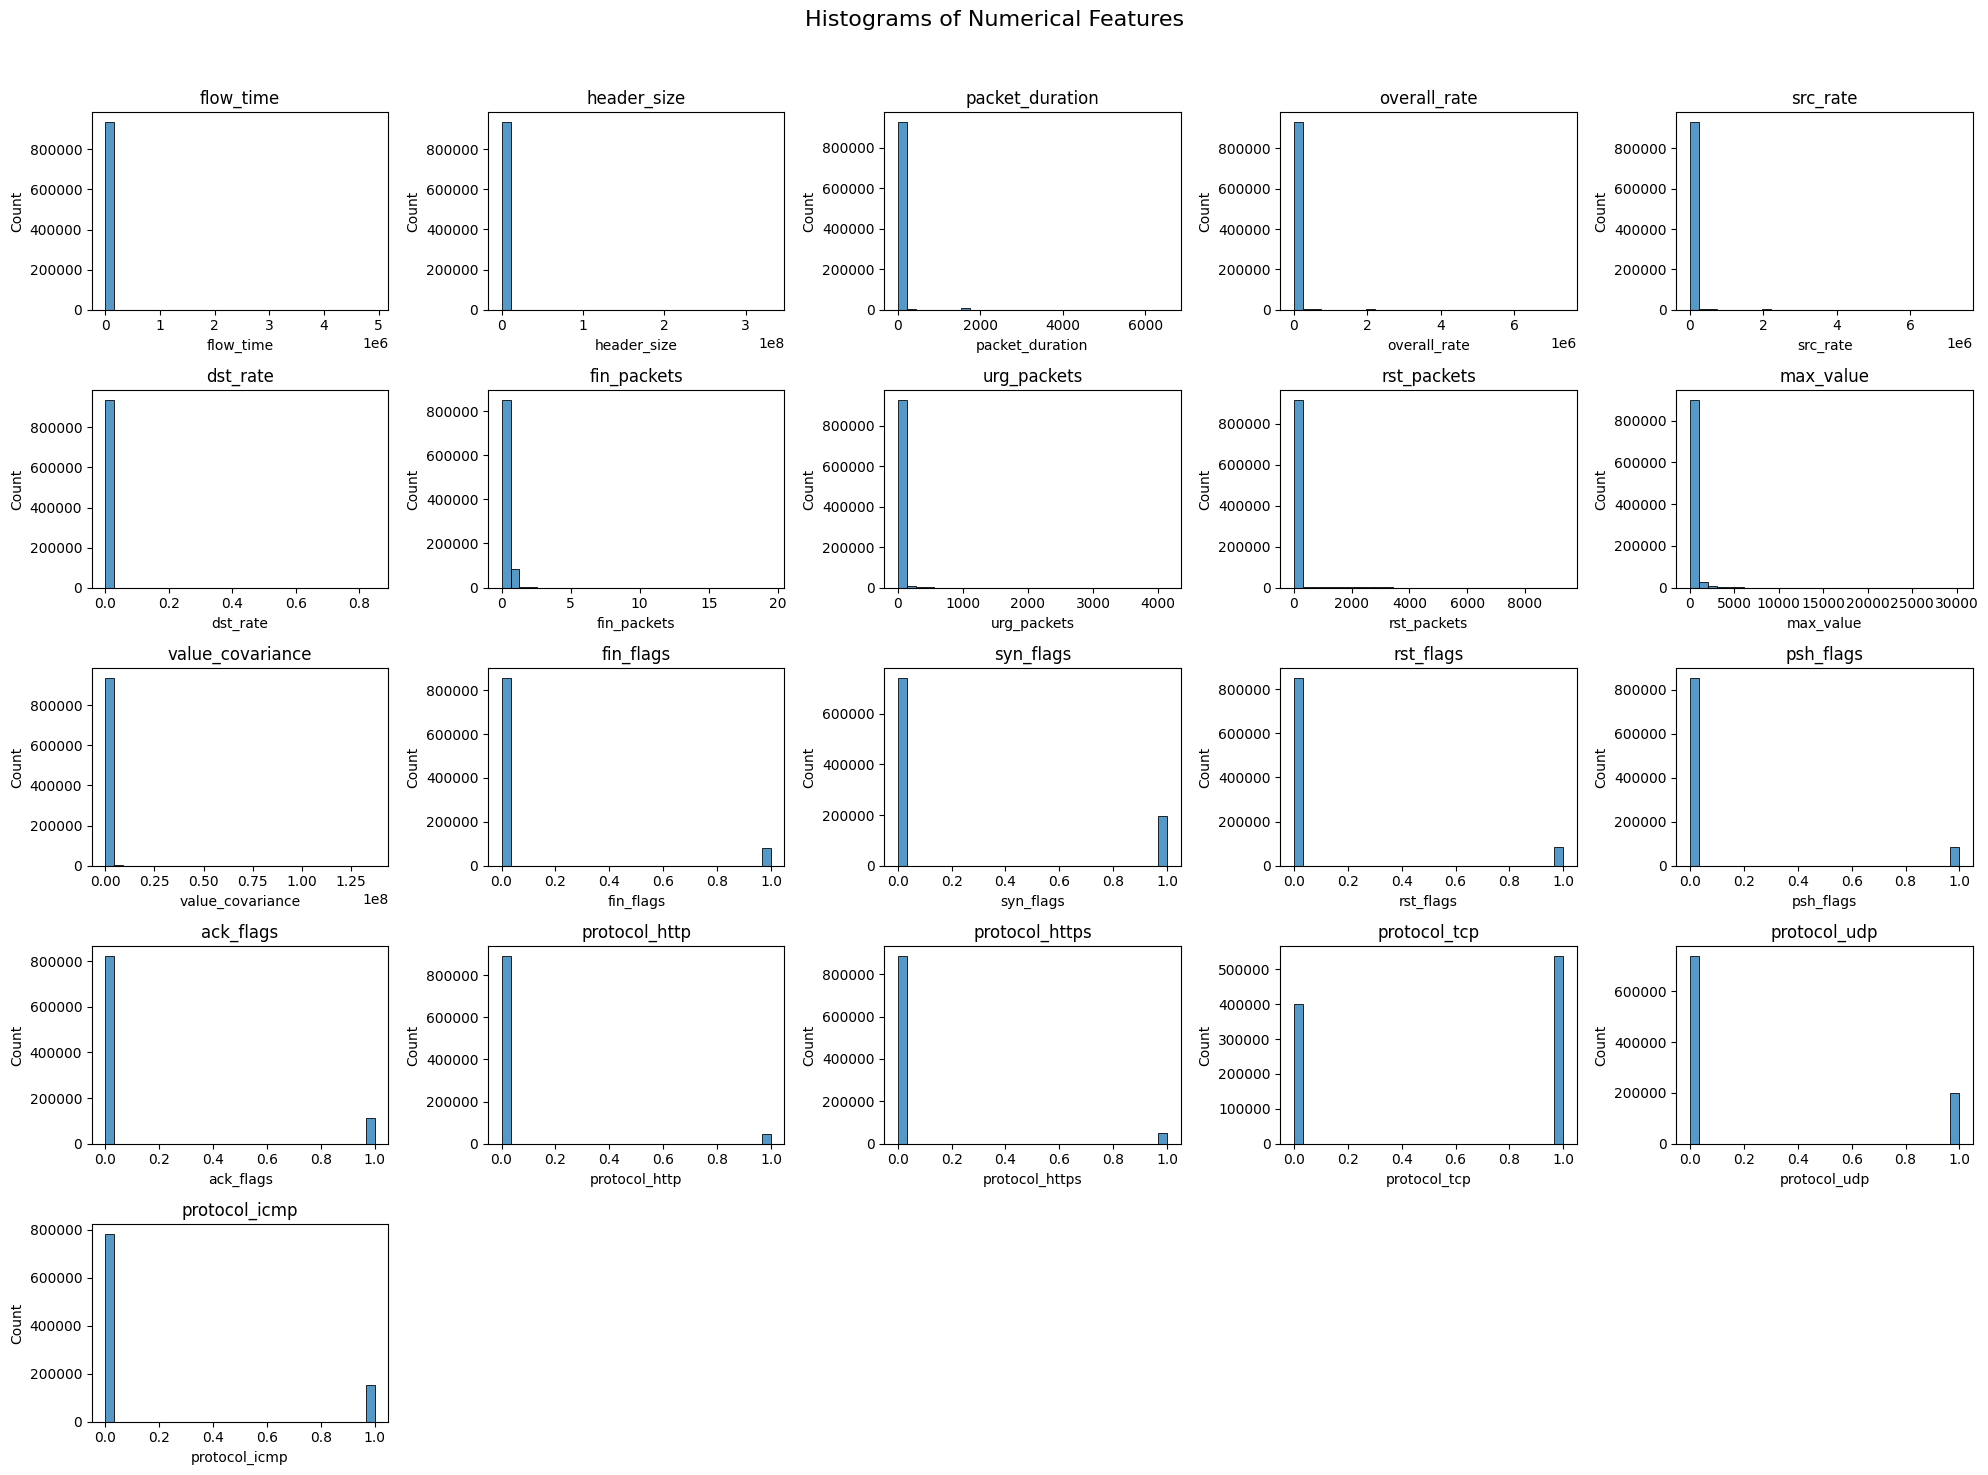

In [36]:
#Histograms

import math

len_of_num_cols= len(numerical_columns)
num_cols_list = list(numerical_columns)
cols = 5
rows = math.ceil(len_of_num_cols / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
axes = axes.flatten()

for i, col in enumerate(num_cols_list):
    sns.histplot(data[col], ax=axes[i], bins=30, kde=False)
    axes[i].set_title(col)

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

fig.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

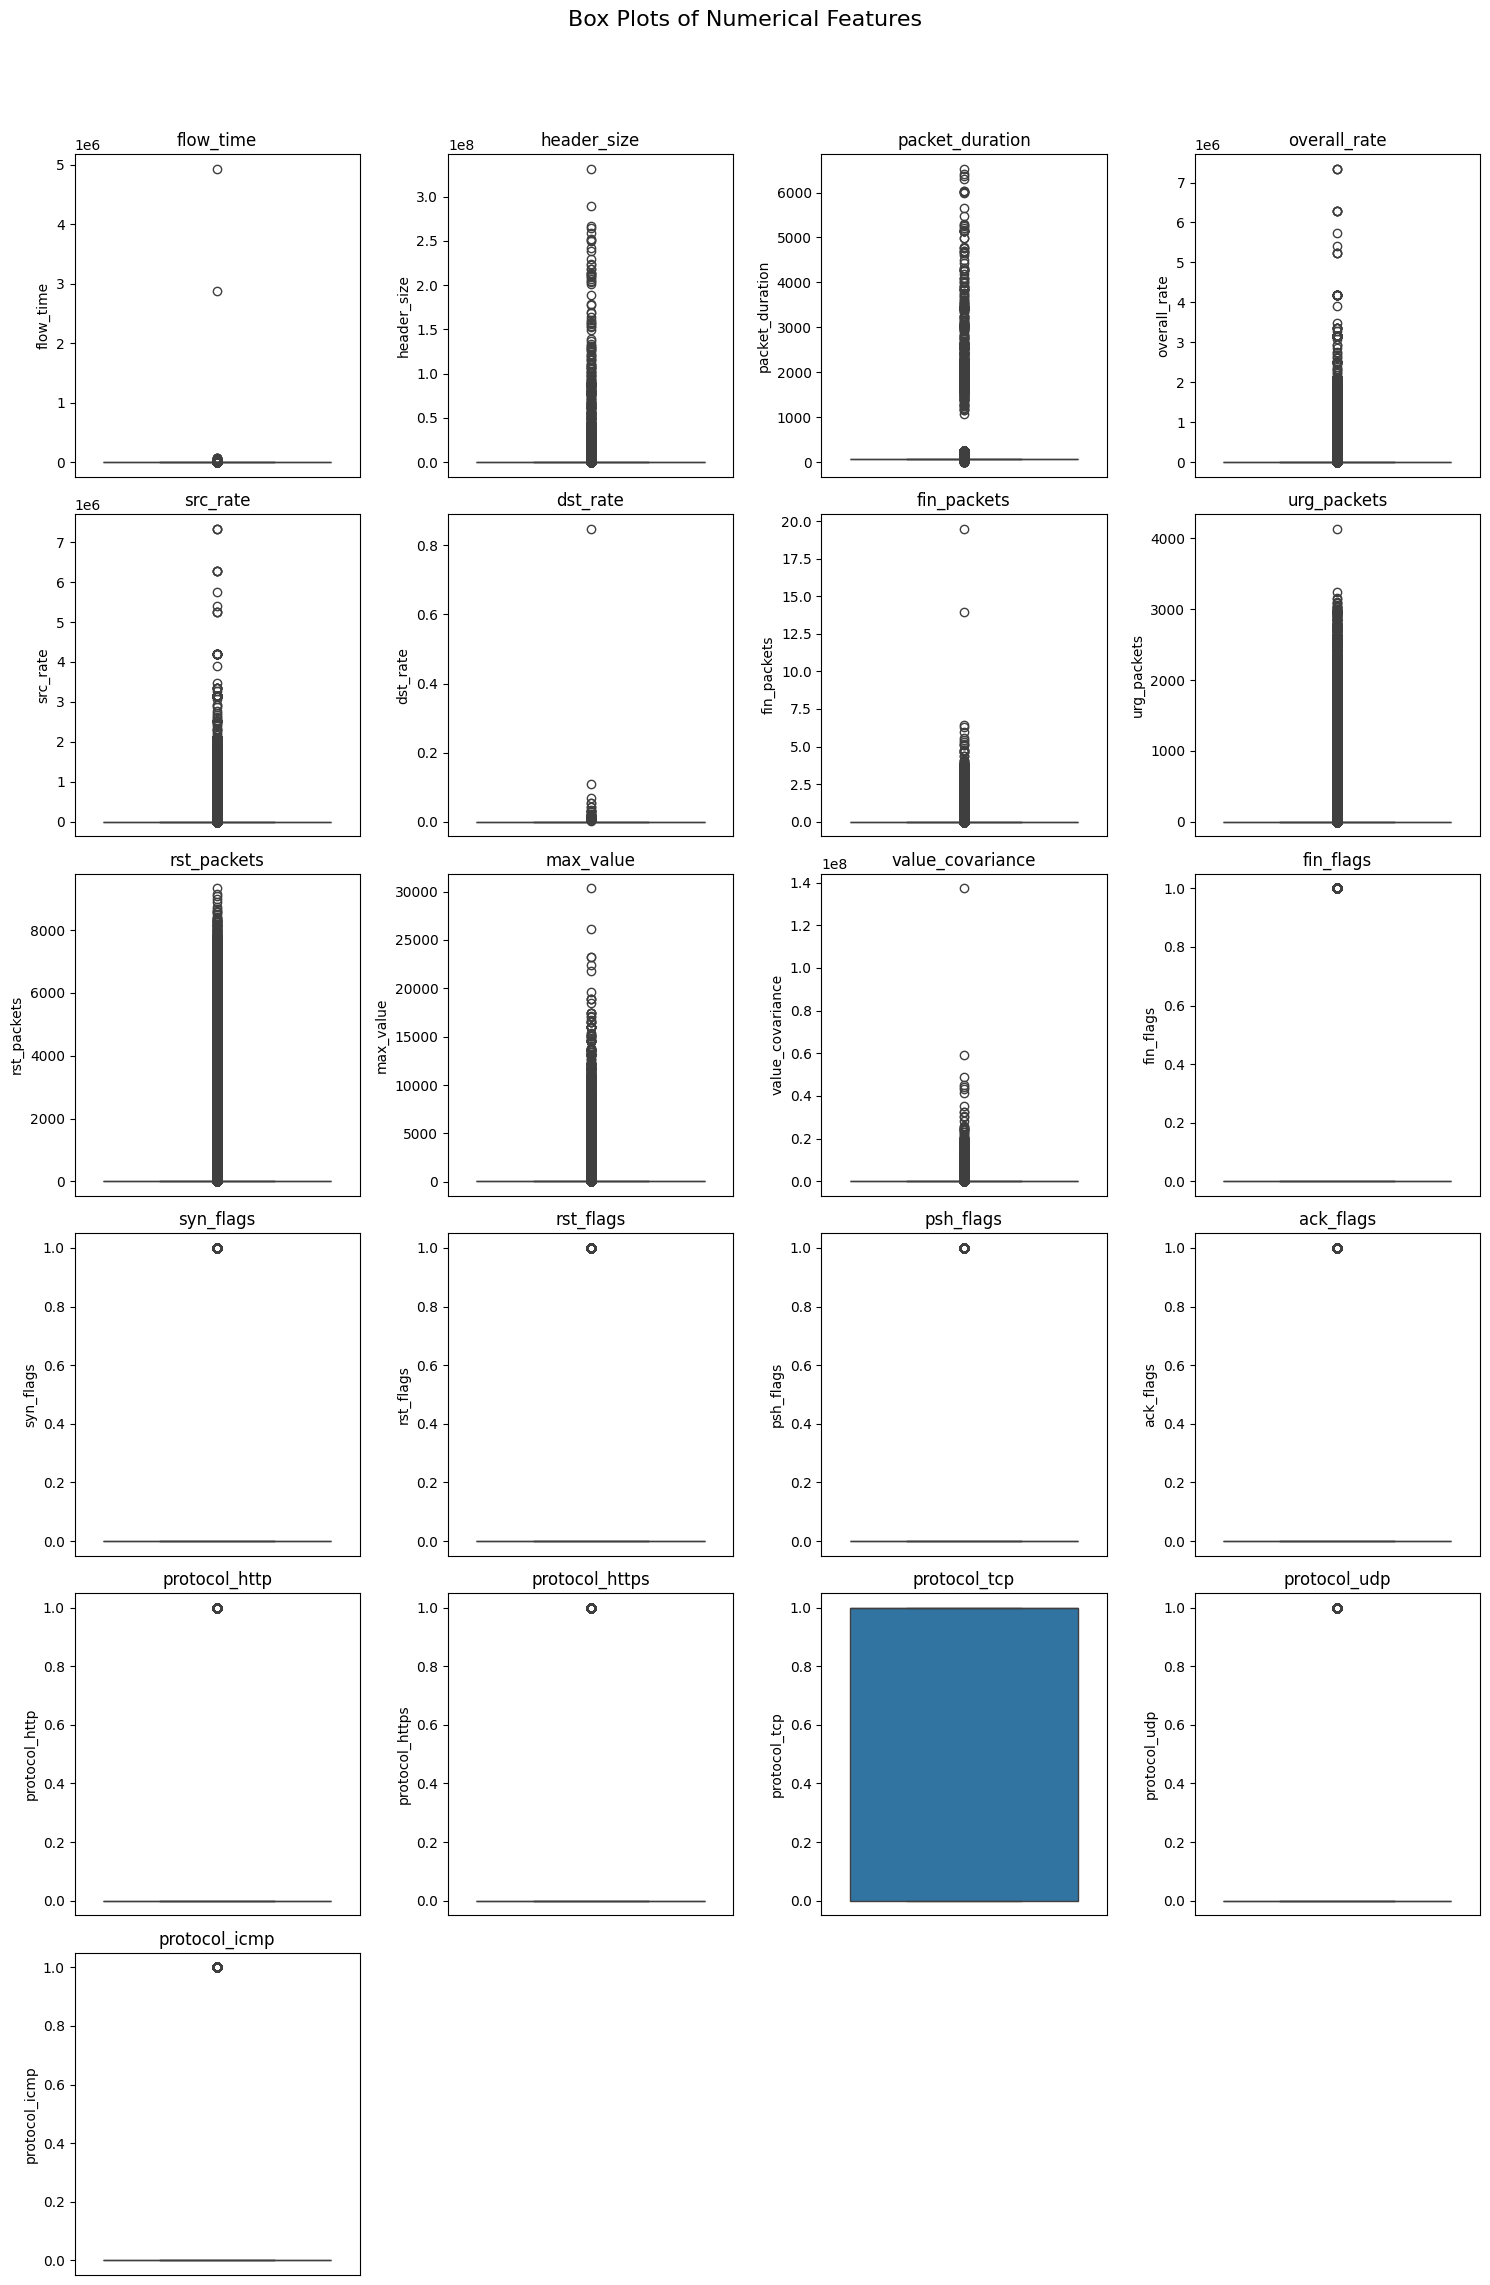

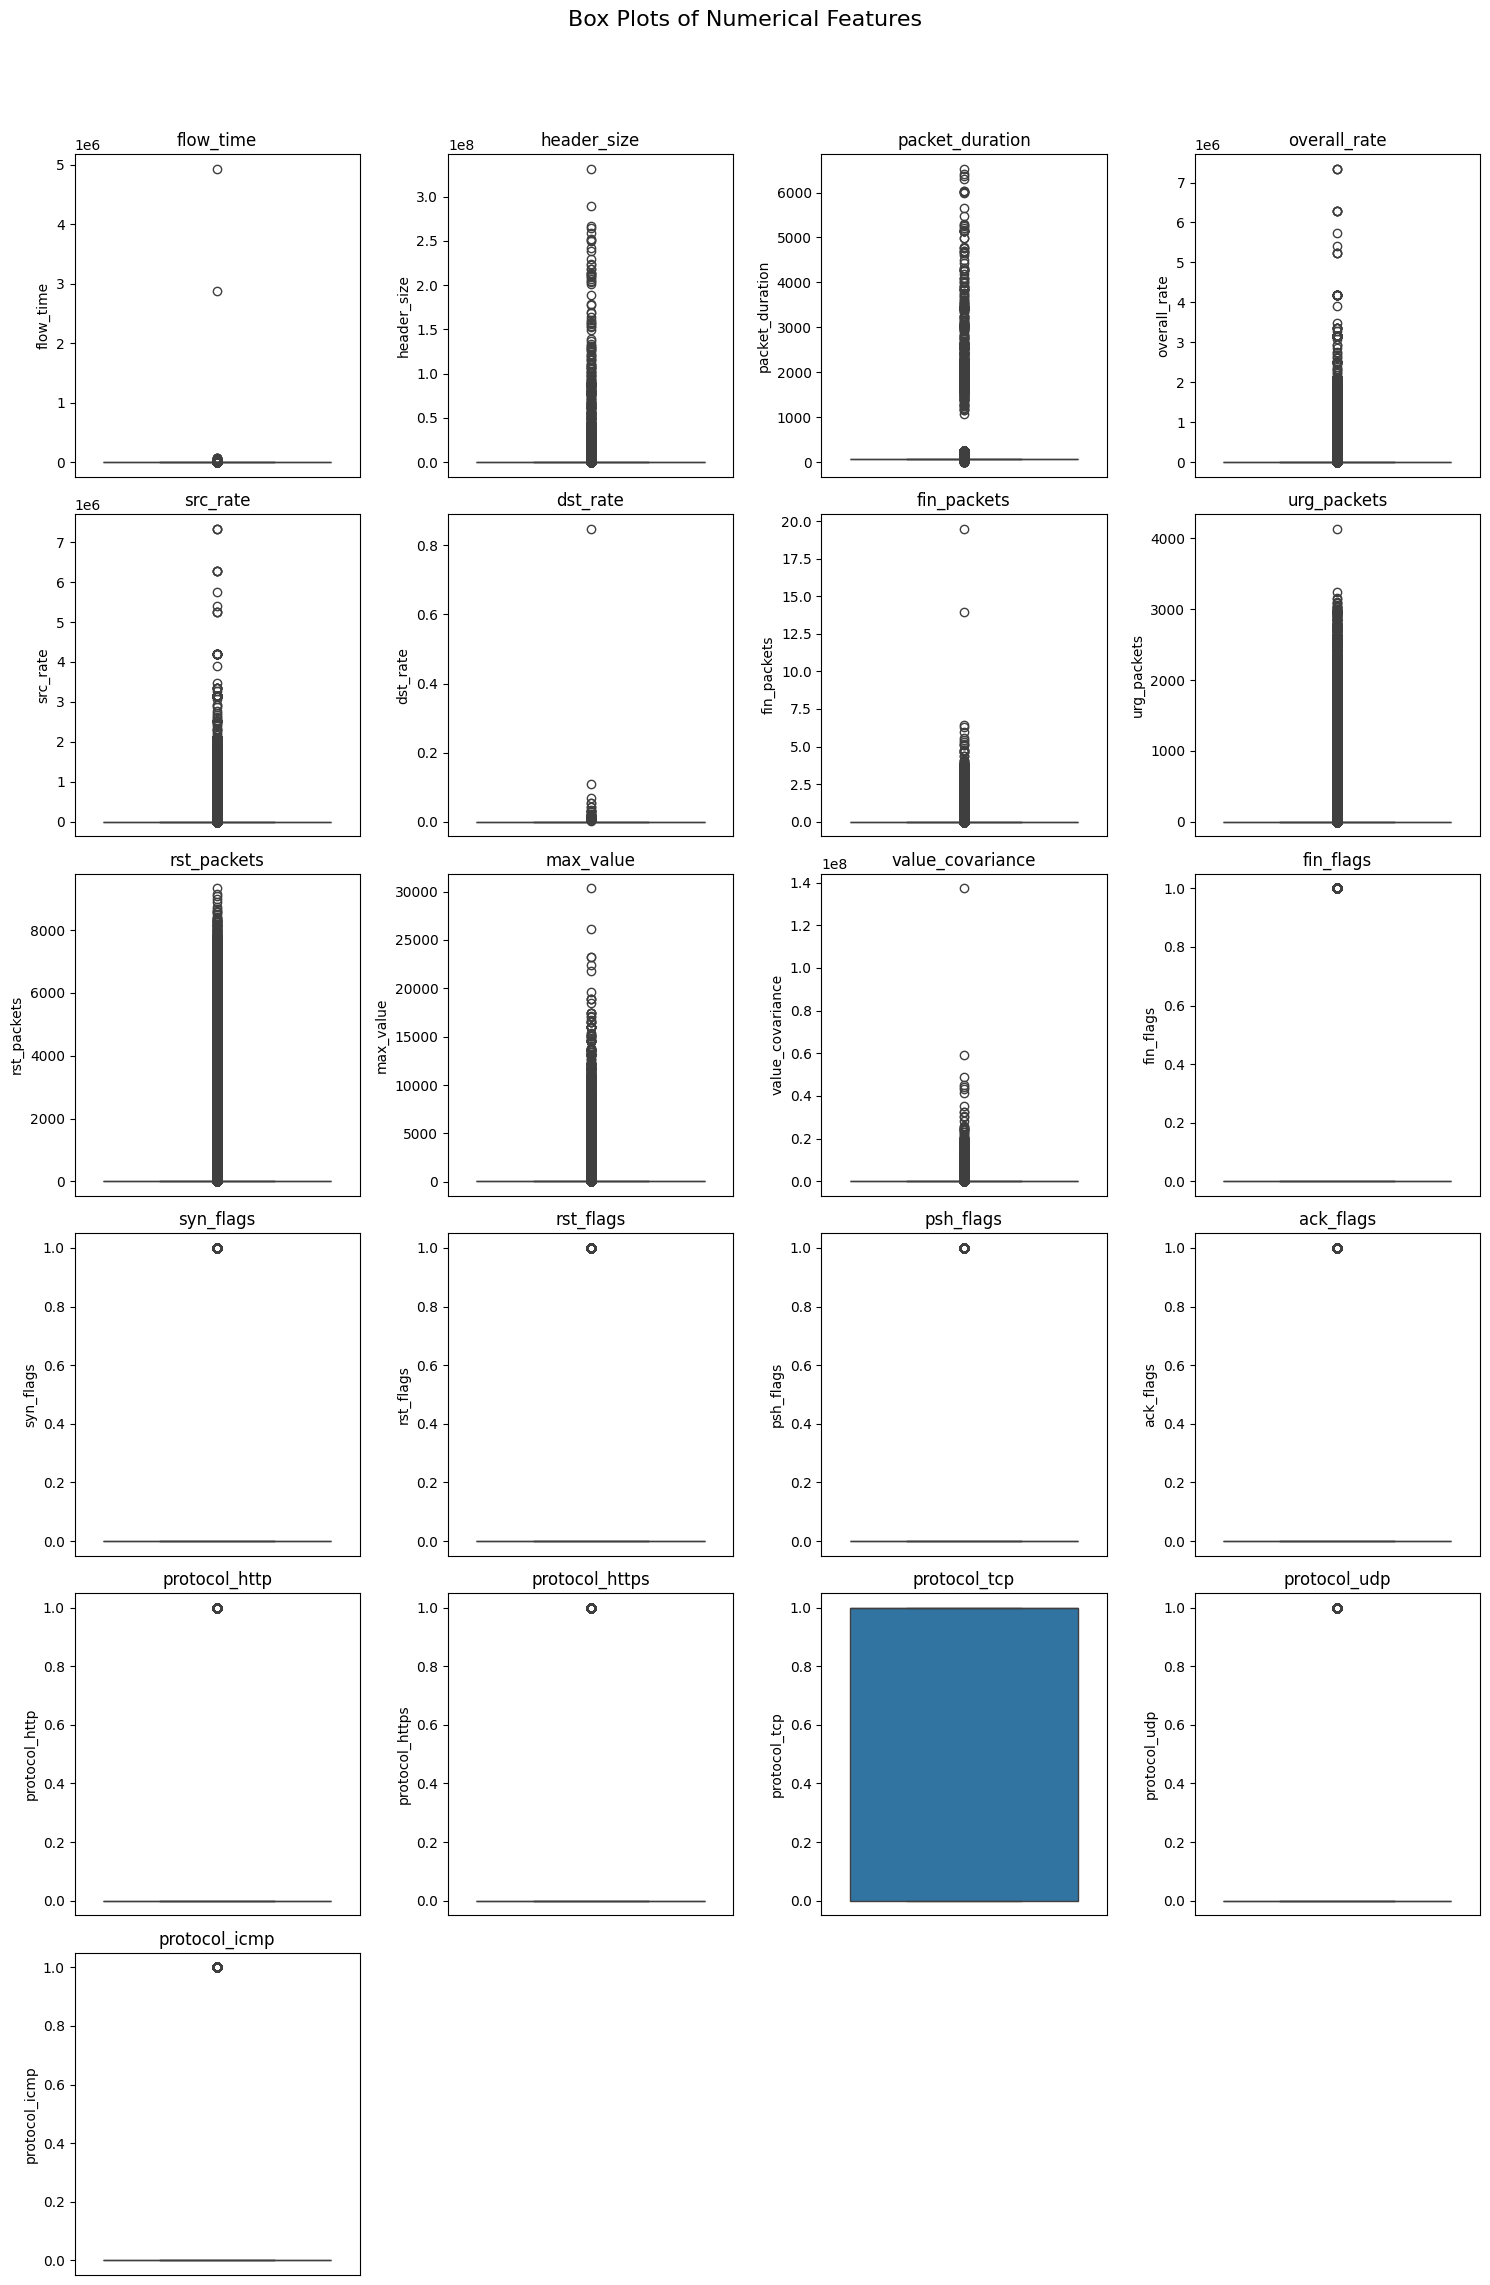

In [37]:
#Box plots

cols = 4
rows = math.ceil((len_of_num_cols) / cols)
plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(numerical_columns):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(y=data[col])
    plt.title(col)
    plt.xticks([])
plt.suptitle("Box Plots of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

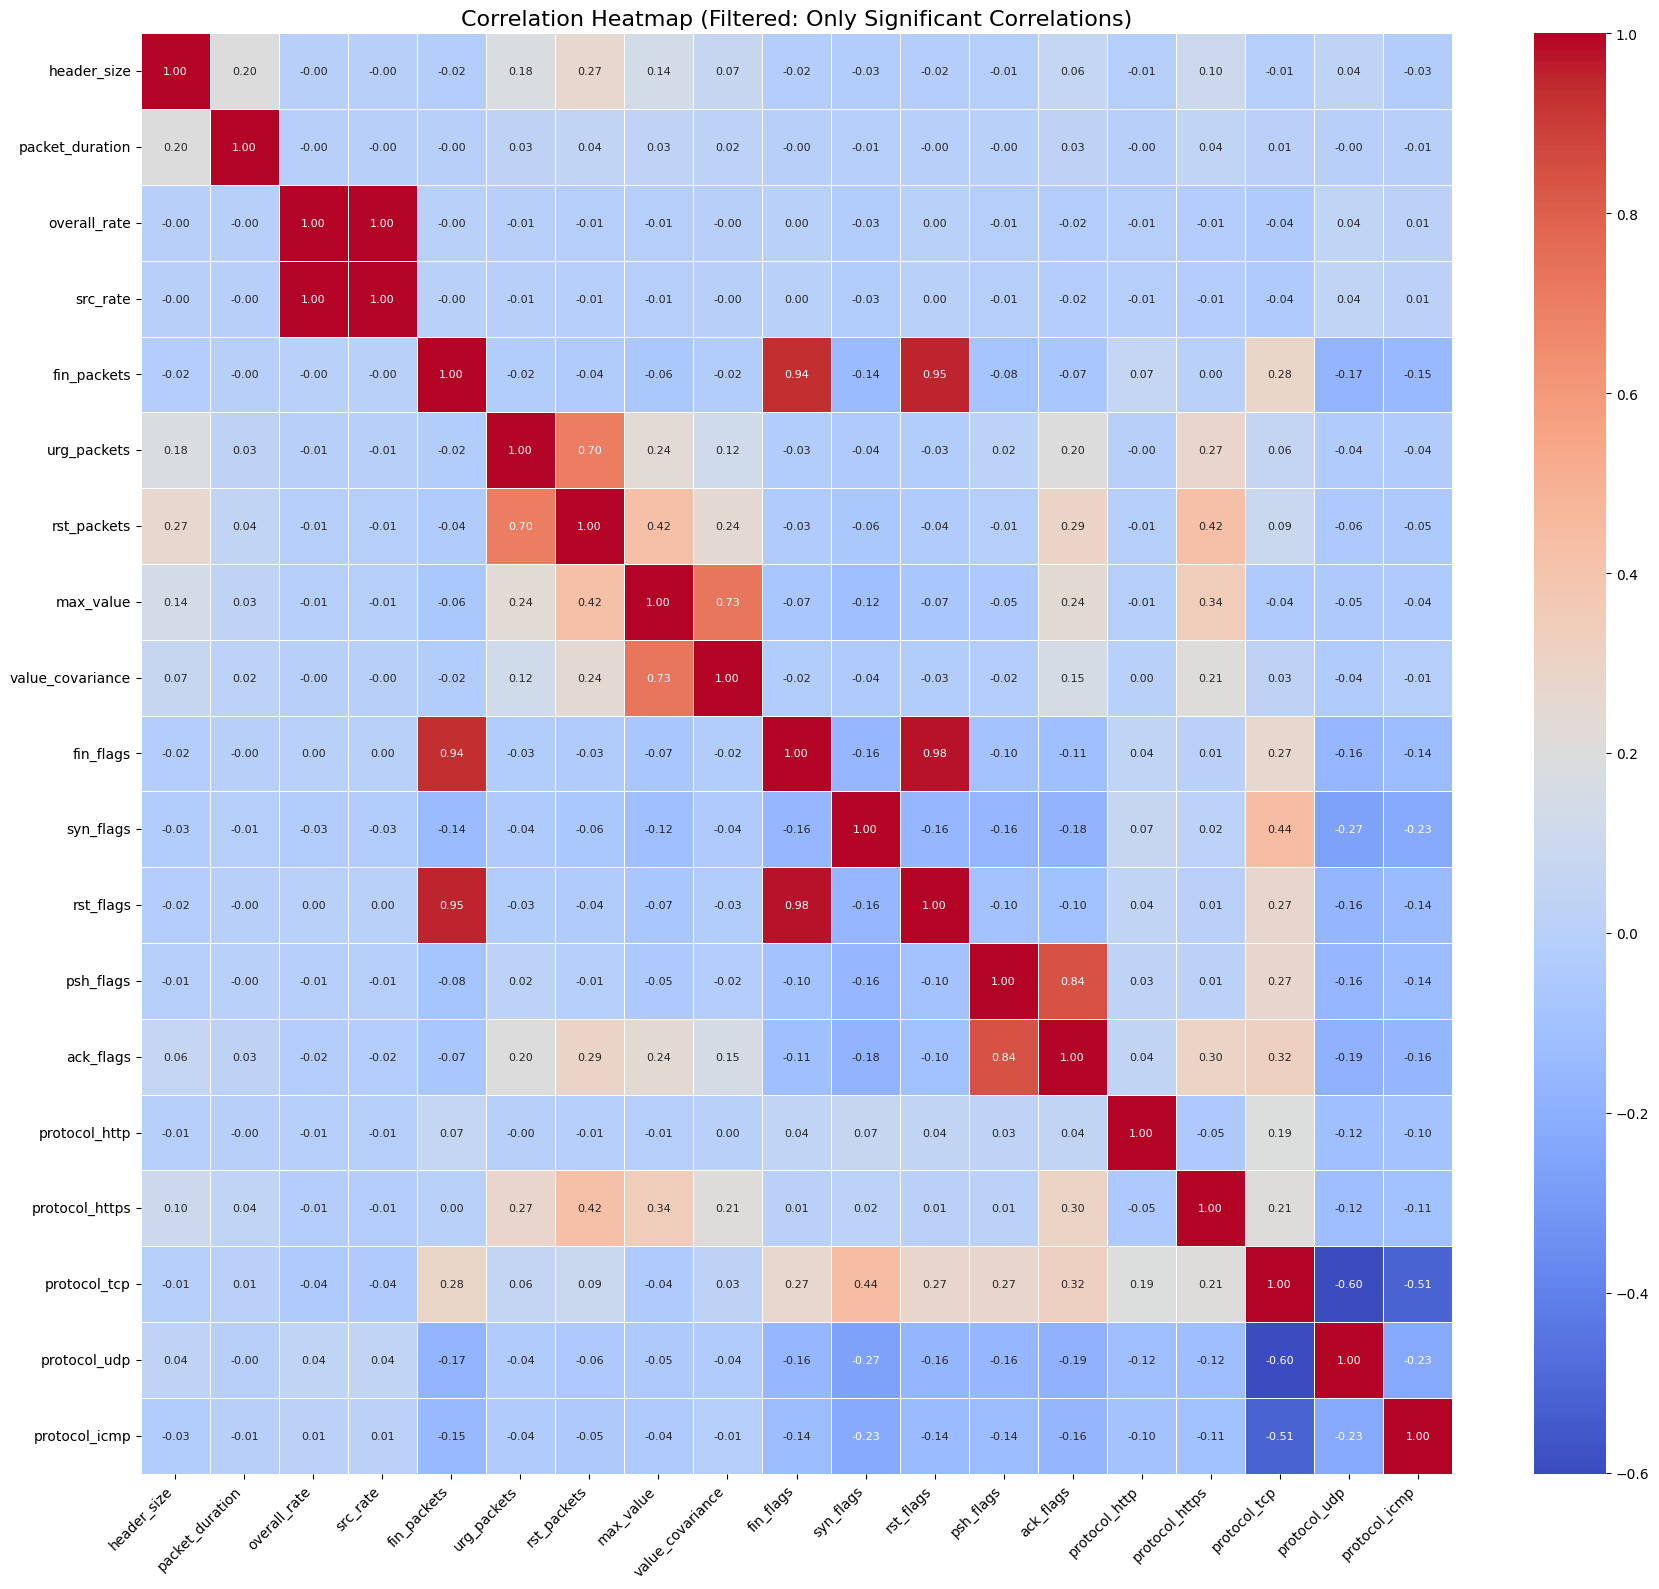

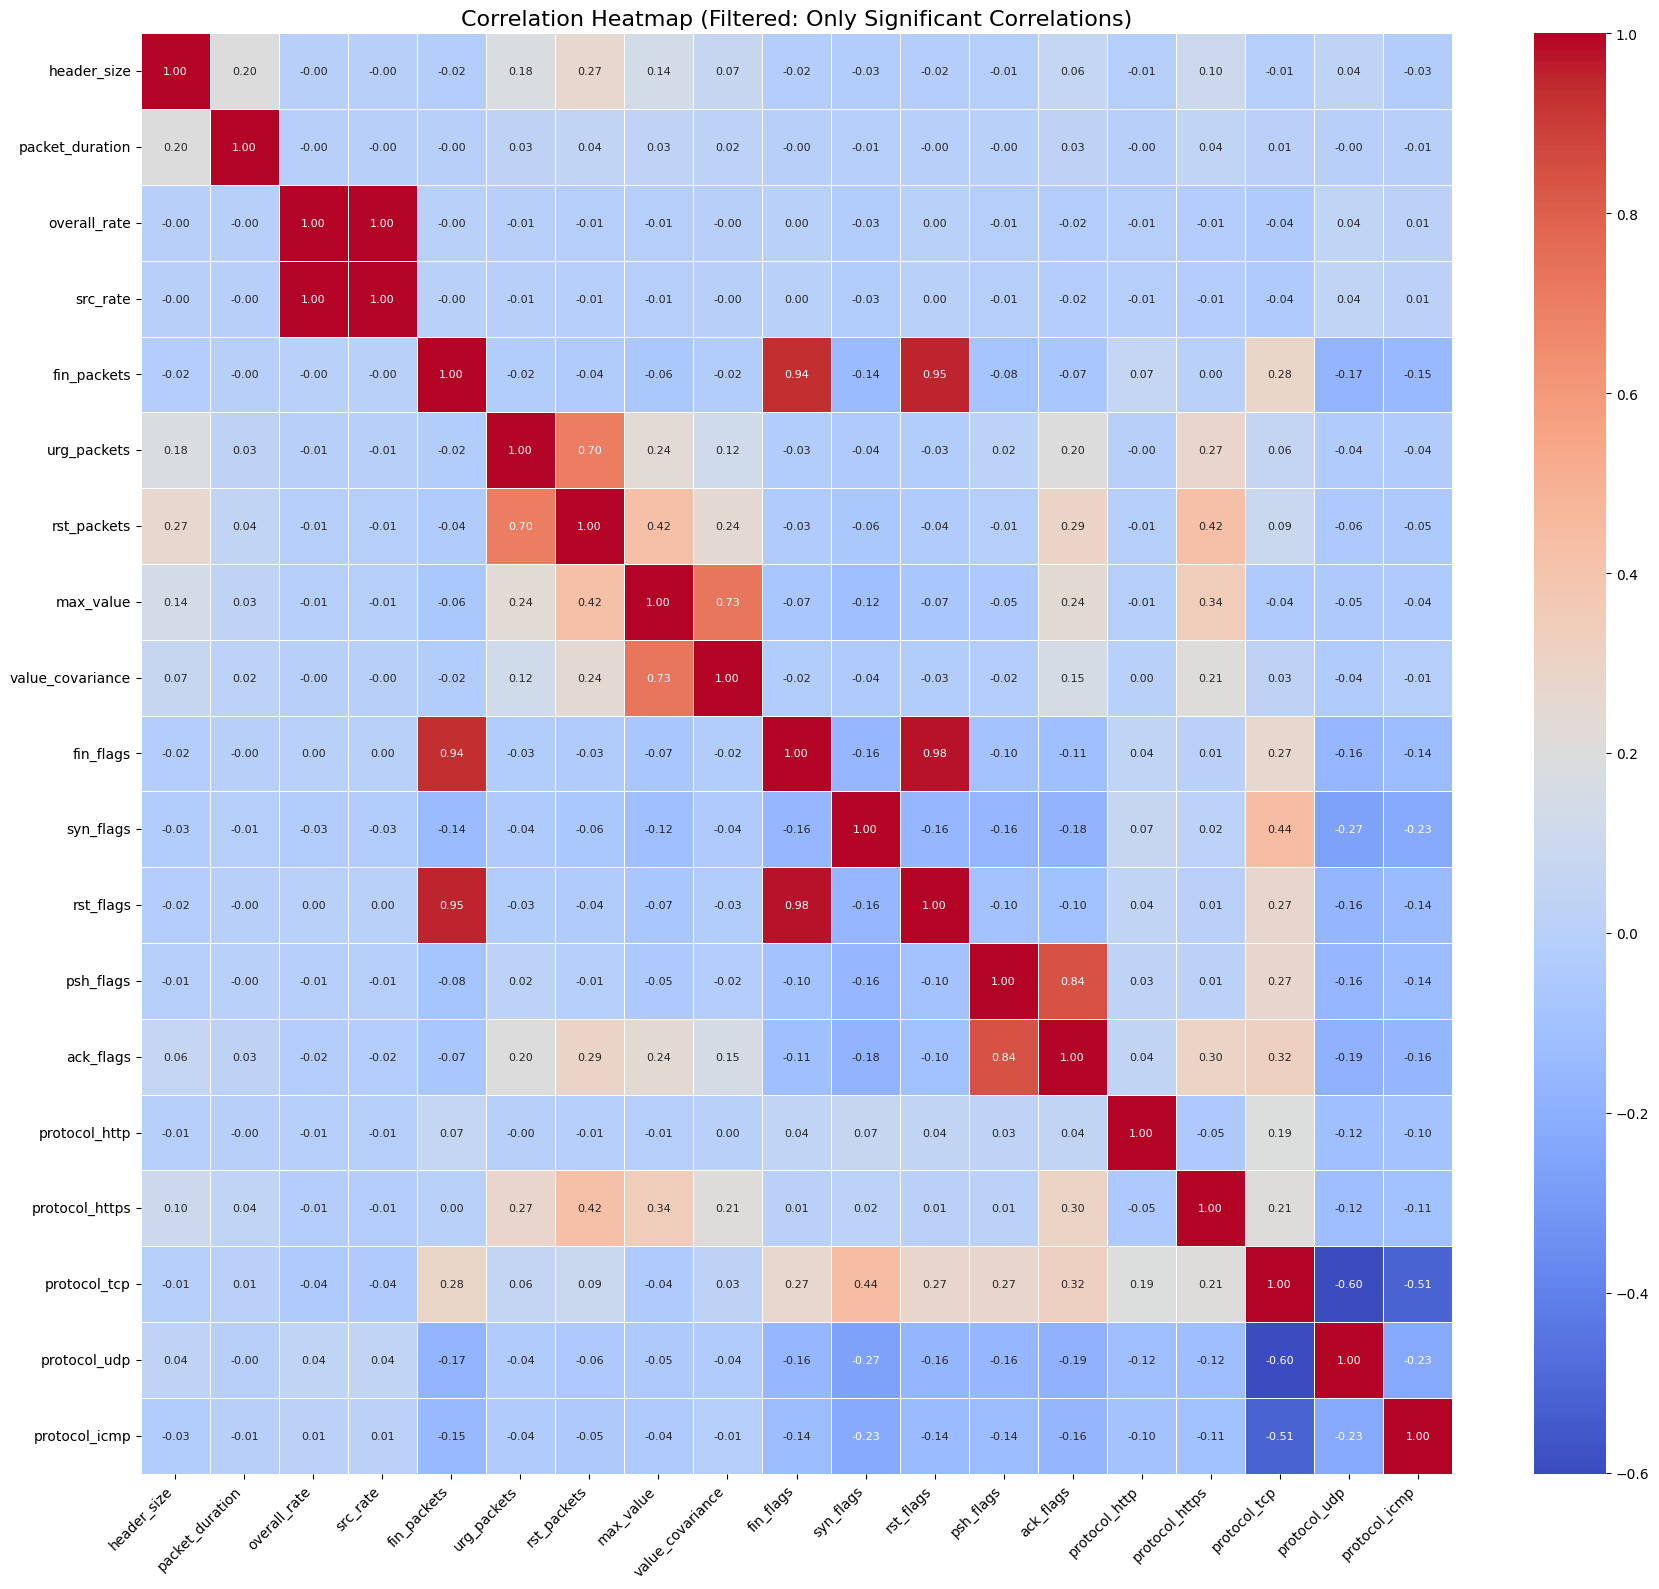

In [38]:
#Correlation heatmap

import numpy as np

corr_matrix = data[numerical_columns].corr()
abs_corr = corr_matrix.abs().copy()
np.fill_diagonal(abs_corr.values, 0)
threshold = 0.1

# Identify columns that have at least one correlation
cols_to_keep = abs_corr.columns[(abs_corr.max() >= threshold)]

#filter matrix
filtered_corr_matrix = corr_matrix.loc[cols_to_keep, cols_to_keep]
plt.figure(figsize=(18, 16))
sns.heatmap(filtered_corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            cbar=True,
            linewidths=0.5,
            annot_kws={"size": 8})
plt.xticks(rotation=45, ha='right')
plt.title("Correlation Heatmap (Filtered: Only Significant Correlations)", fontsize=16)
plt.tight_layout()
plt.show()

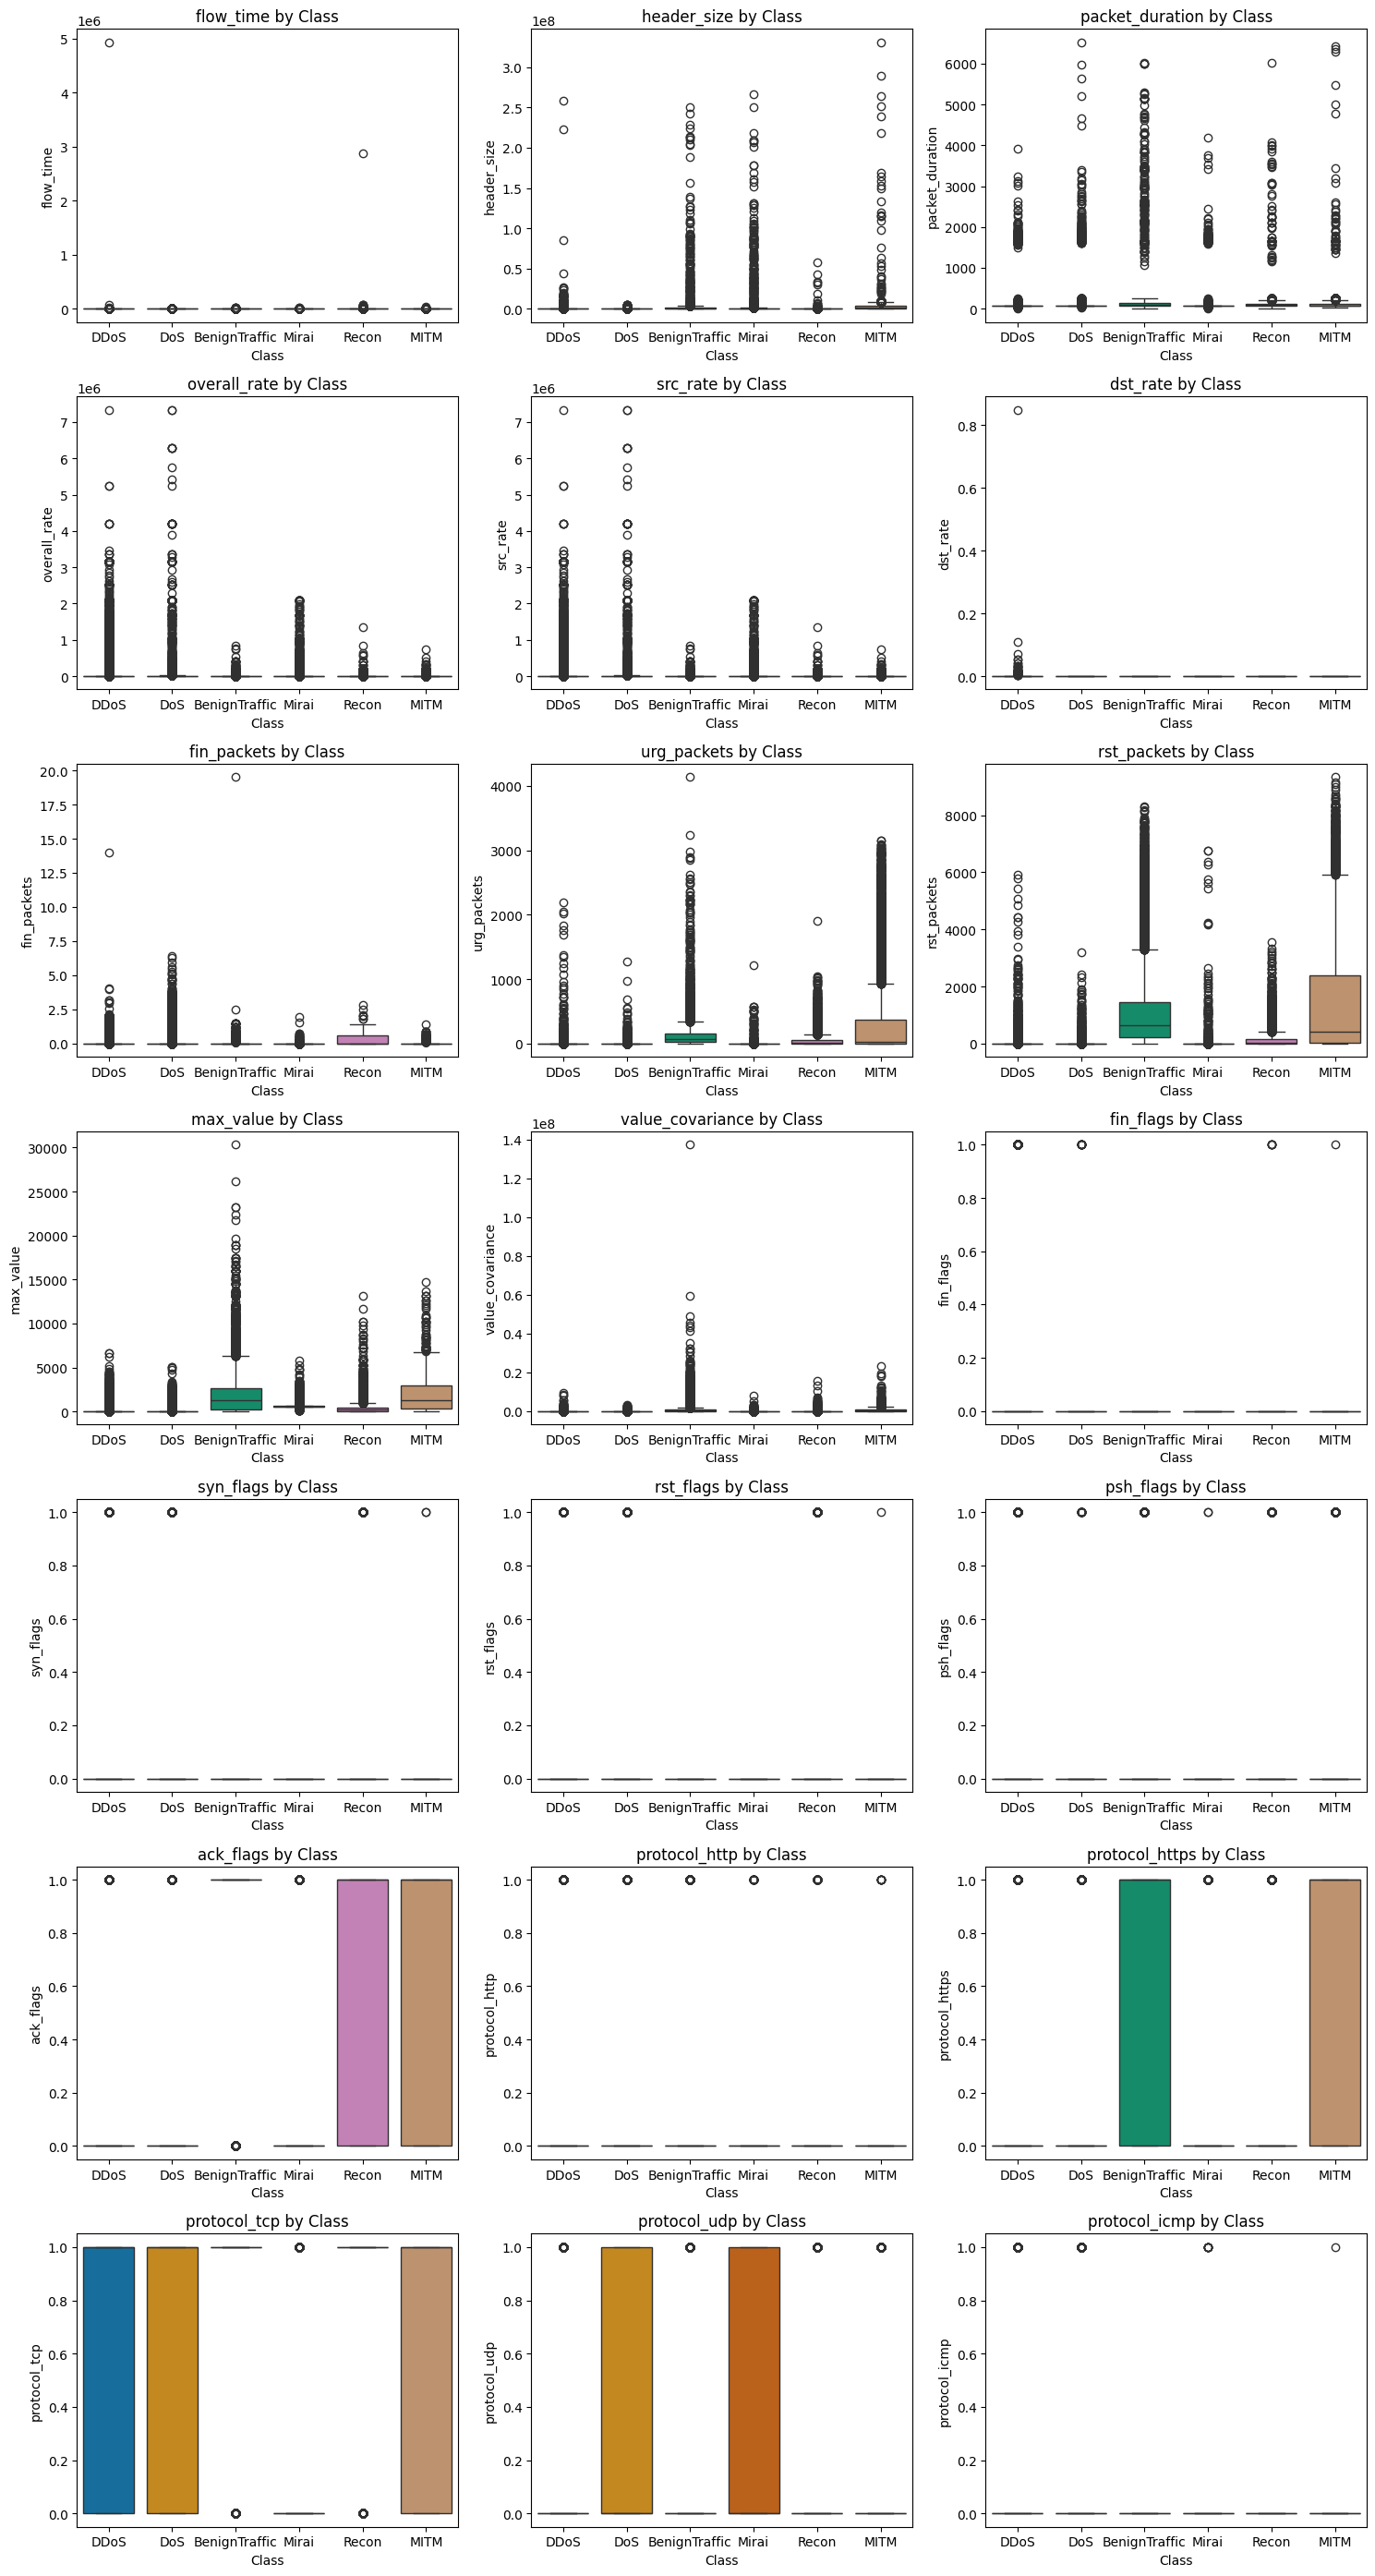

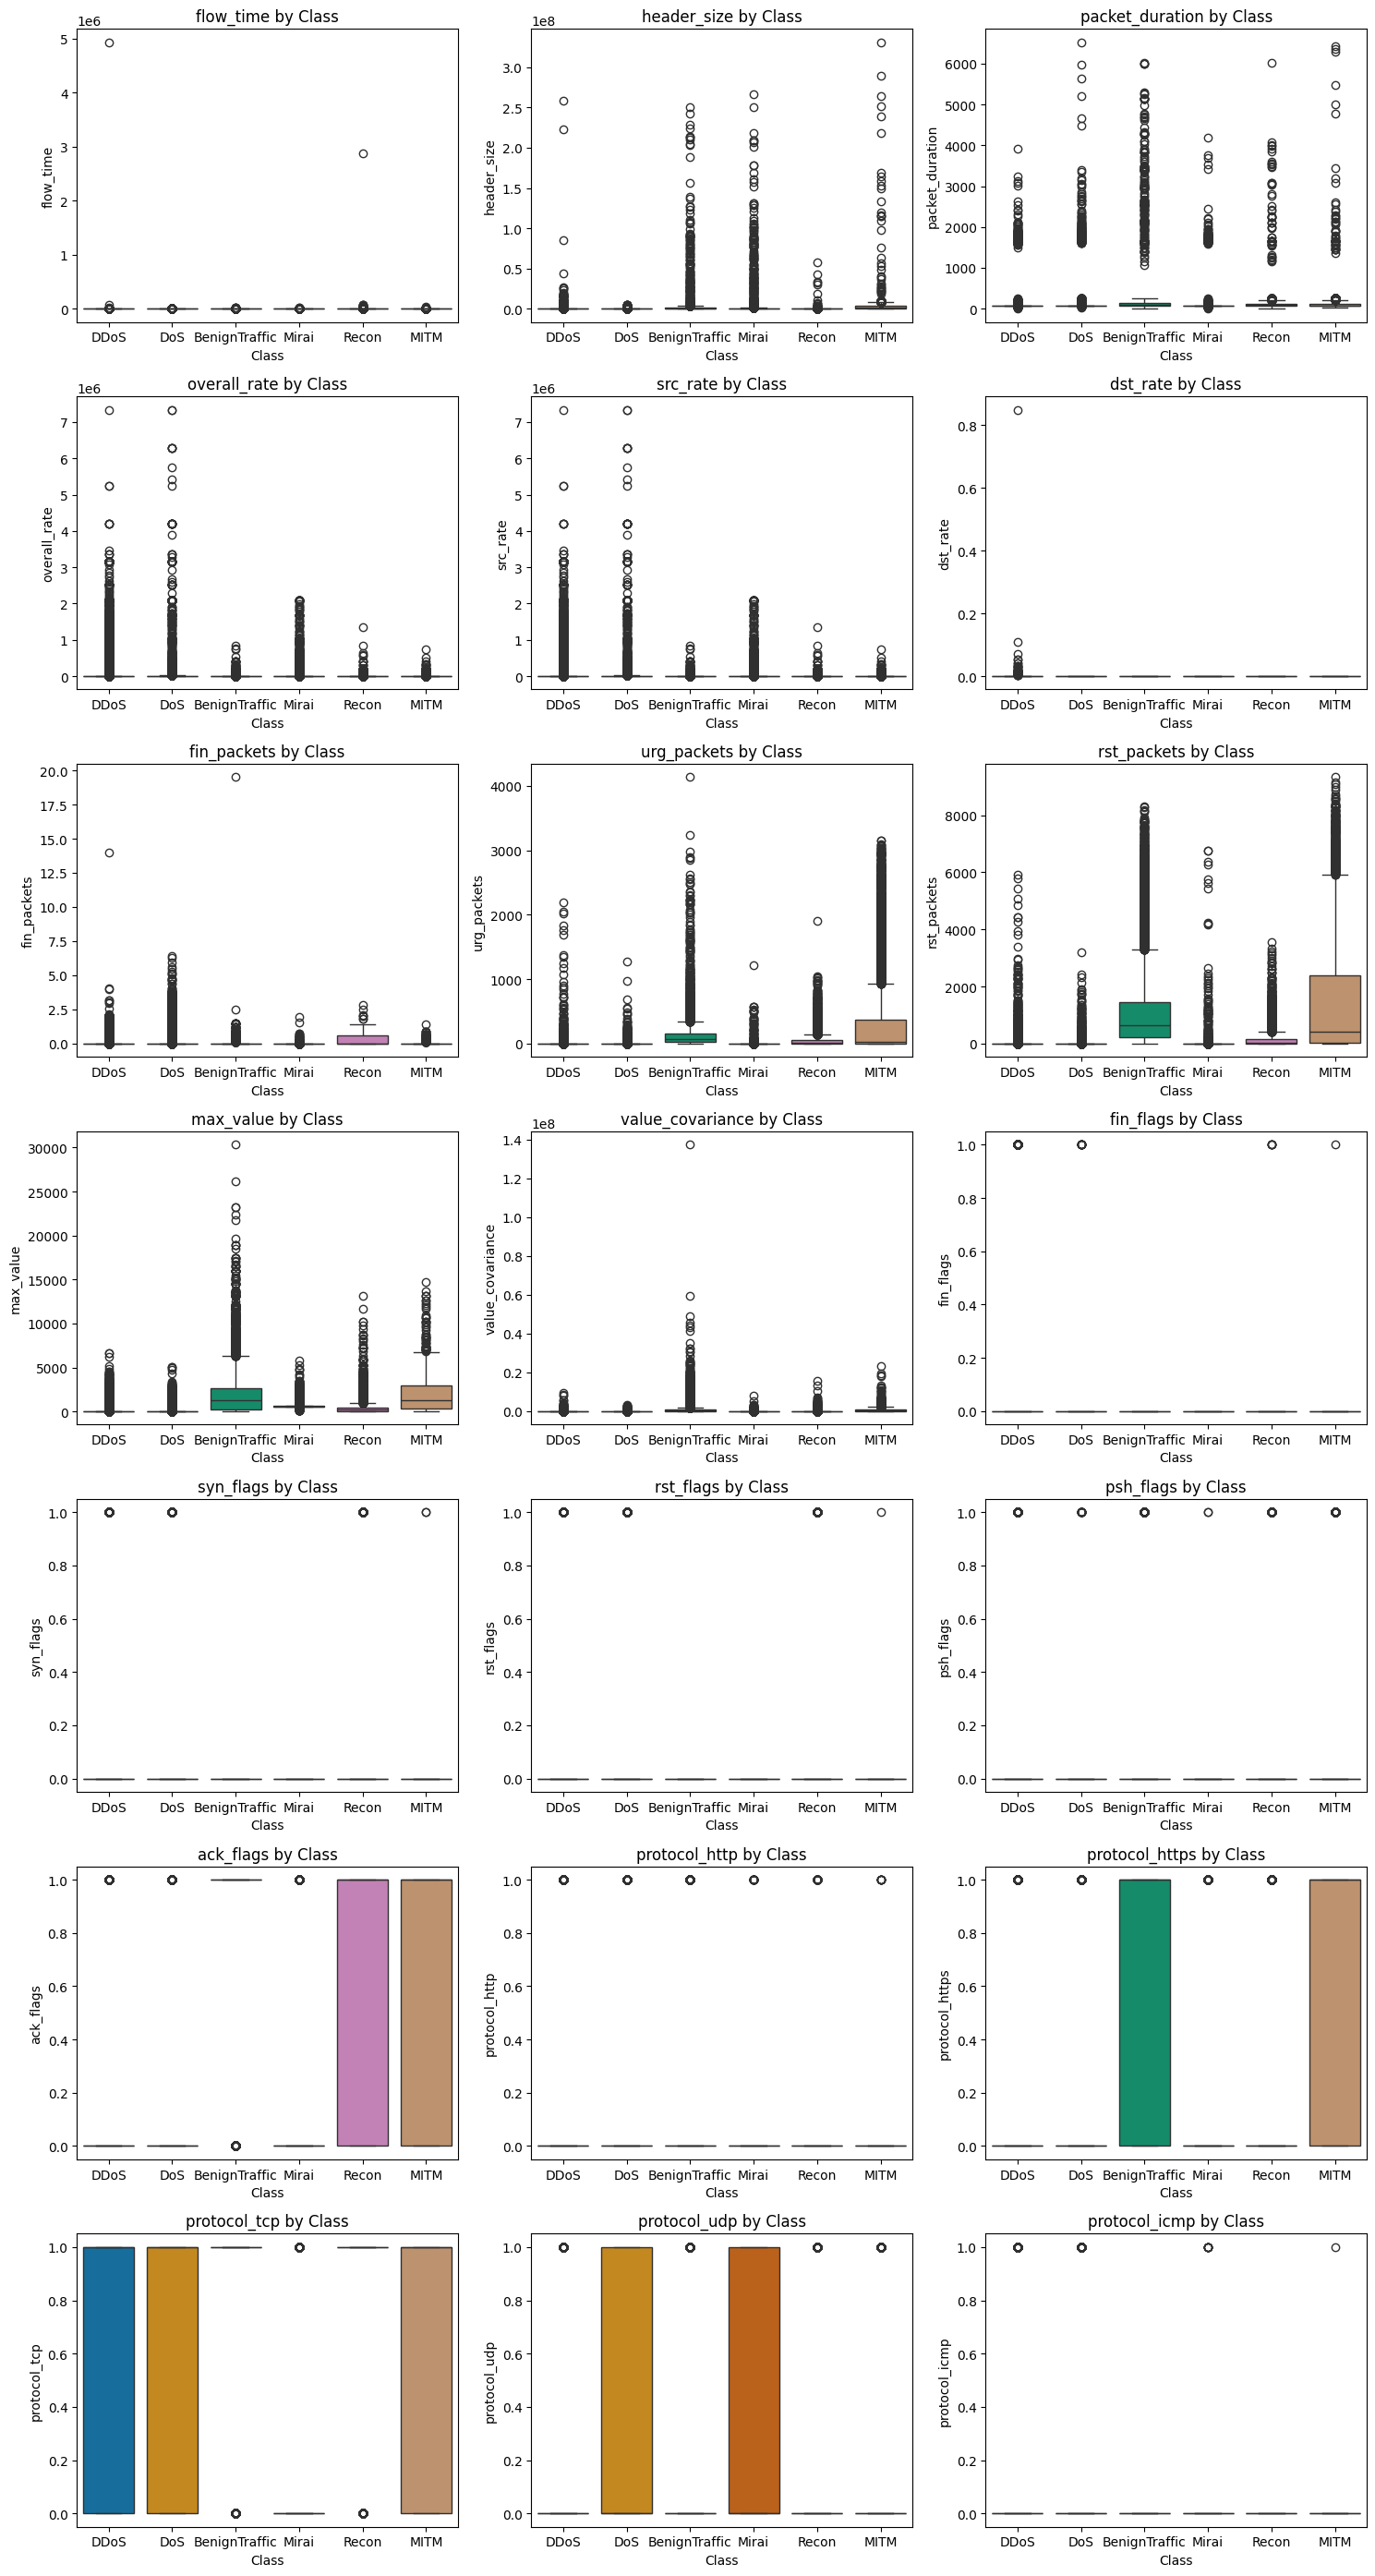

In [39]:
#Exploring relationship between numerical features and the target variable ("class")
cols = 3
rows = (len_of_num_cols // cols) + (len_of_num_cols % cols > 0)

plt.figure(figsize=(cols * 5, rows * 4))
for idx, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, idx)
    sns.boxplot(x='label', y=col, data=data, hue='label', palette='colorblind', dodge=False)
    plt.title(f'{col} by Class')
    plt.xlabel("Class")
    plt.ylabel(col)
    plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()

In [40]:
# use iqr for outlier handling

#detect outlier columns

def detect_outliers(df, num_cols):
    outlier_cols = []
    print("Outlier Detection Summary:\n" + "-"*60)

    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        print(f"{col}:")
        print(f"   Q1           = {Q1}")
        print(f"   Q3           = {Q3}")
        print(f"   IQR          = {IQR}")
        print(f"   Lower Bound  = {lower_bound}")
        print(f"   Upper Bound  = {upper_bound}\n")

        if ((df[col] < lower_bound) | (df[col] > upper_bound)).any():
            outlier_cols.append(col)

    print("-"*60)
    print(f"Number of Columns containing outliers: {len(outlier_cols)}")
    print("Columns containing outliers:", outlier_cols)

    return outlier_cols

outlier_columns = detect_outliers(data, numerical_columns)
copy_of_outlier_columns = outlier_columns.copy()

Outlier Detection Summary:
------------------------------------------------------------
flow_time:
   Q1           = 0.0
   Q3           = 0.101754234
   IQR          = 0.101754234
   Lower Bound  = -0.152631351
   Upper Bound  = 0.25438558499999997

header_size:
   Q1           = 54.0
   Q3           = 364.0
   IQR          = 310.0
   Lower Bound  = -411.0
   Upper Bound  = 829.0

packet_duration:
   Q1           = 64.0
   Q3           = 64.0
   IQR          = 0.0
   Lower Bound  = 64.0
   Upper Bound  = 64.0

overall_rate:
   Q1           = 2.0770457650000003
   Q3           = 117.77062105
   IQR          = 115.69357528500001
   Lower Bound  = -171.4633171625
   Upper Bound  = 291.31098397750003

src_rate:
   Q1           = 2.0770457650000003
   Q3           = 117.77062105
   IQR          = 115.69357528500001
   Lower Bound  = -171.4633171625
   Upper Bound  = 291.31098397750003

dst_rate:
   Q1           = 0.0
   Q3           = 0.0
   IQR          = 0.0
   Lower Bound  = 0.0
   Uppe

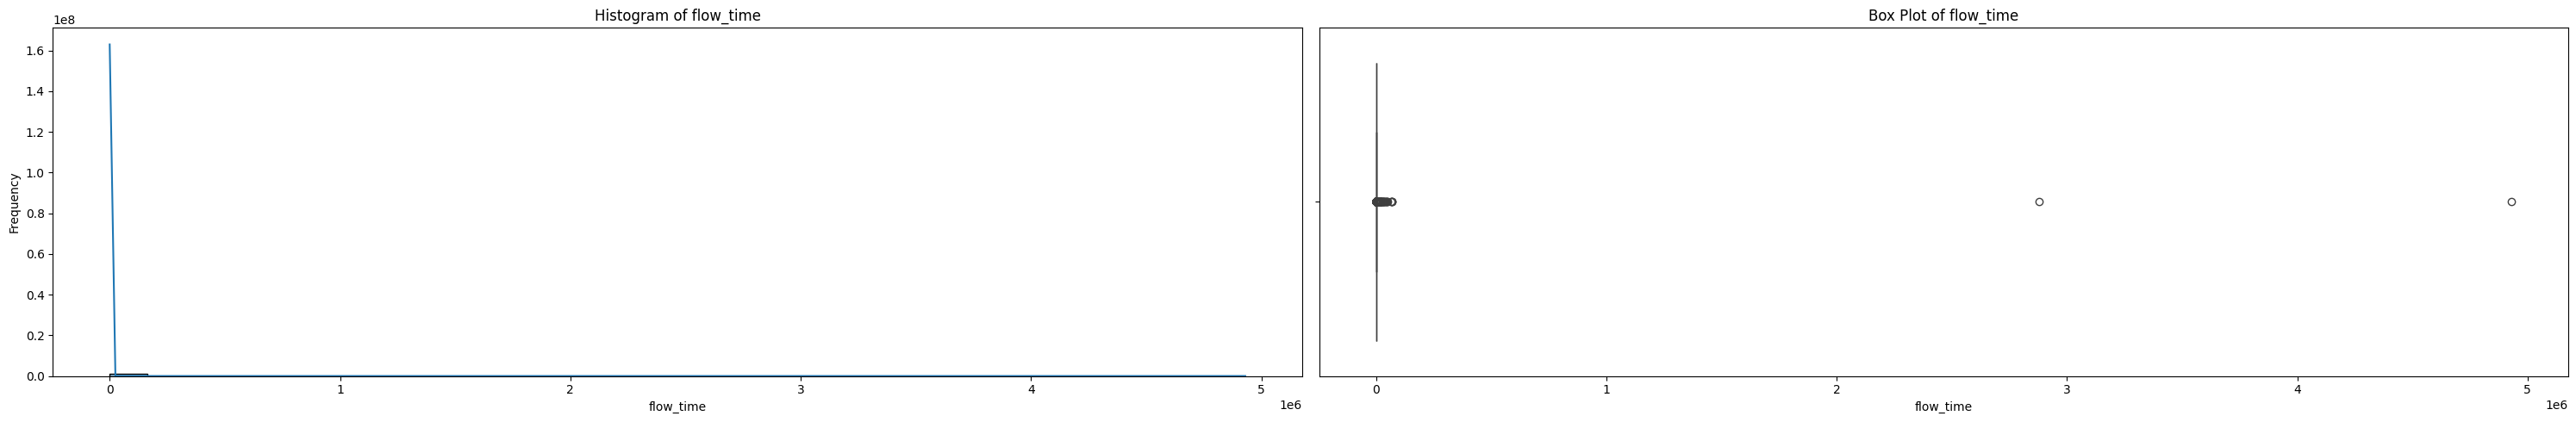

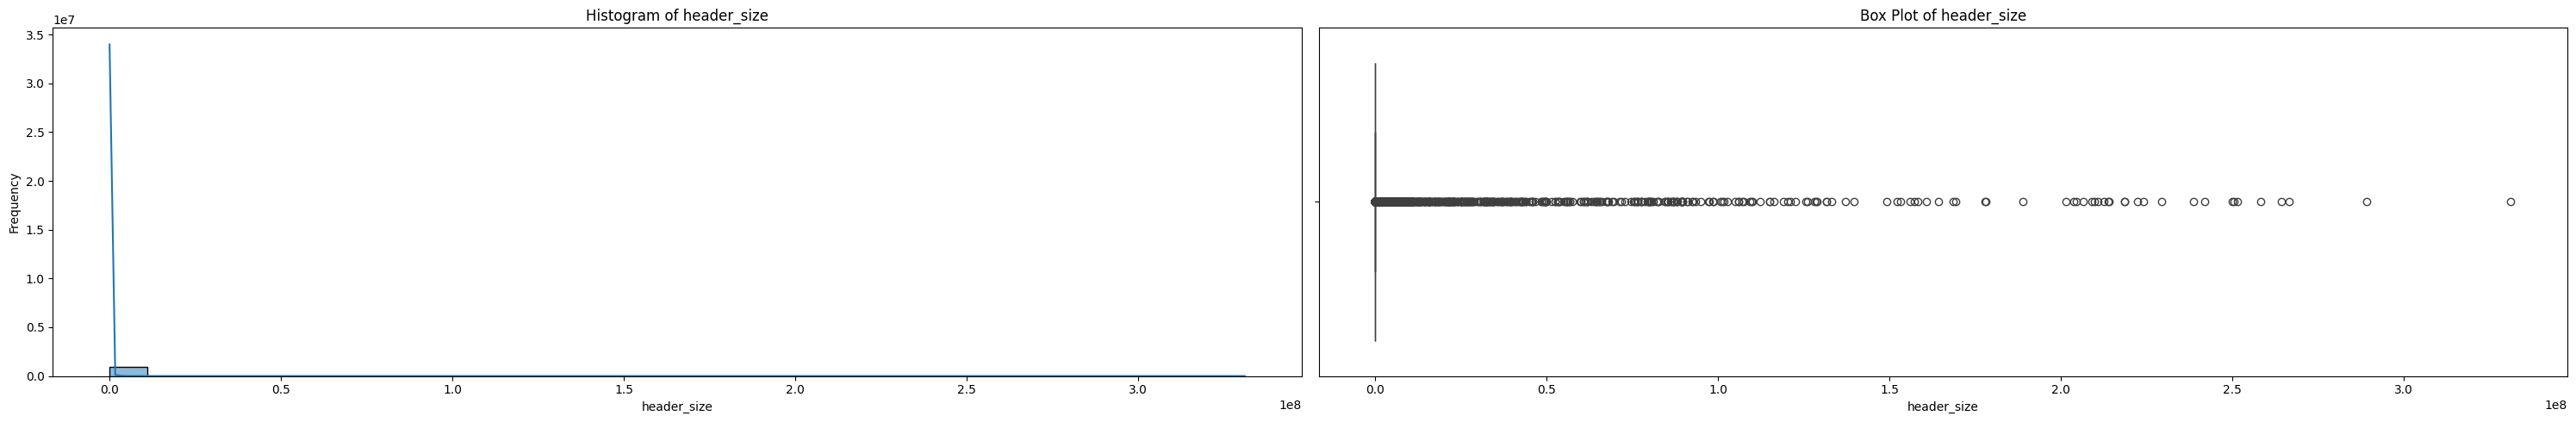

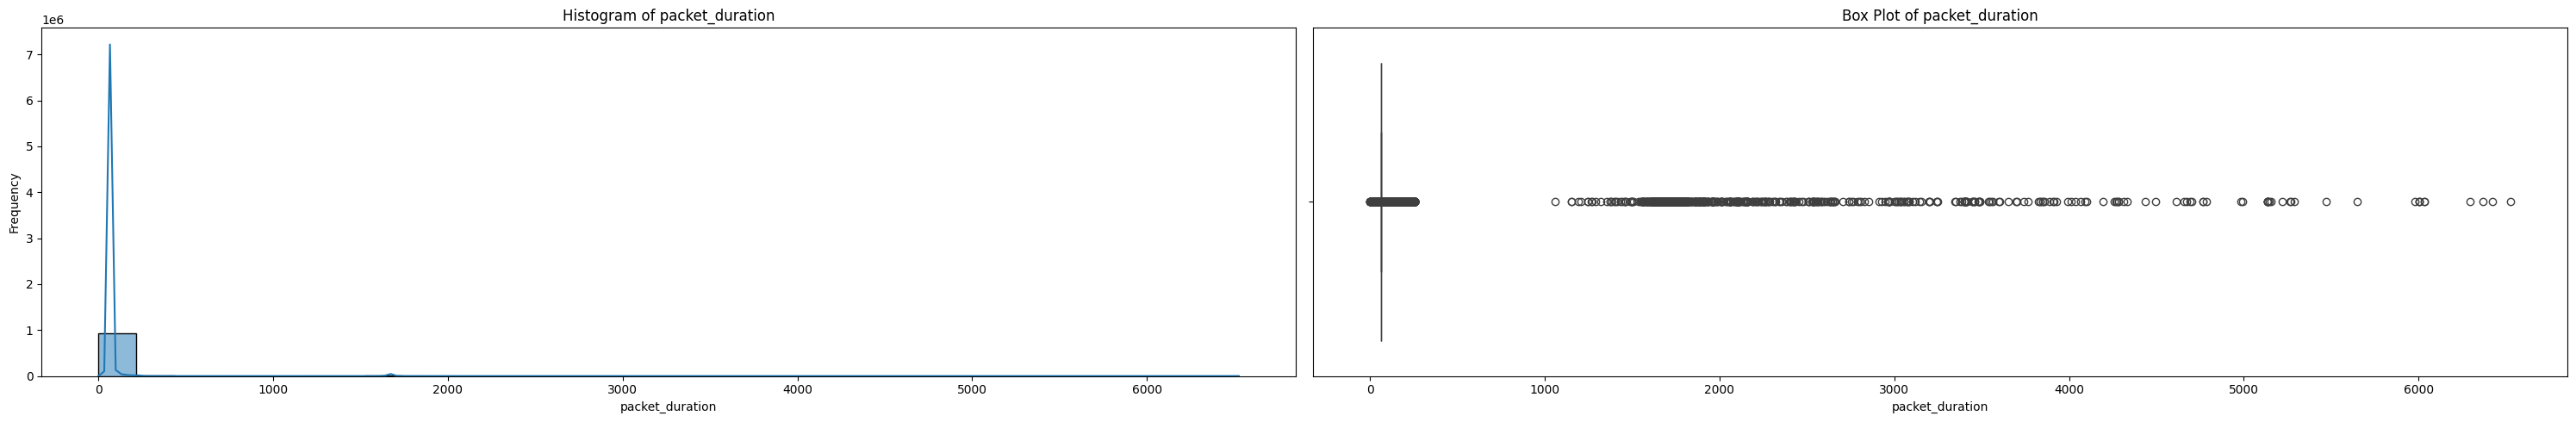

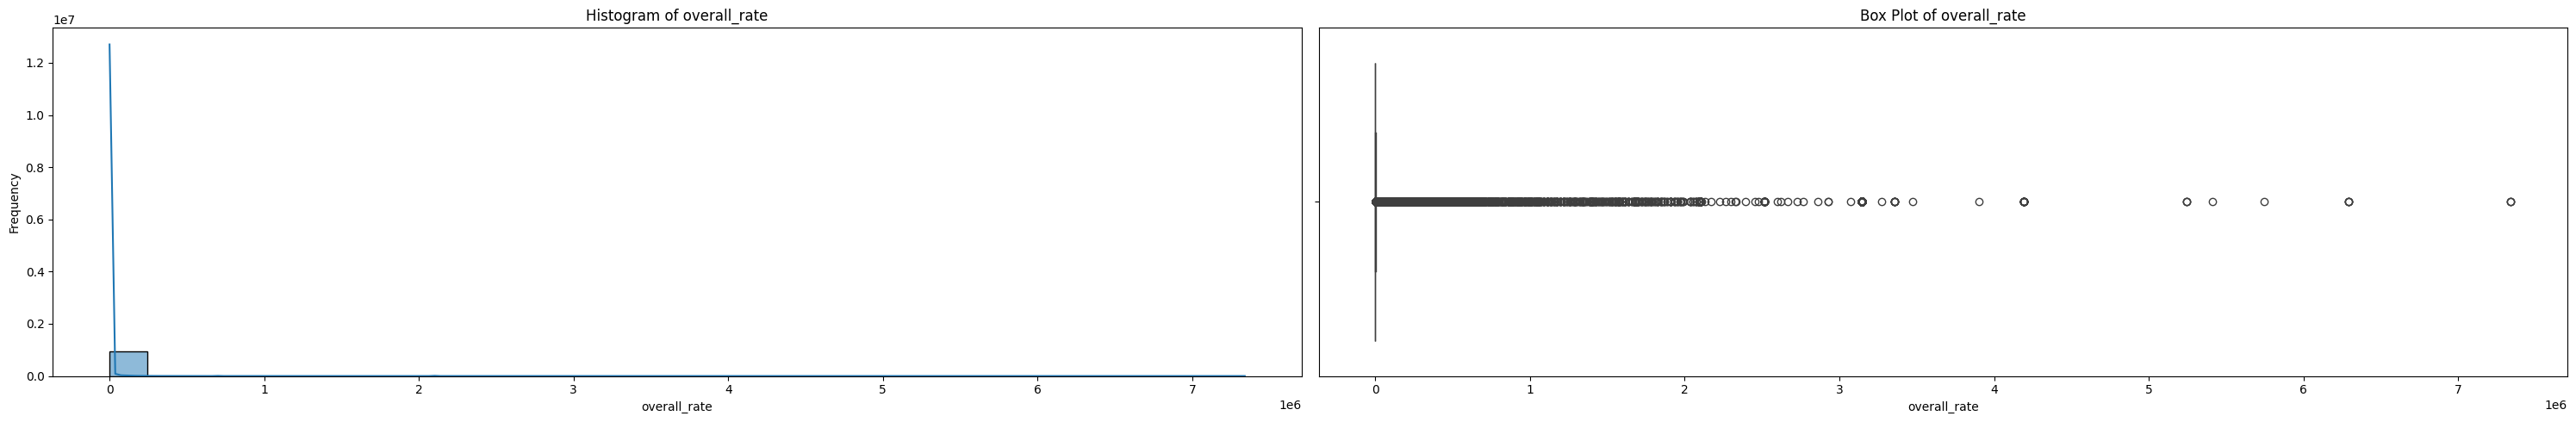

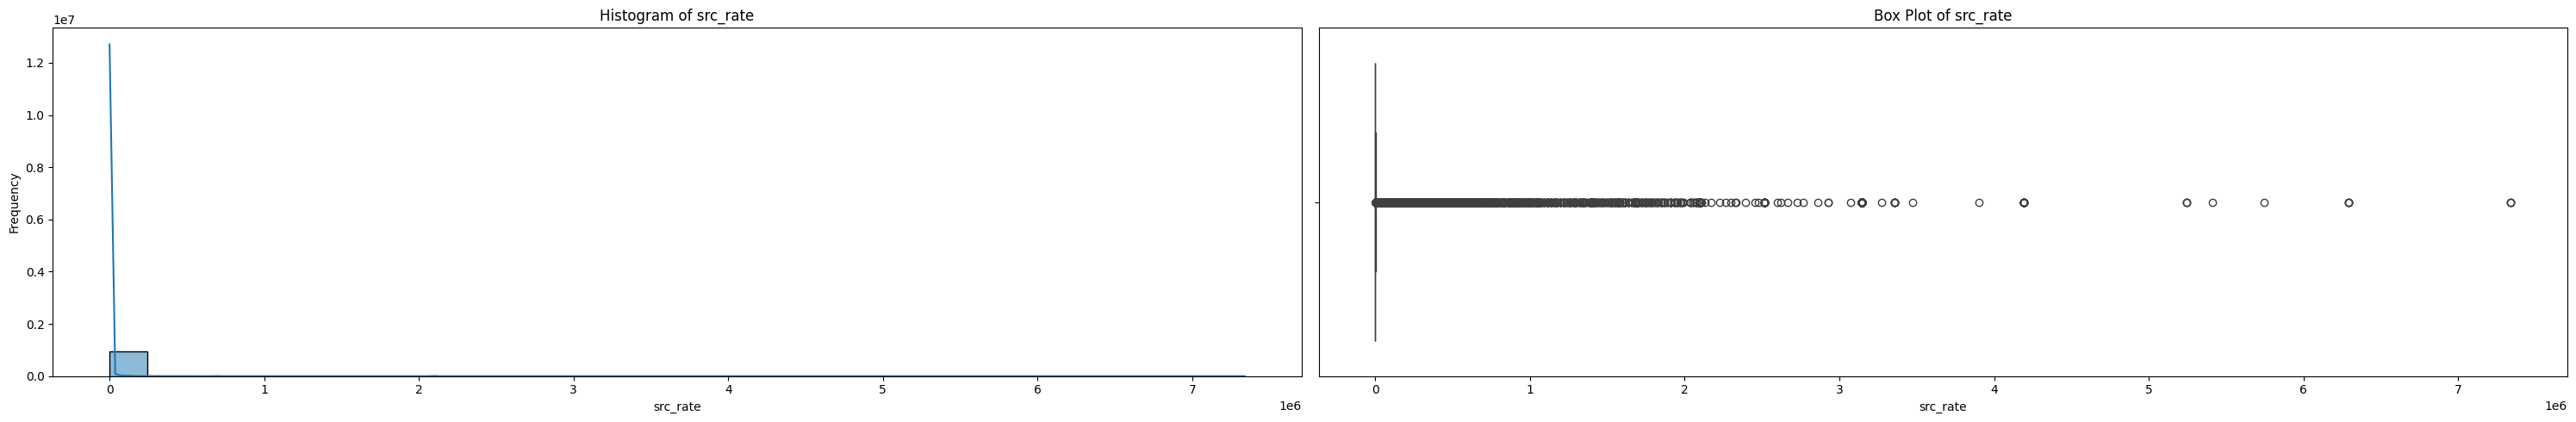

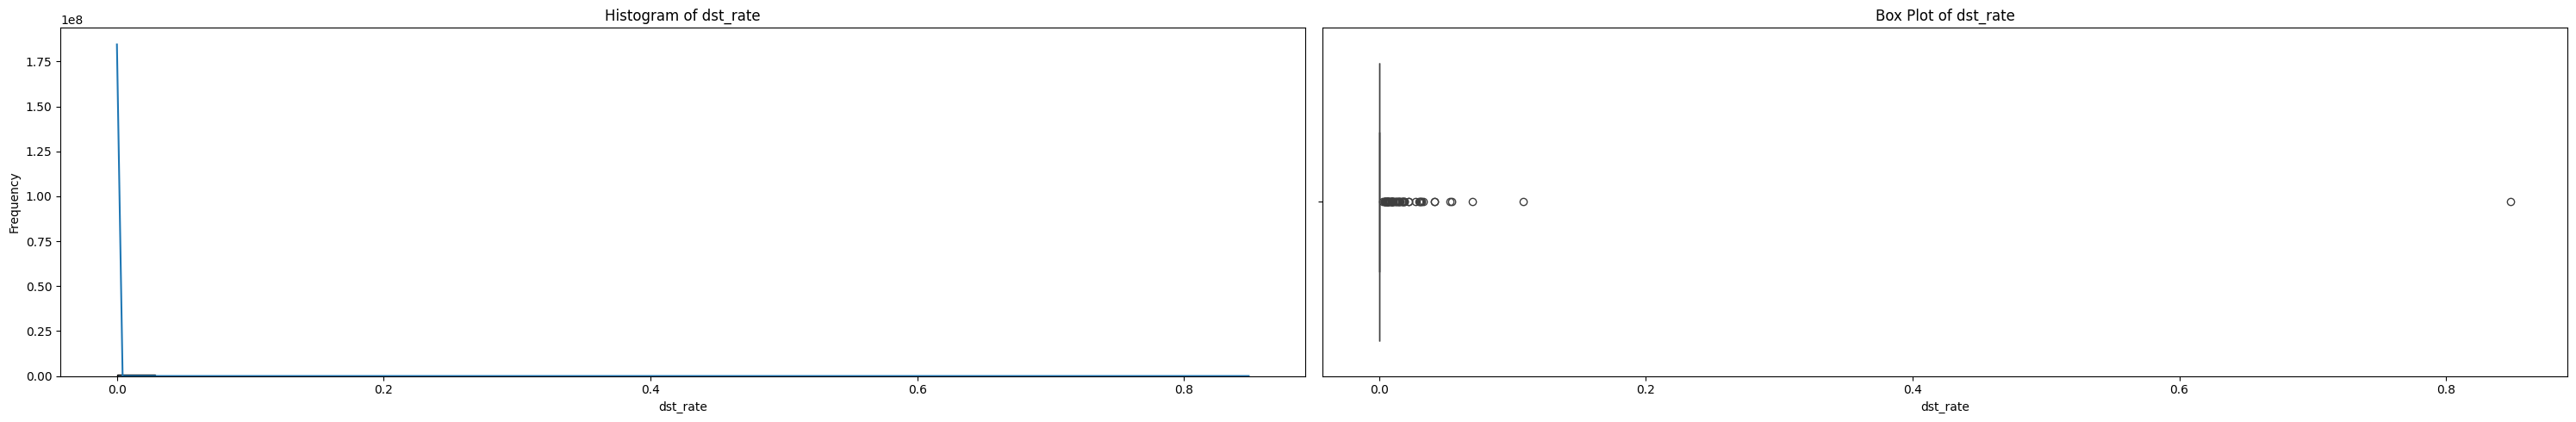

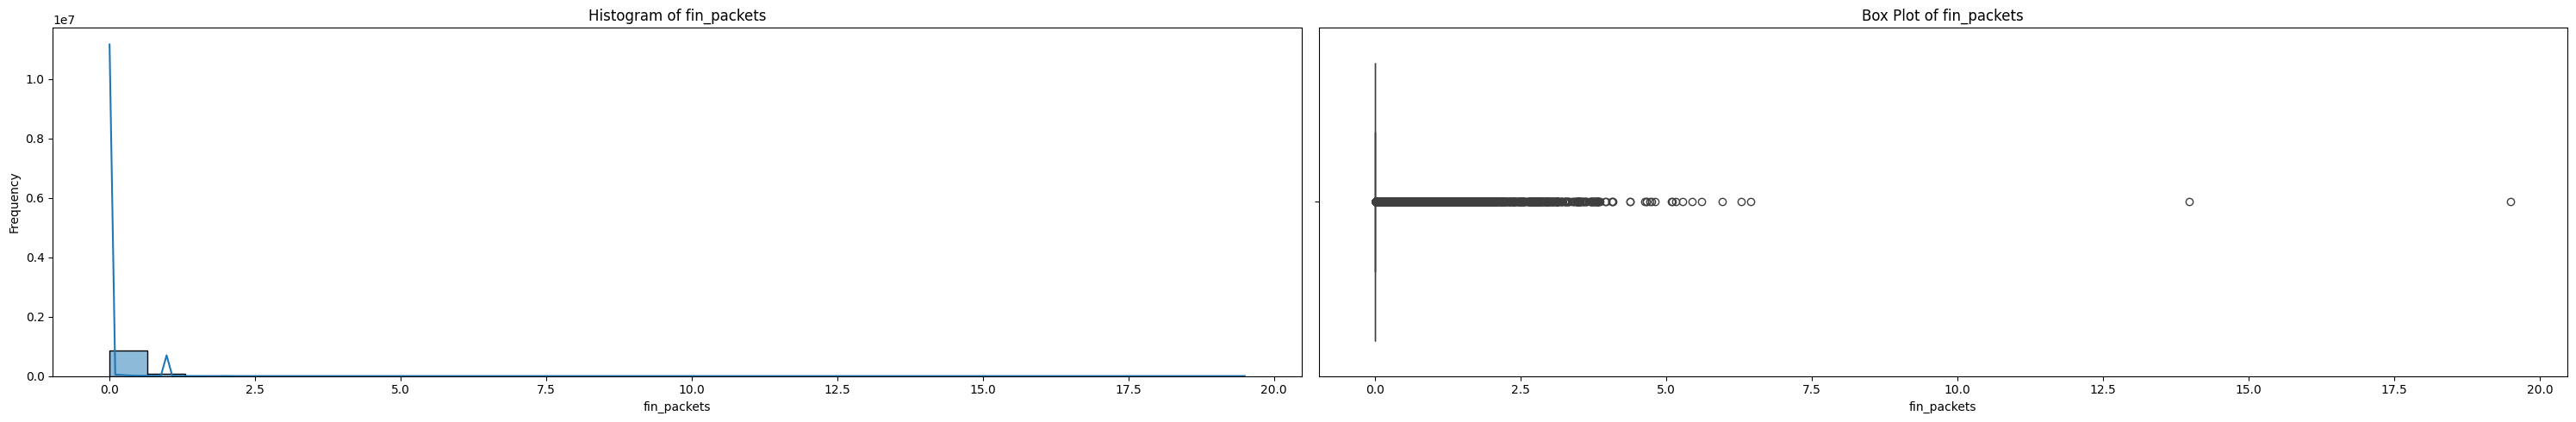

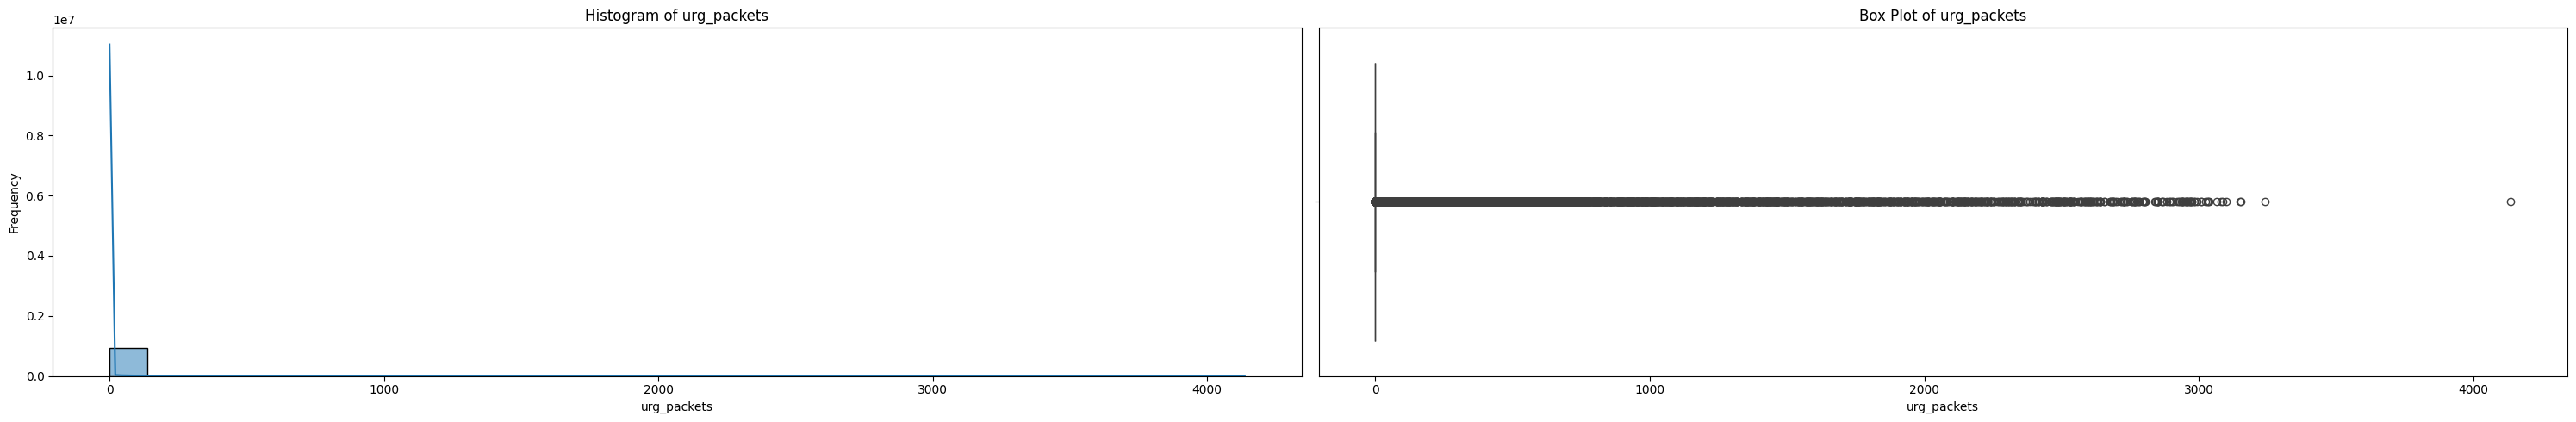

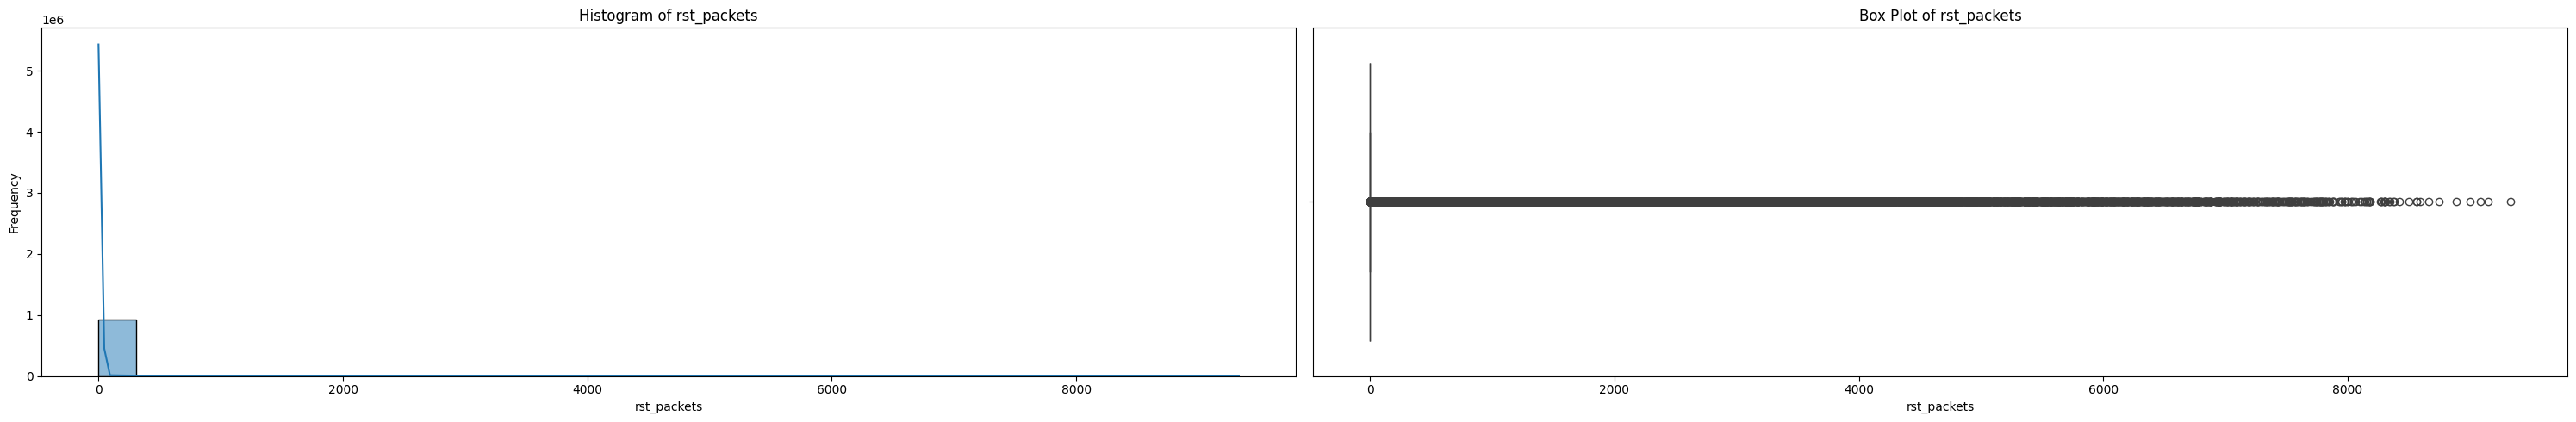

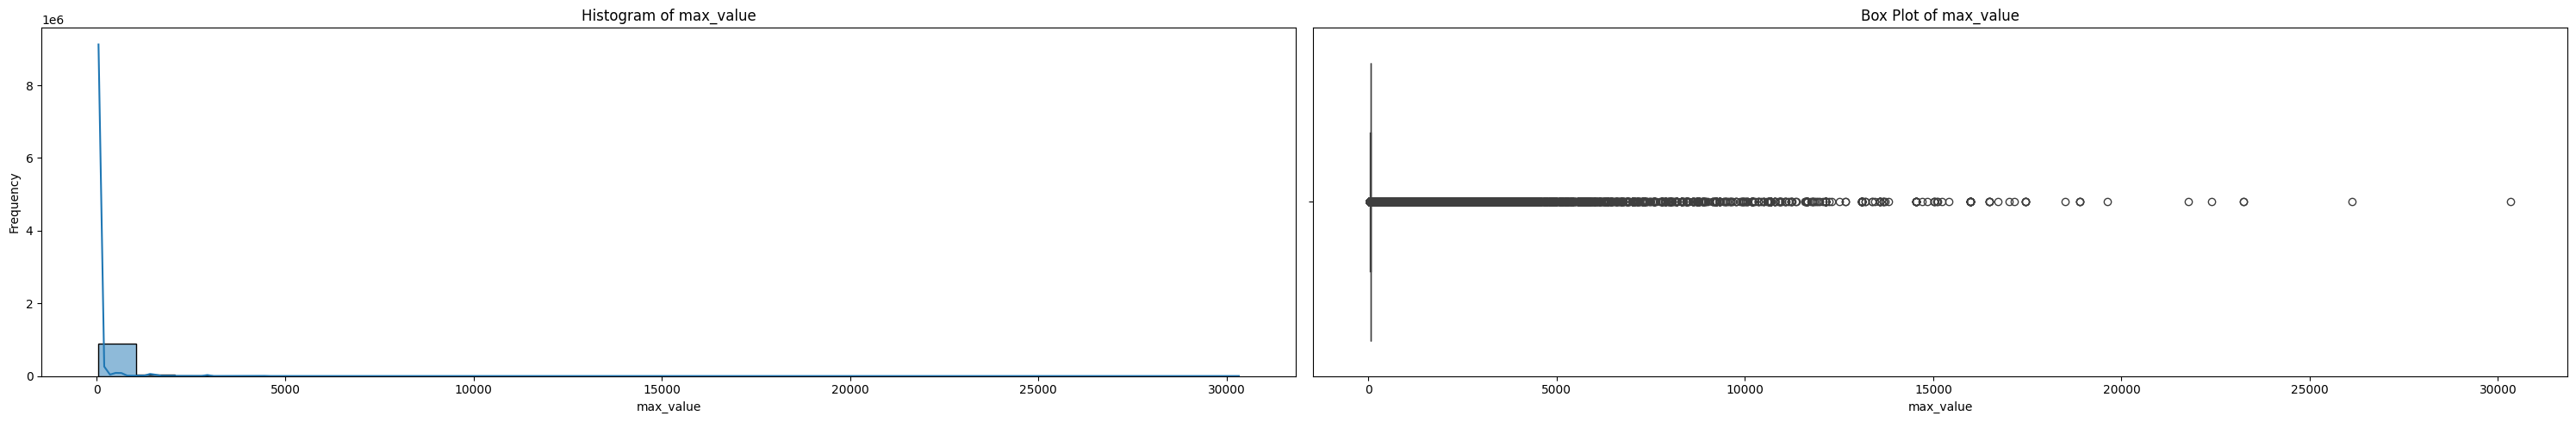

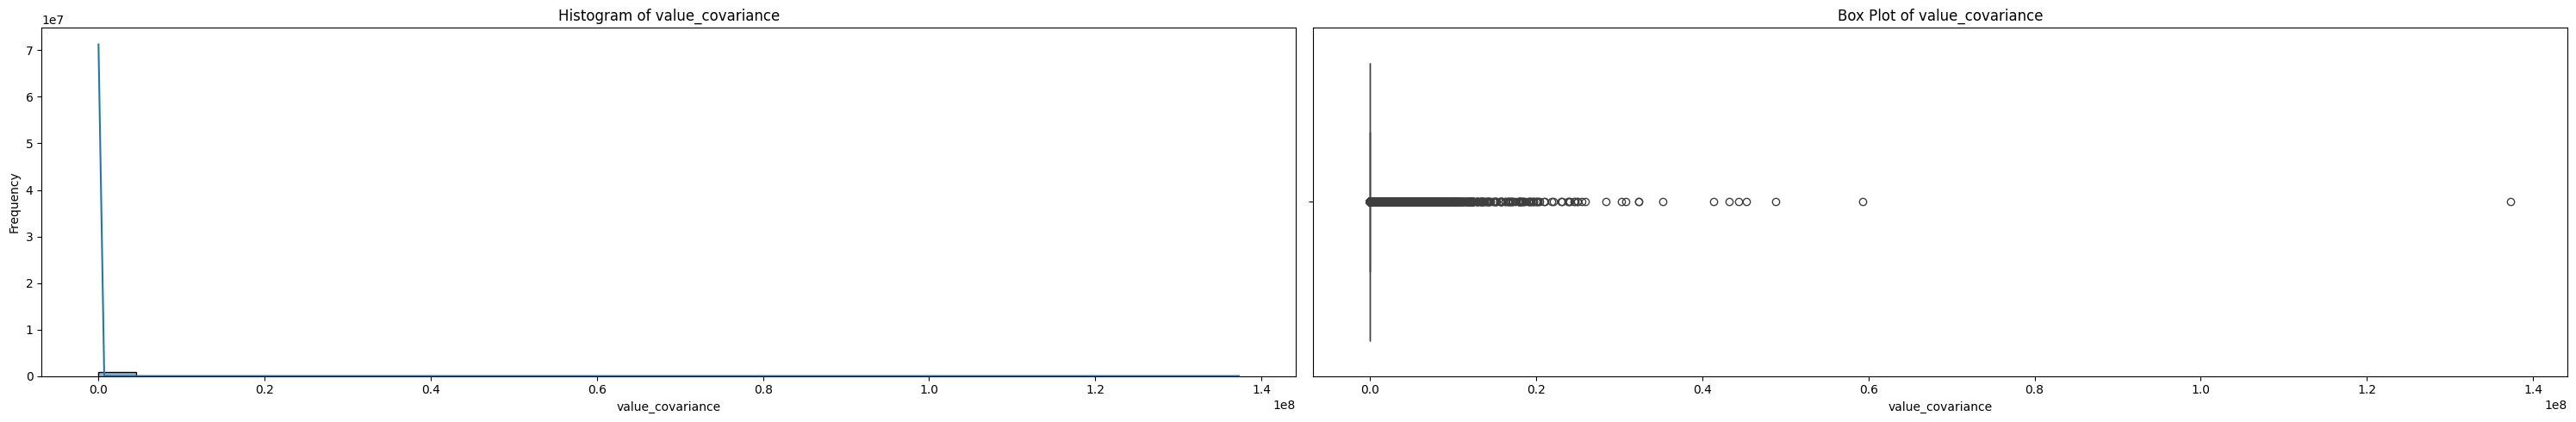

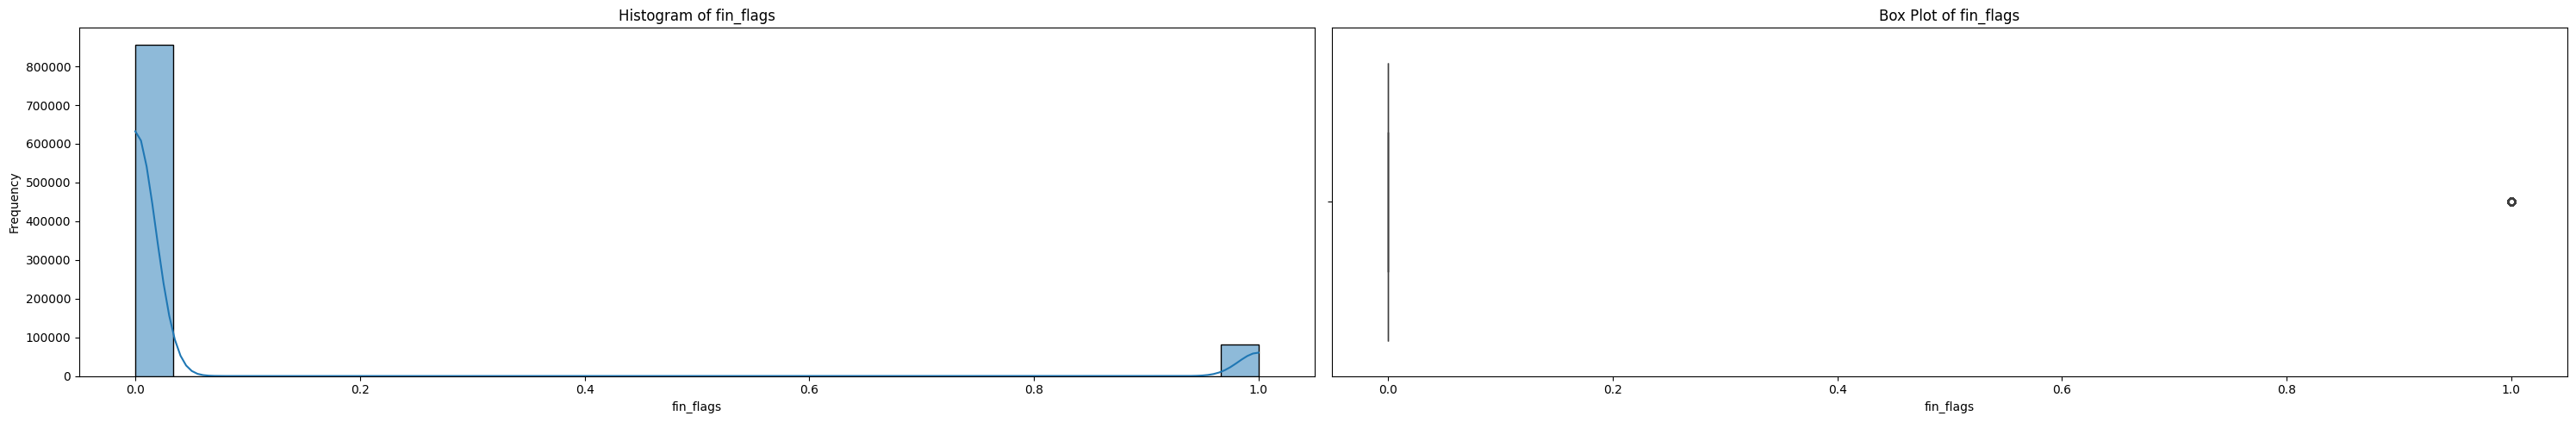

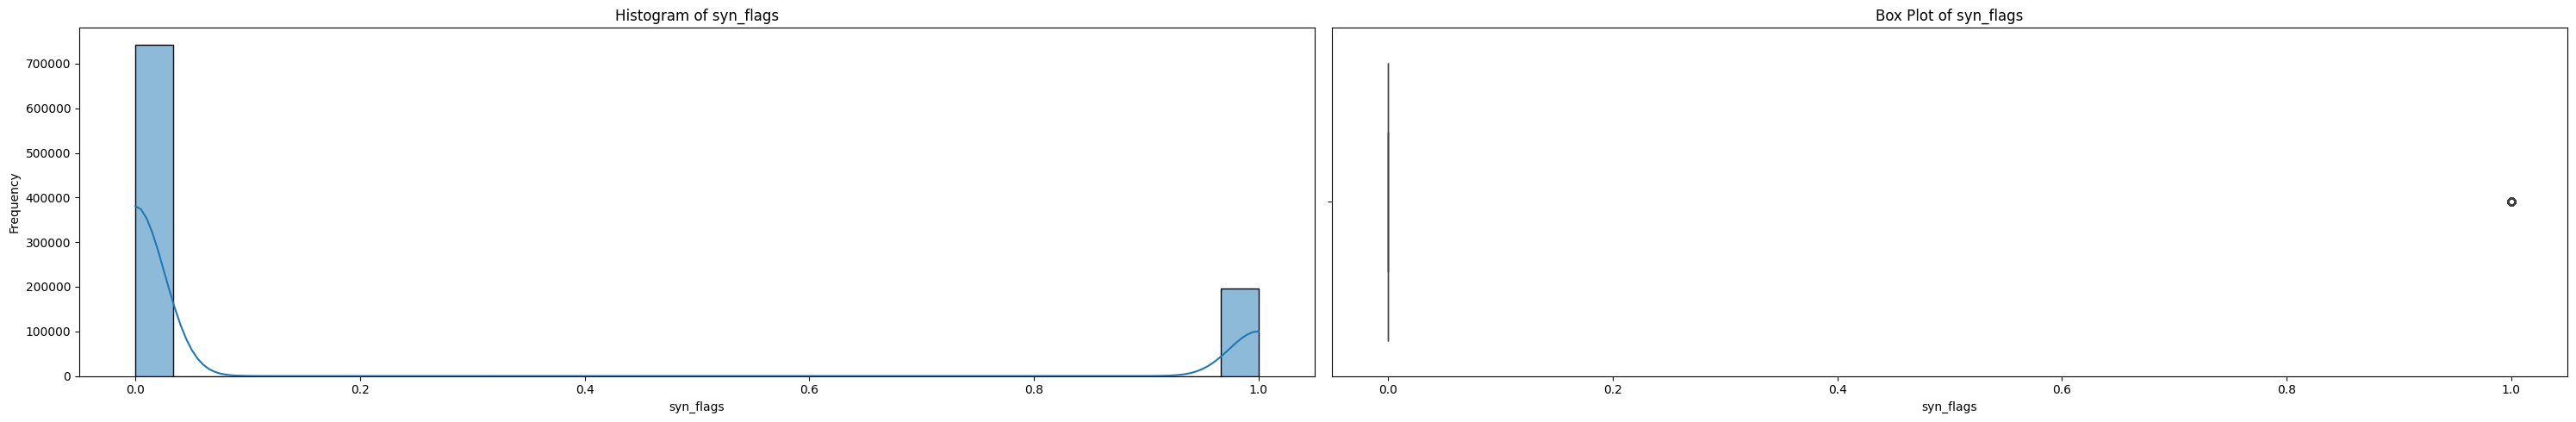

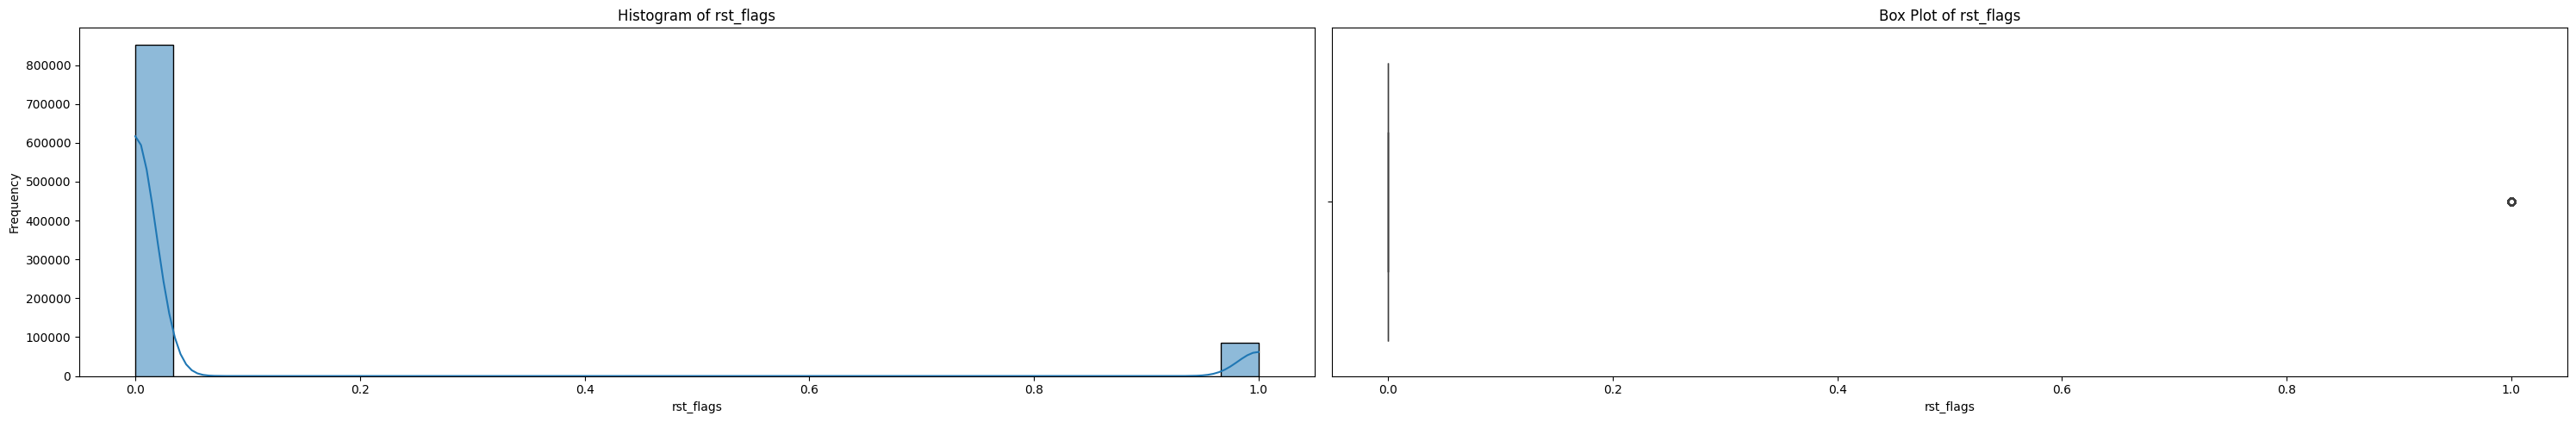

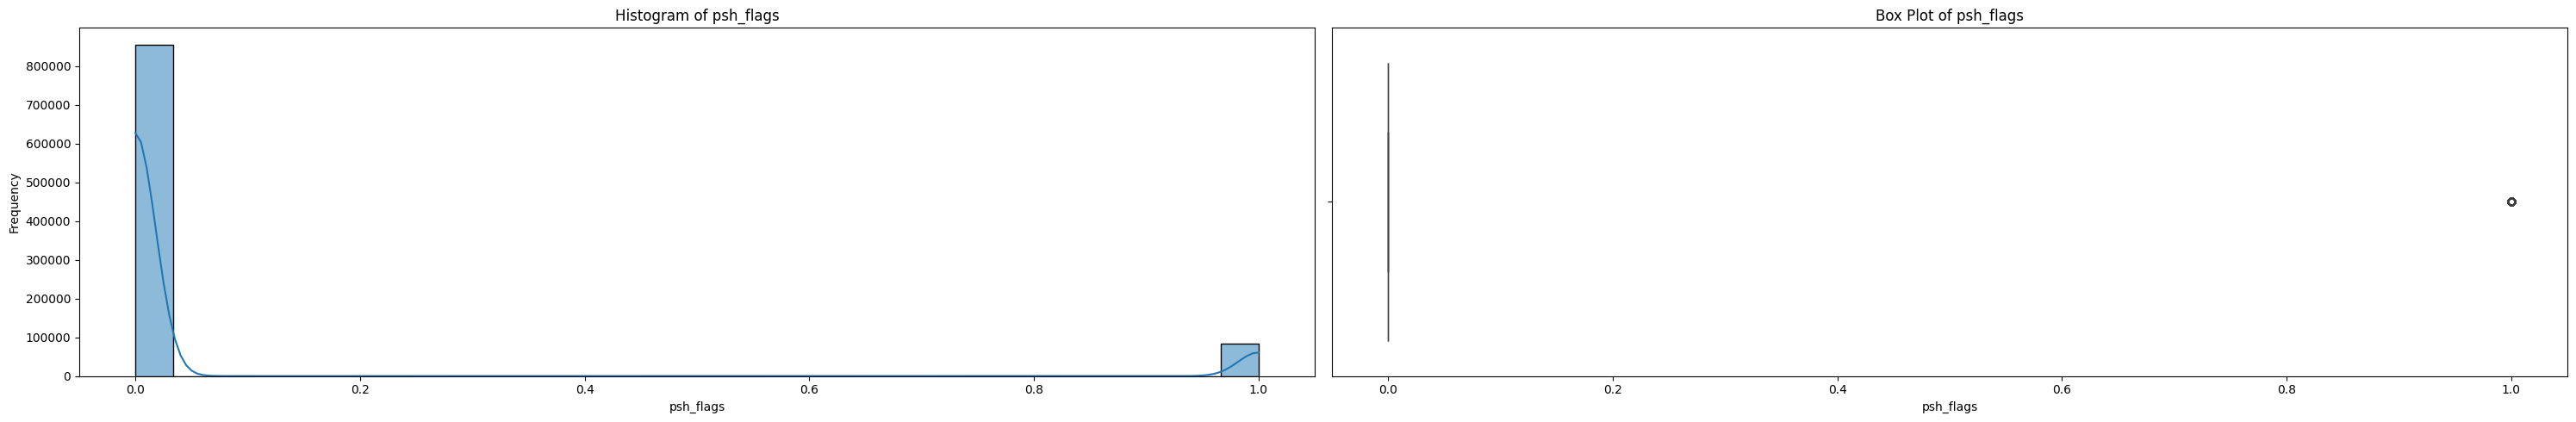

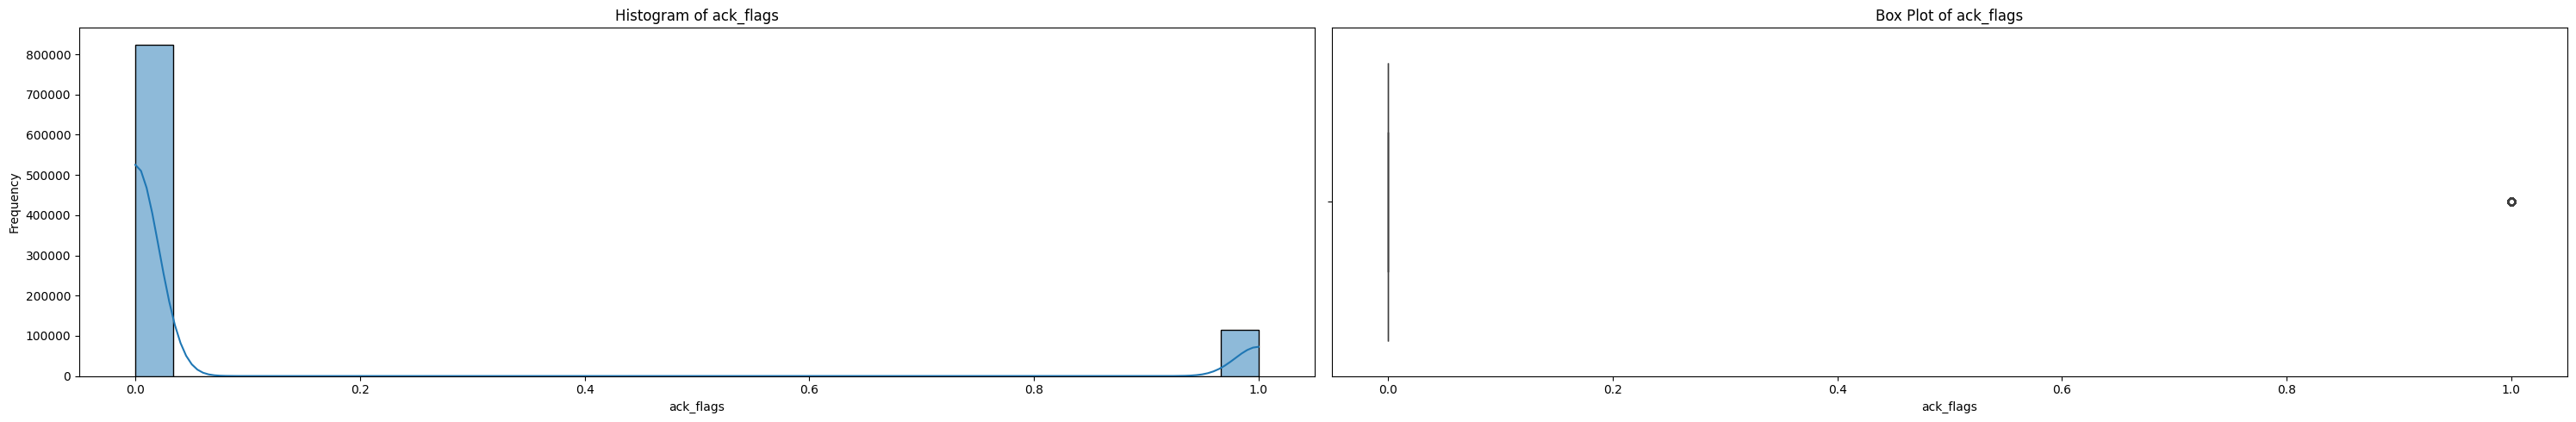

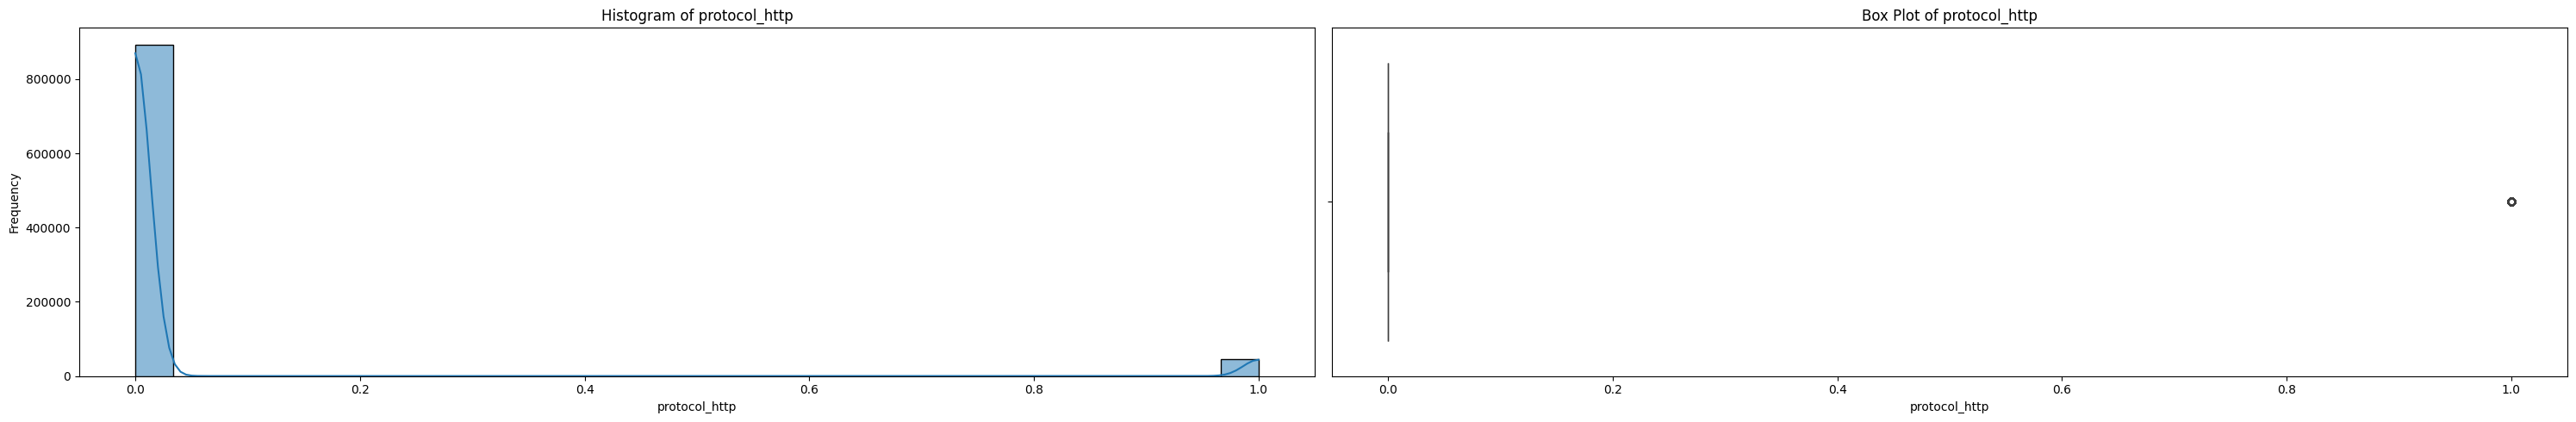

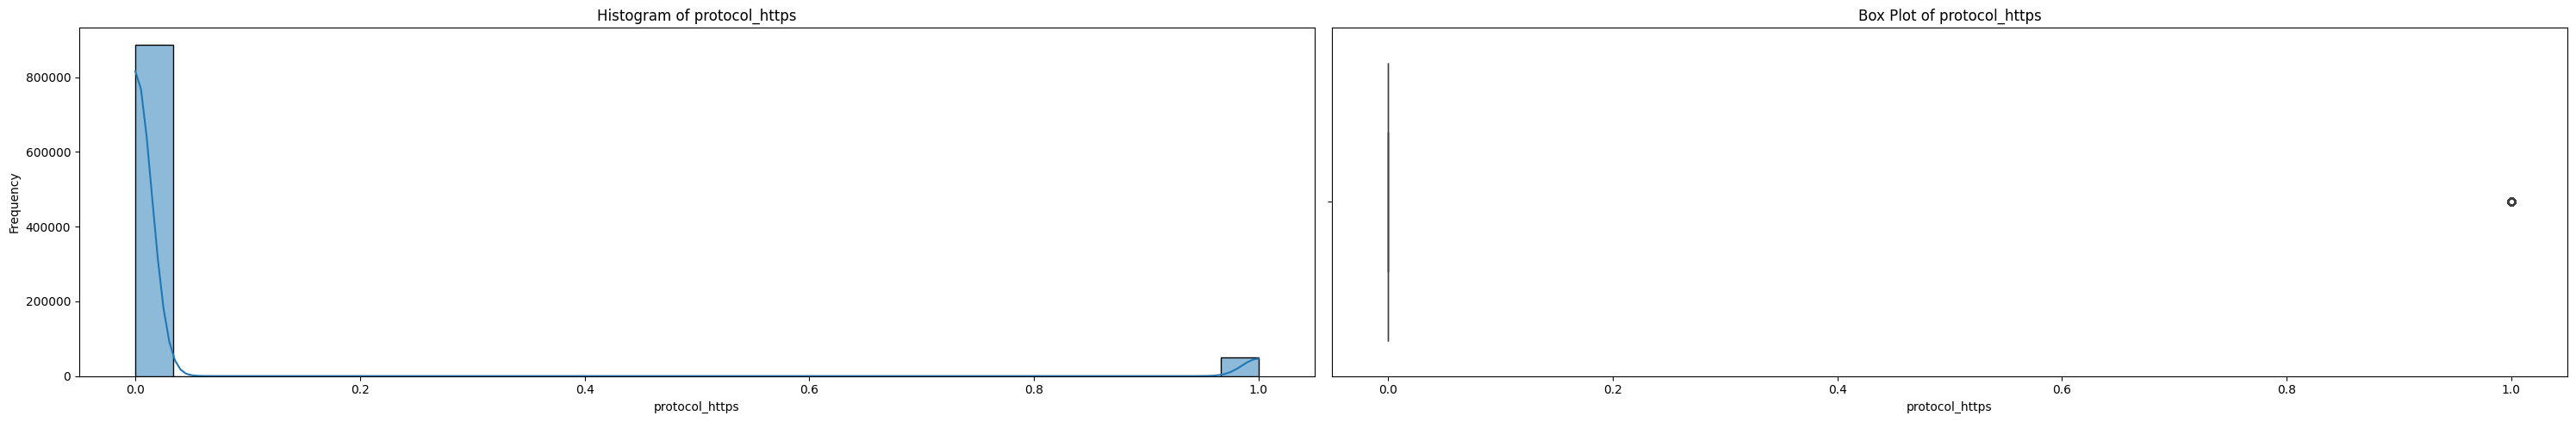

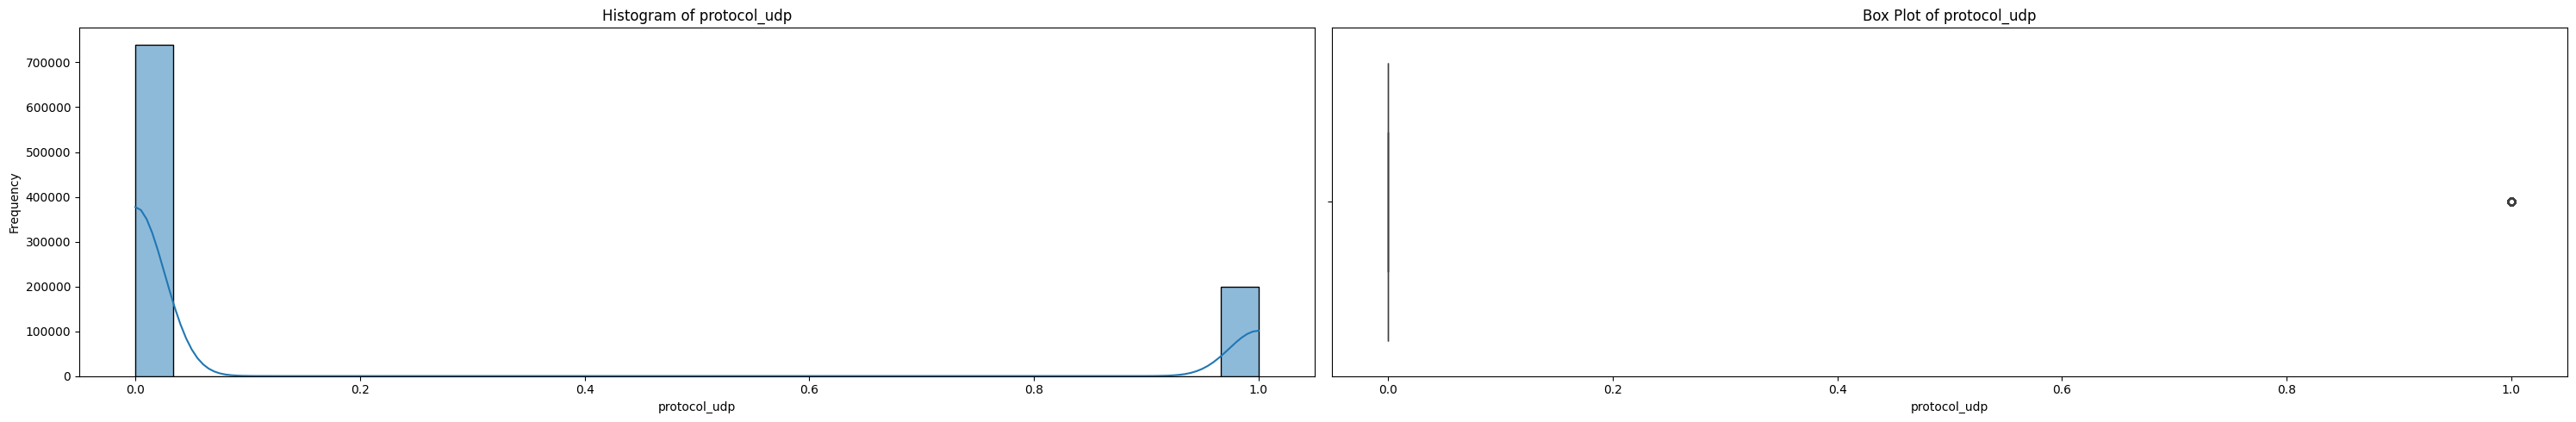

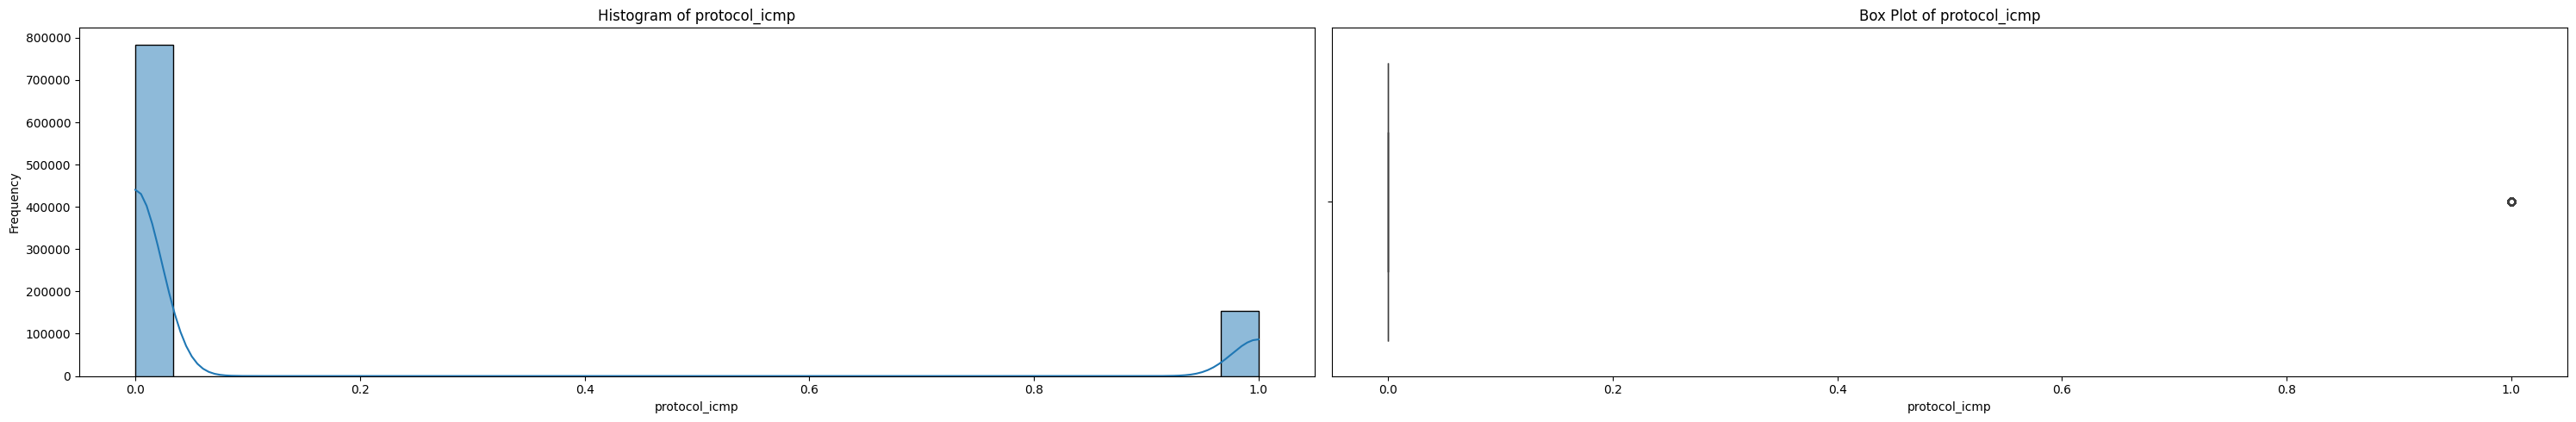

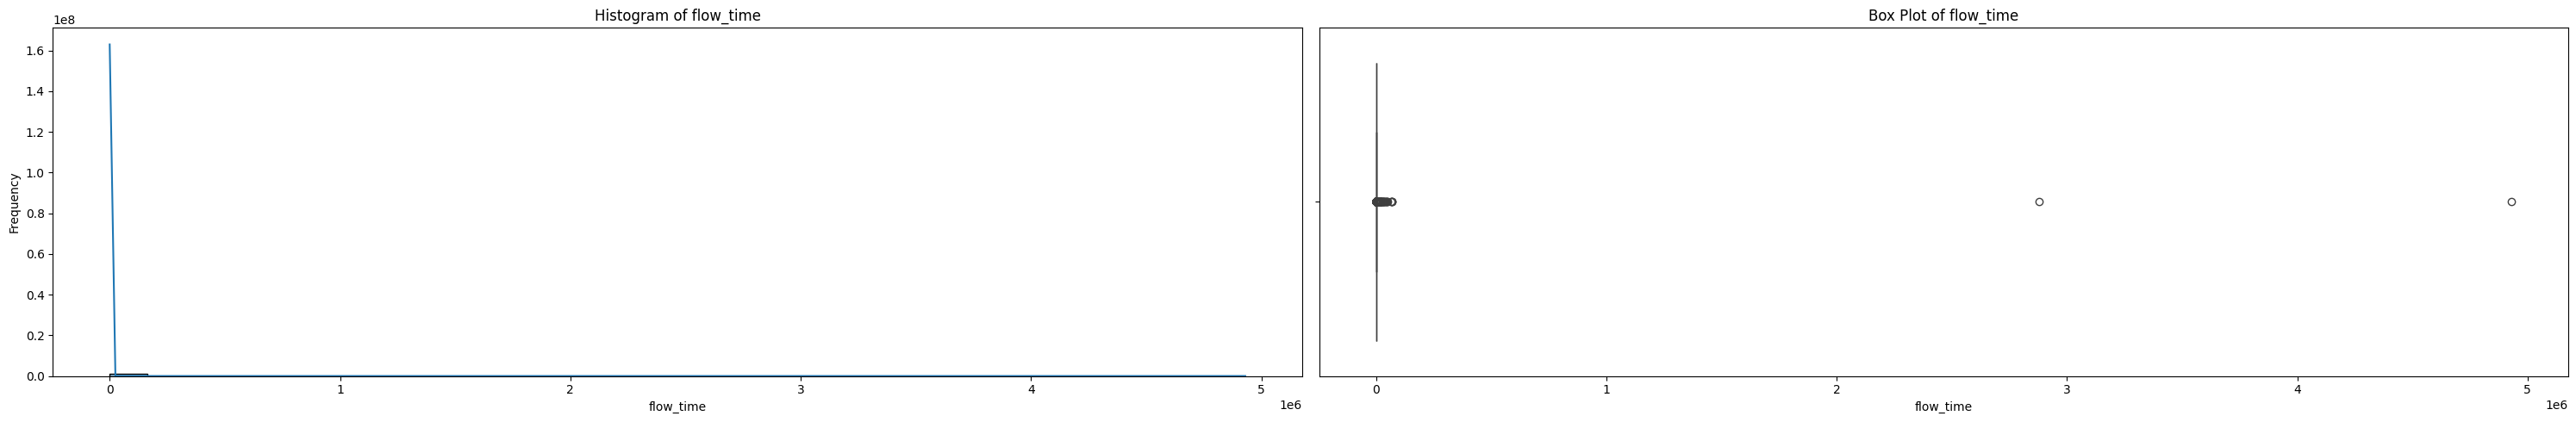

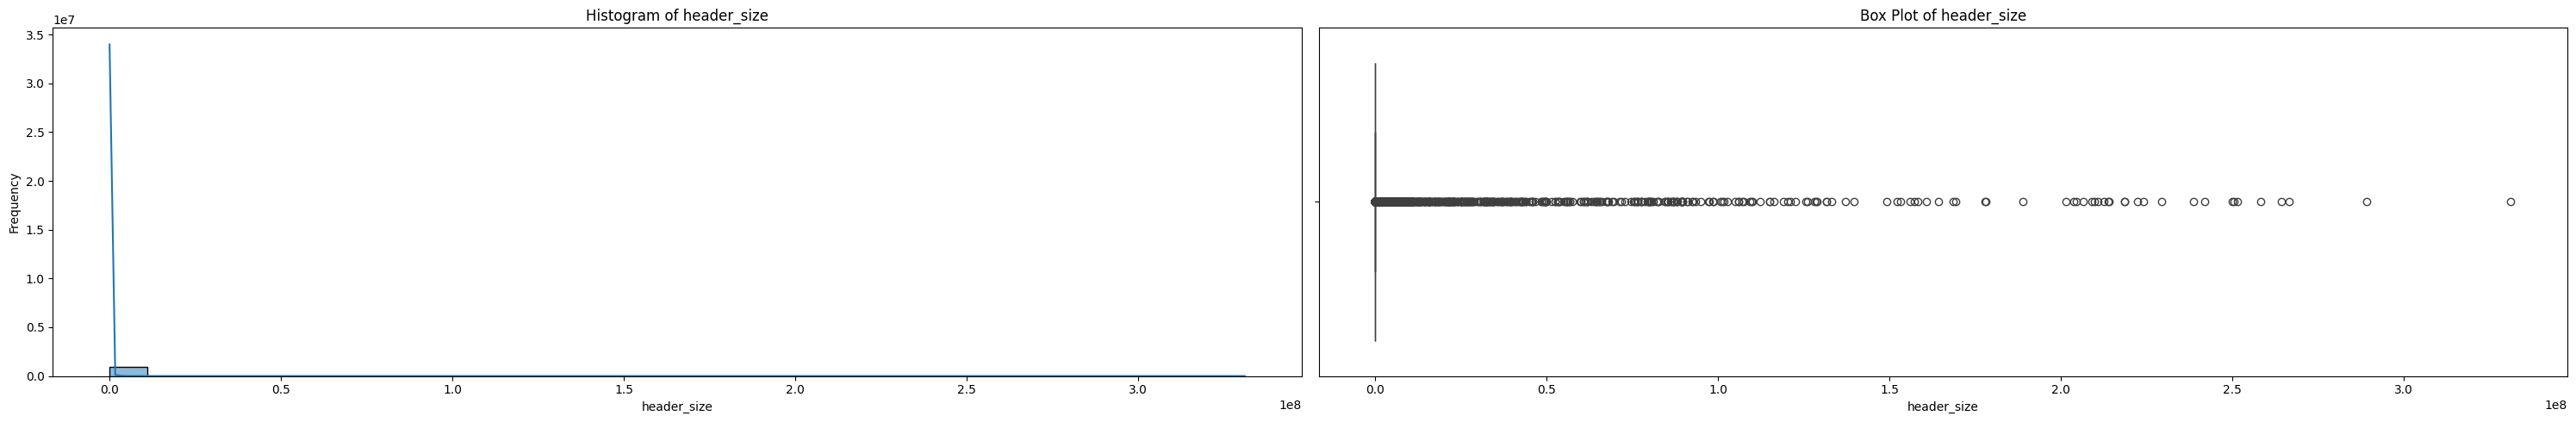

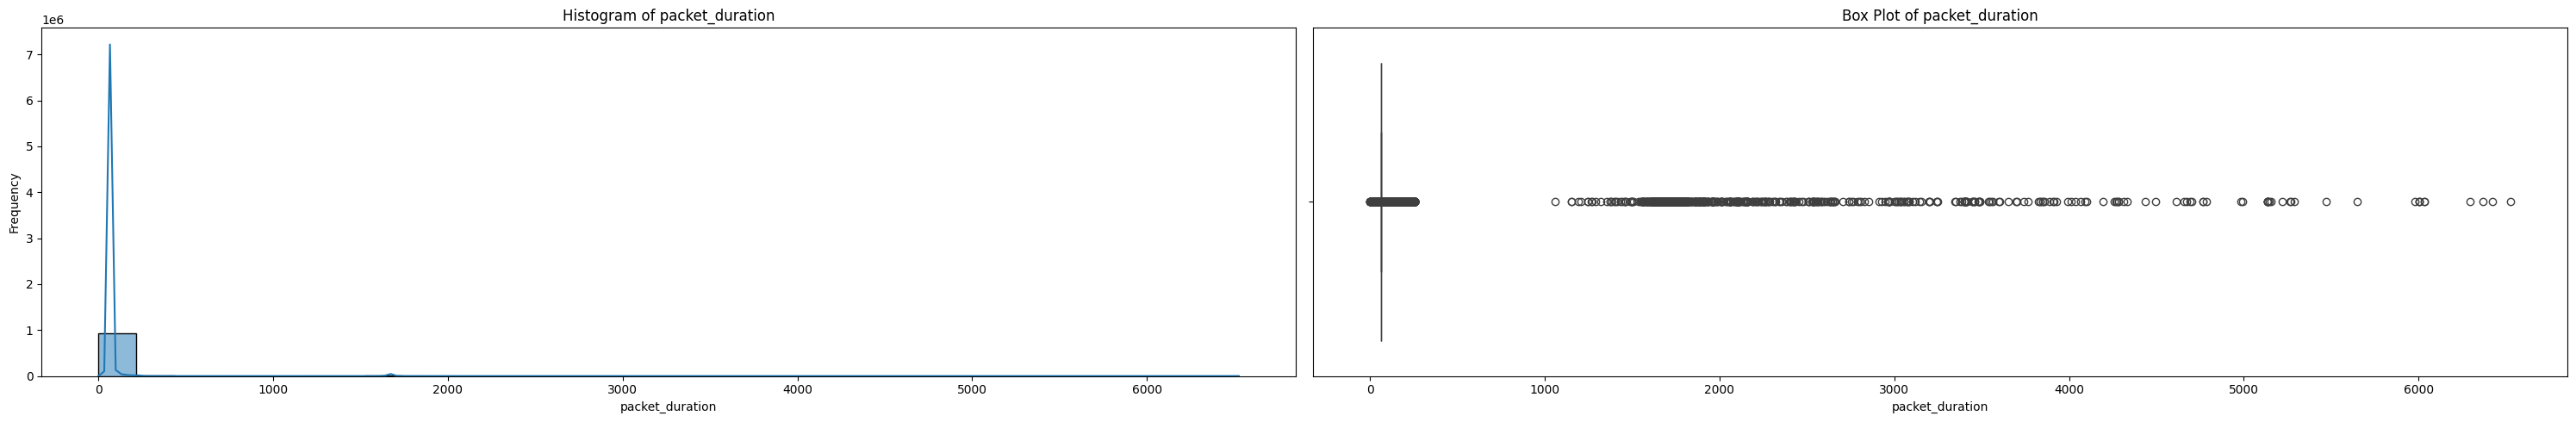

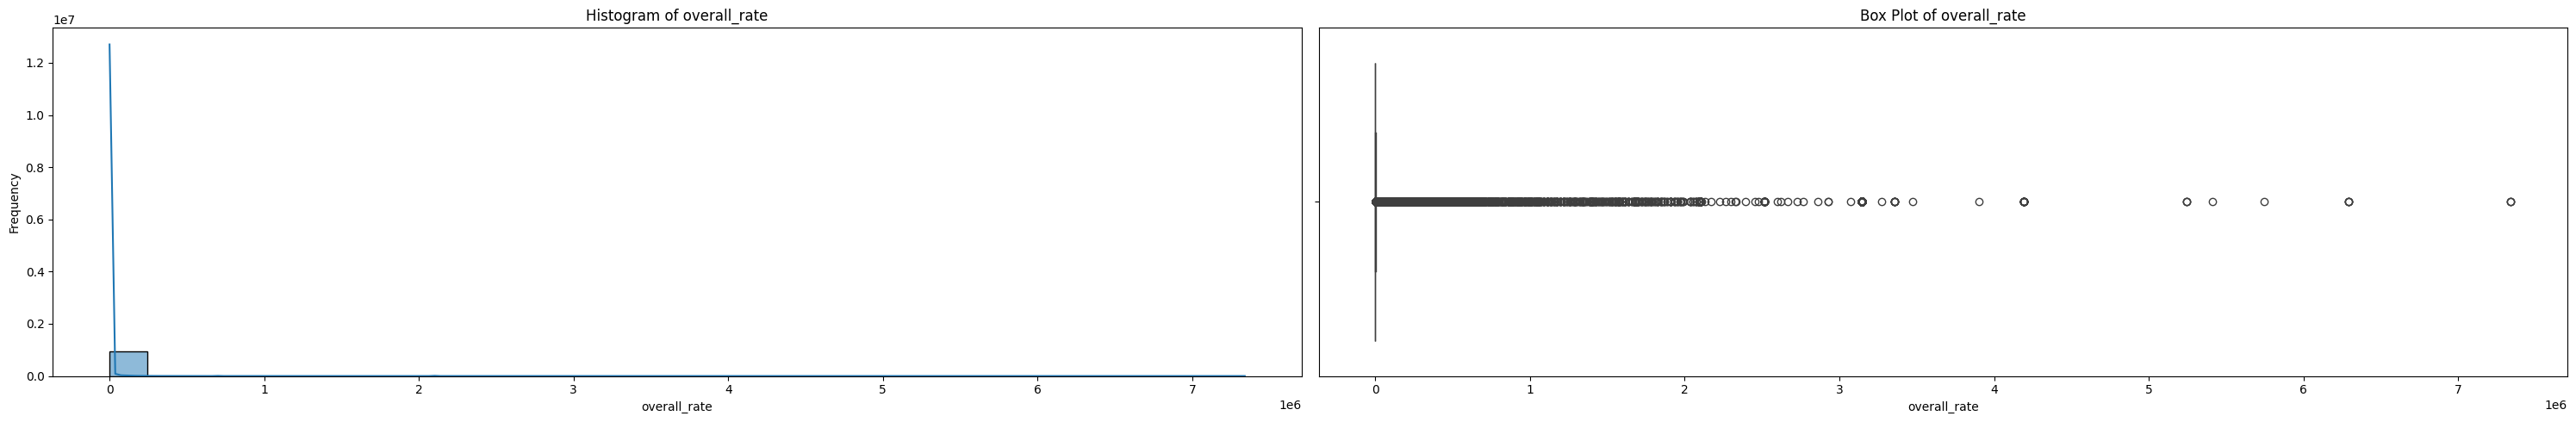

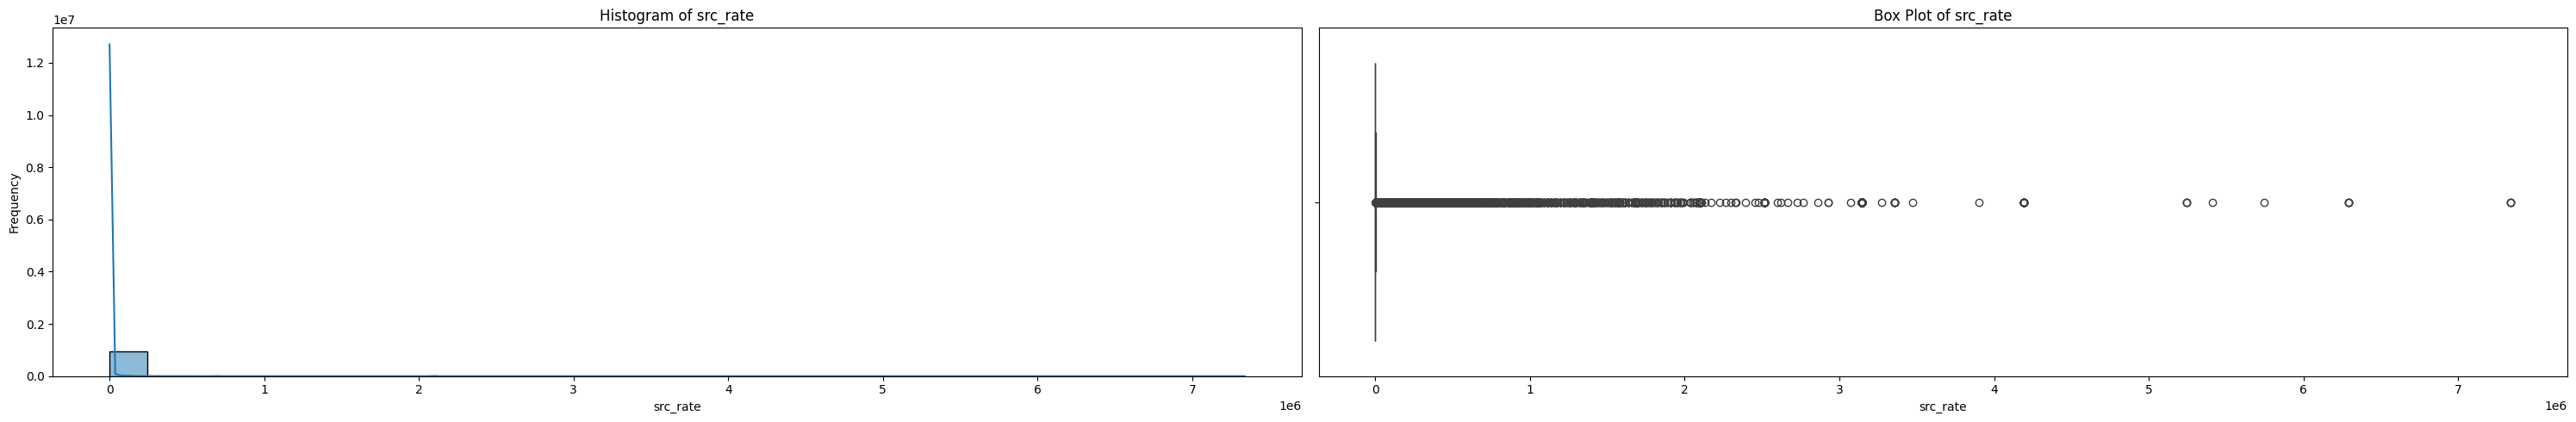

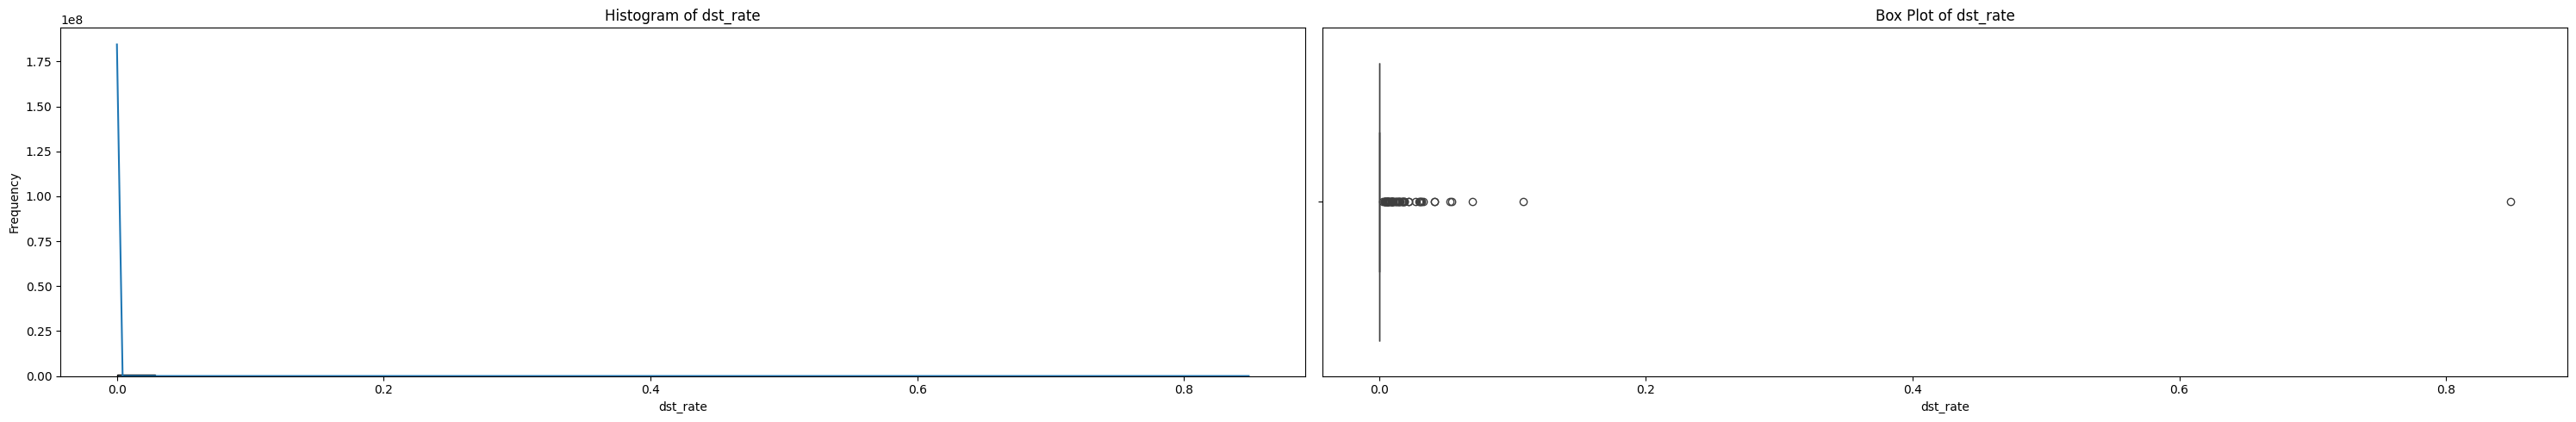

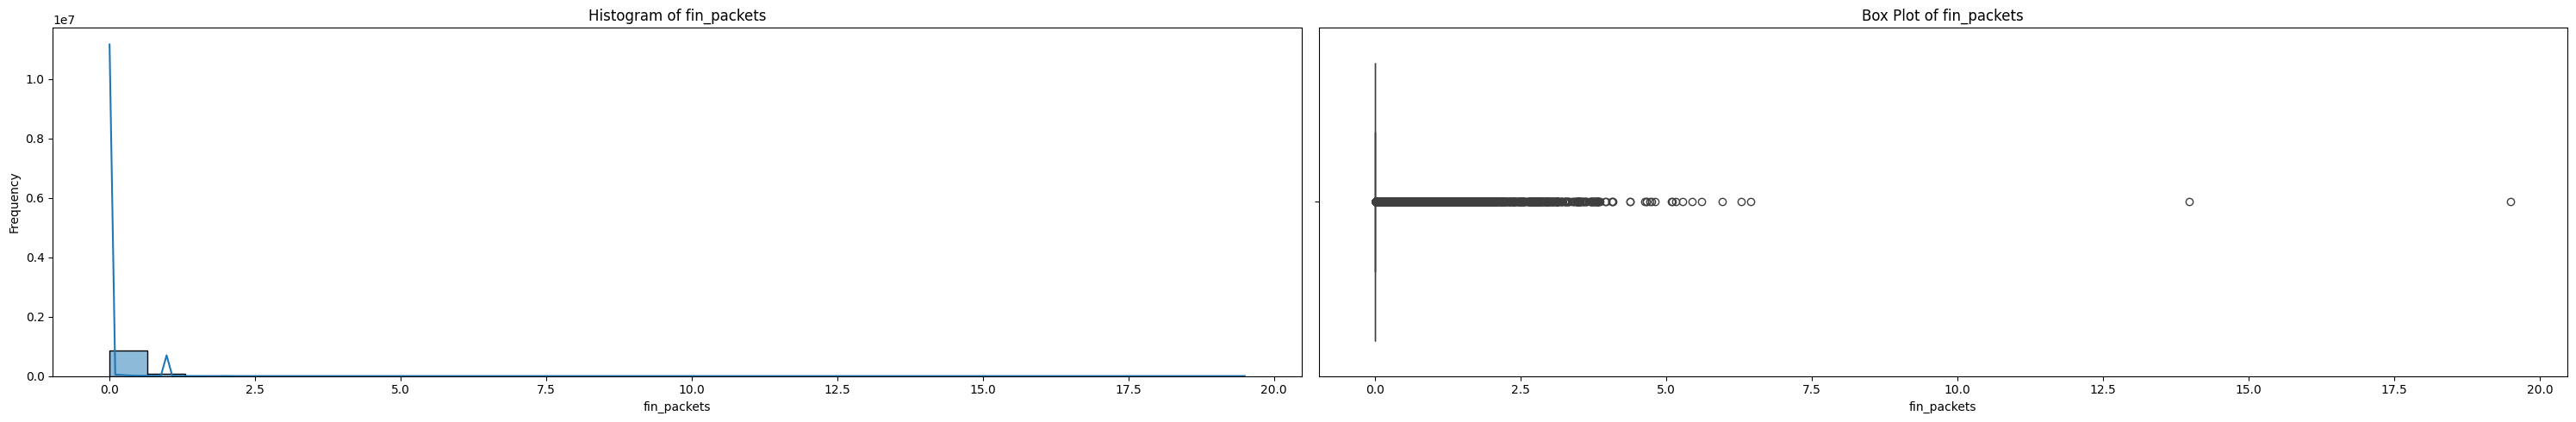

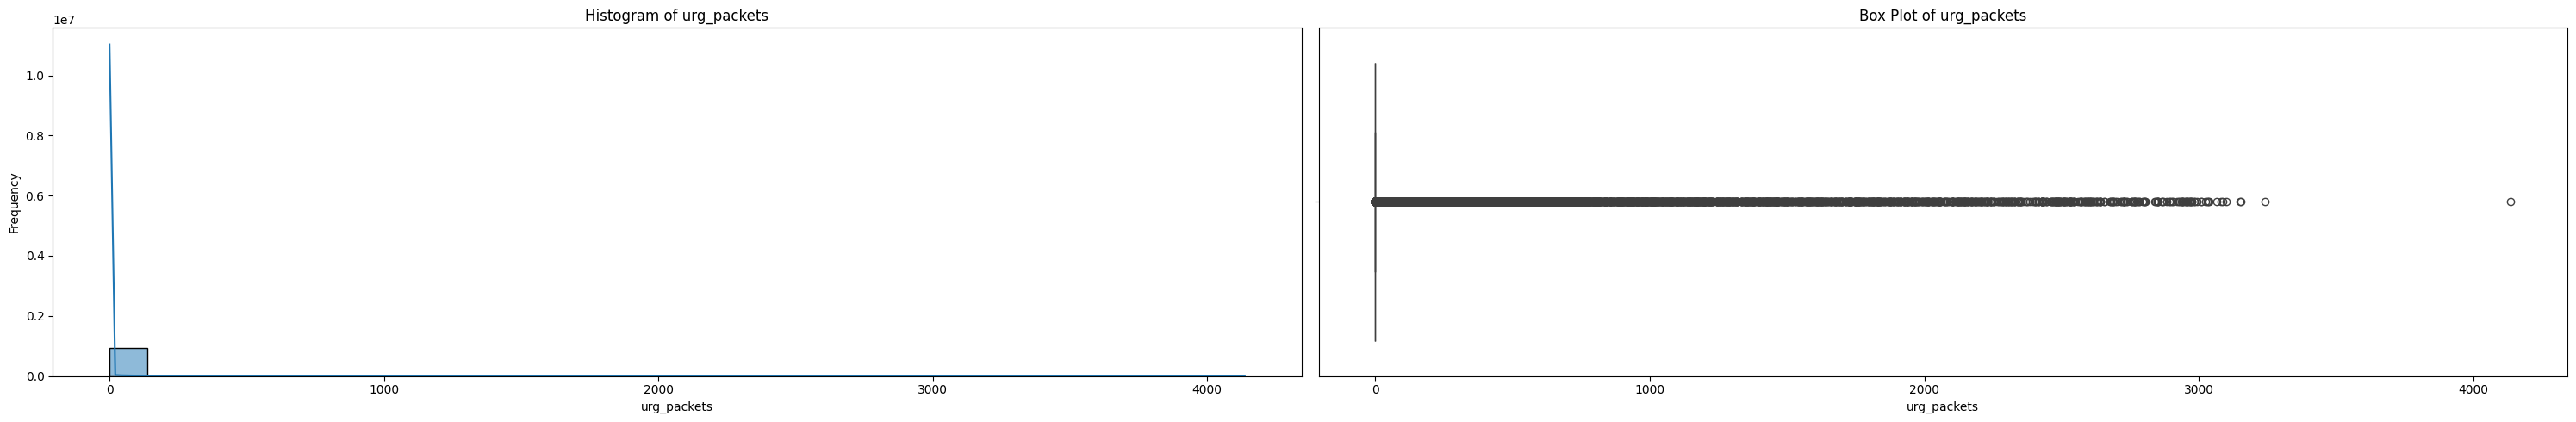

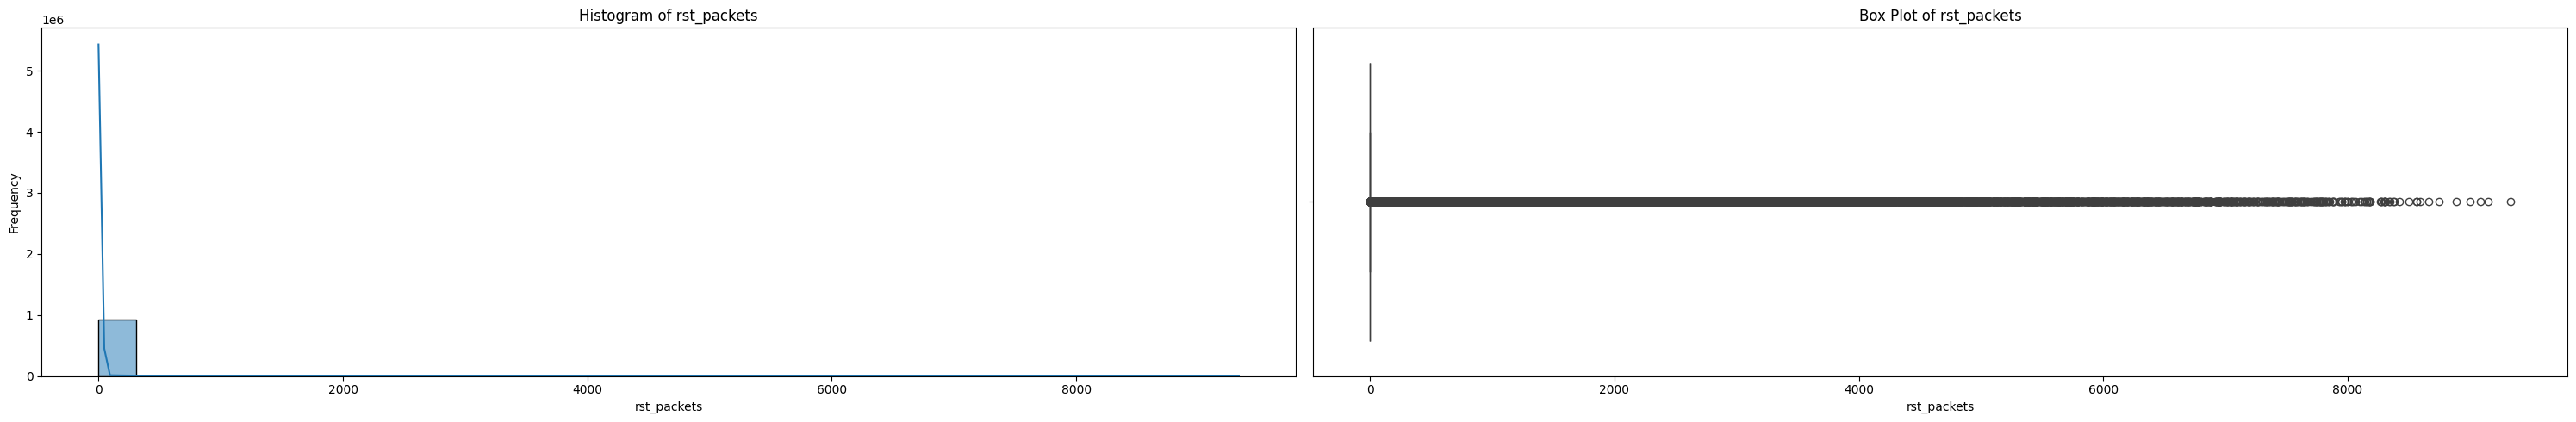

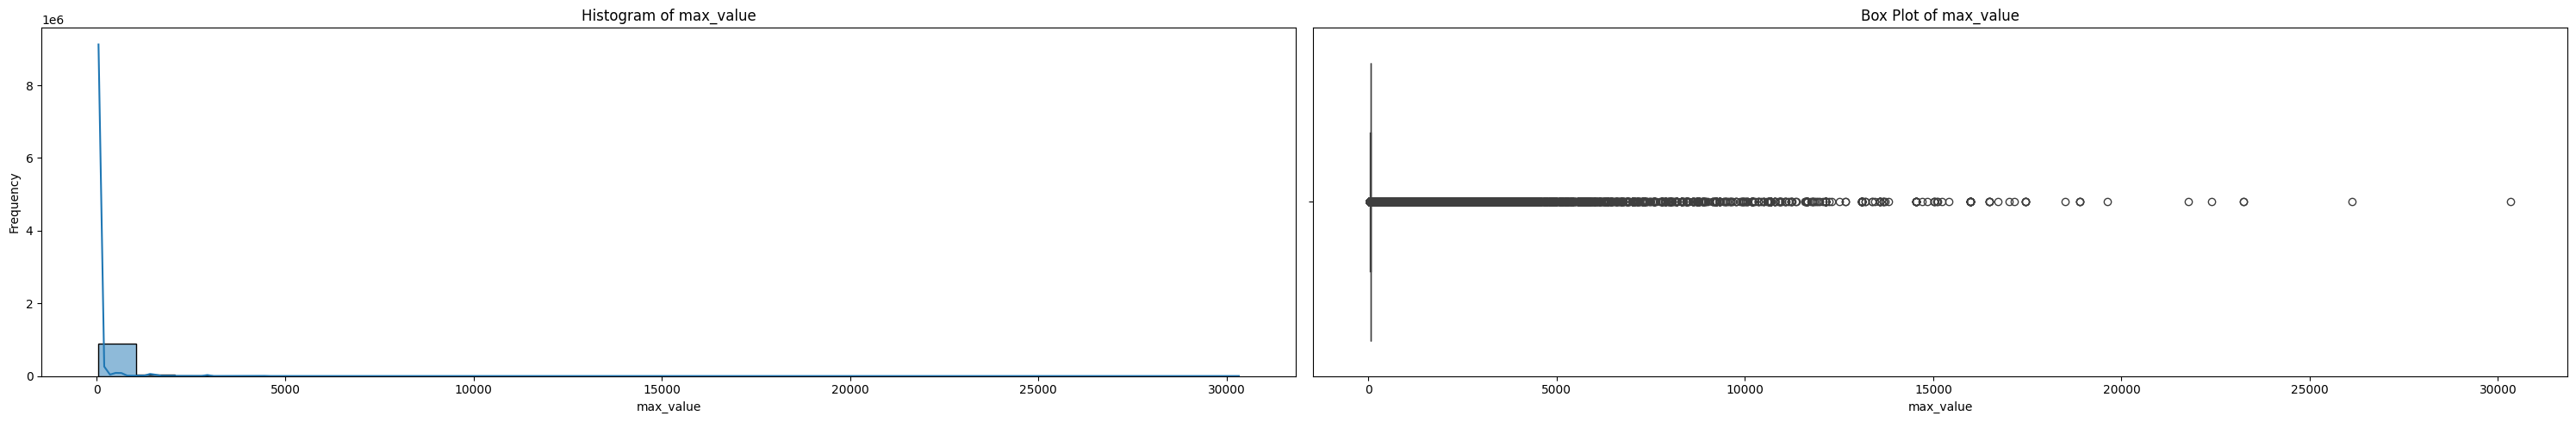

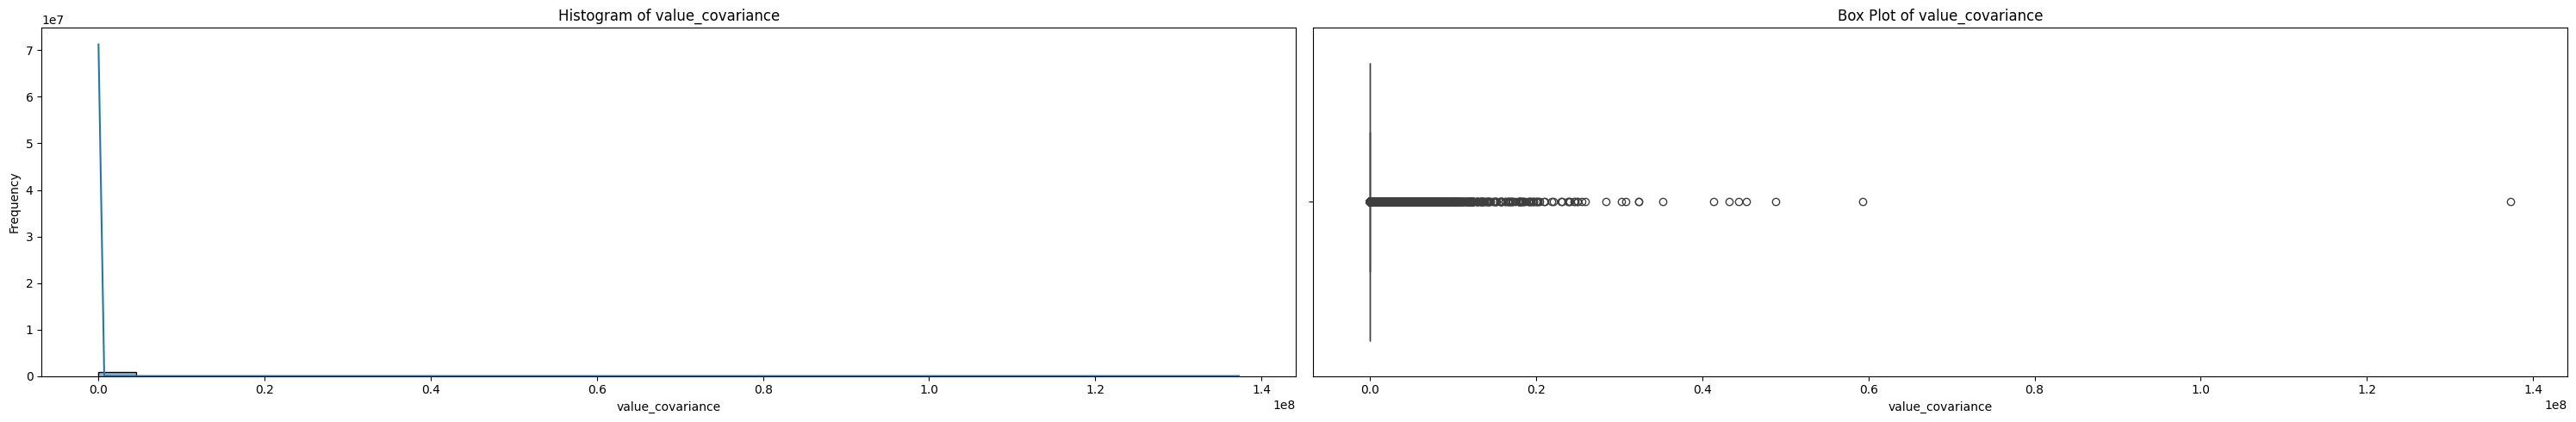

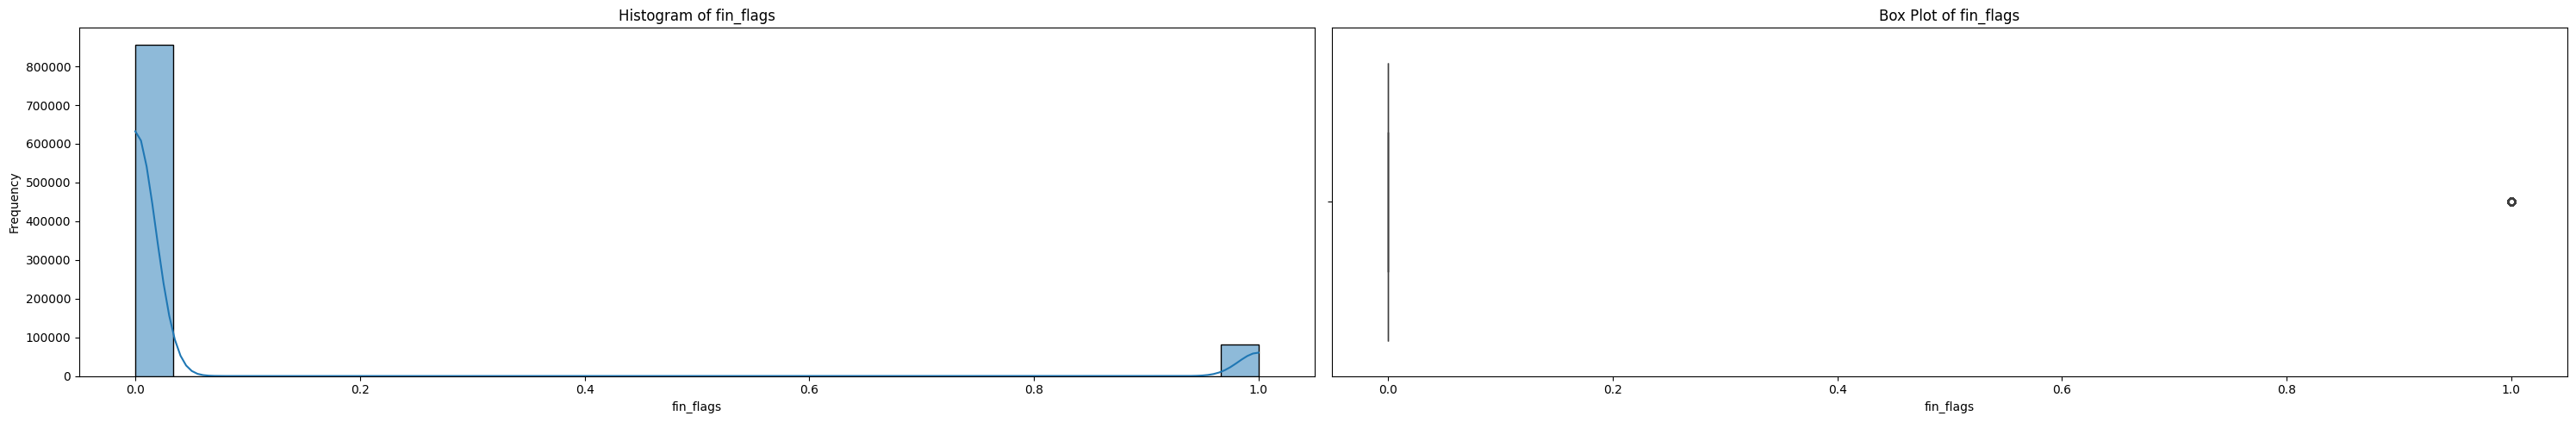

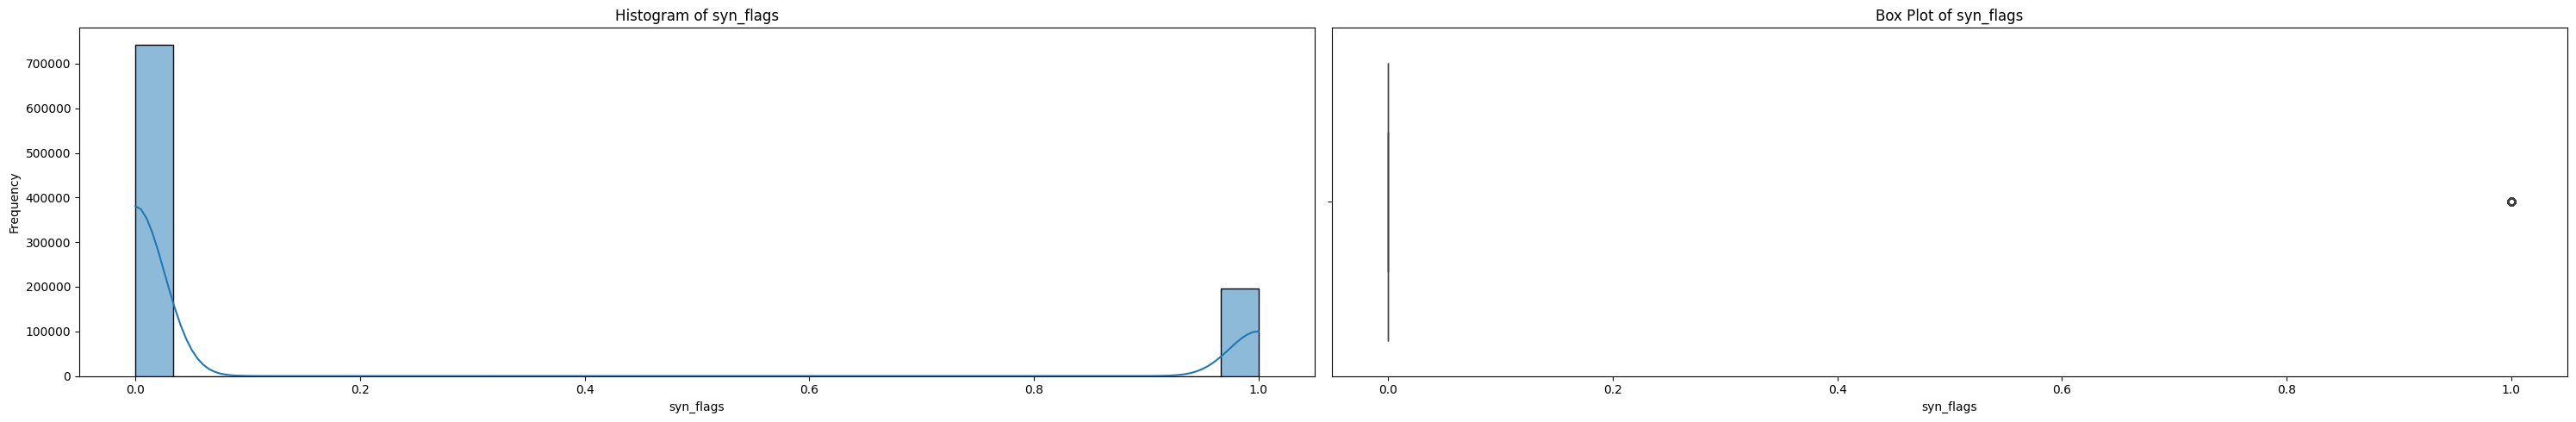

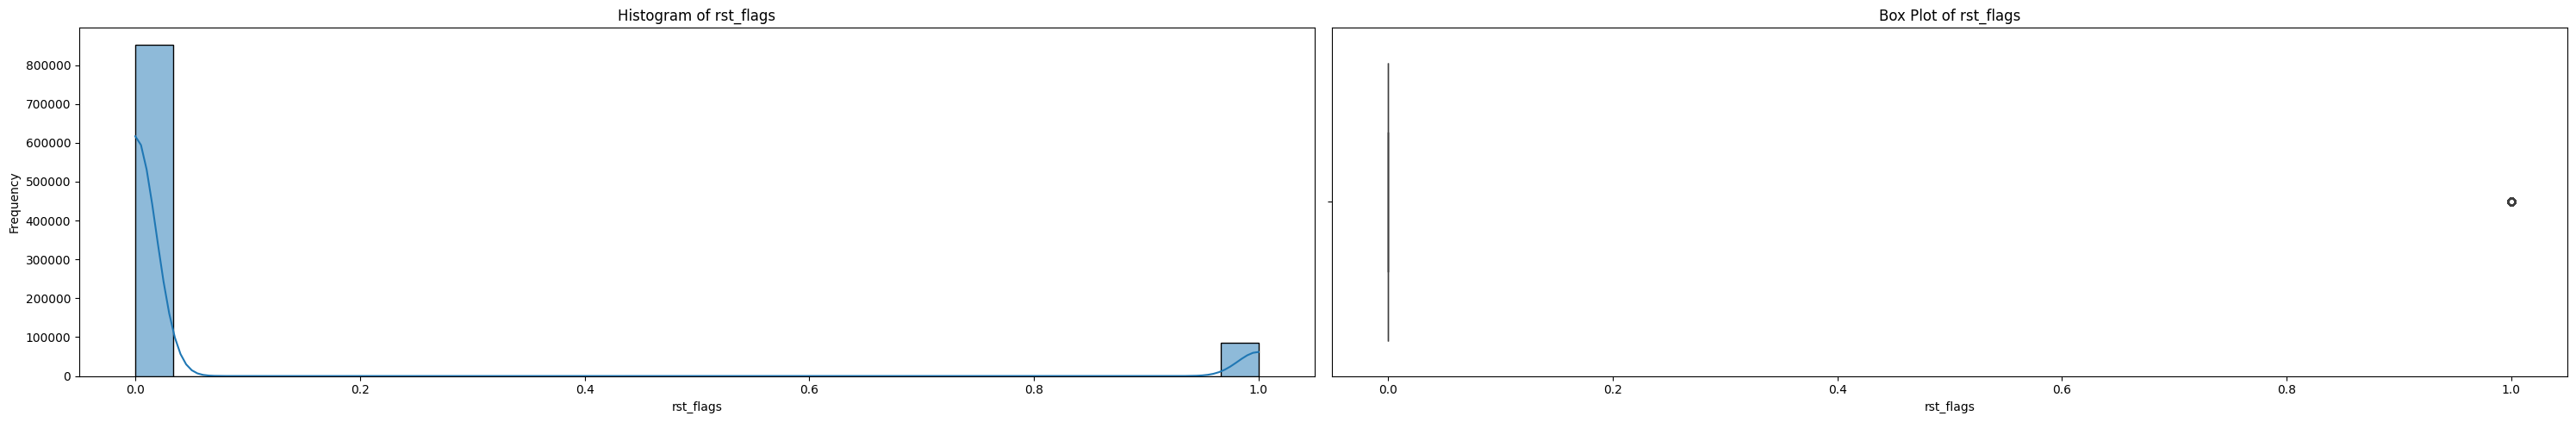

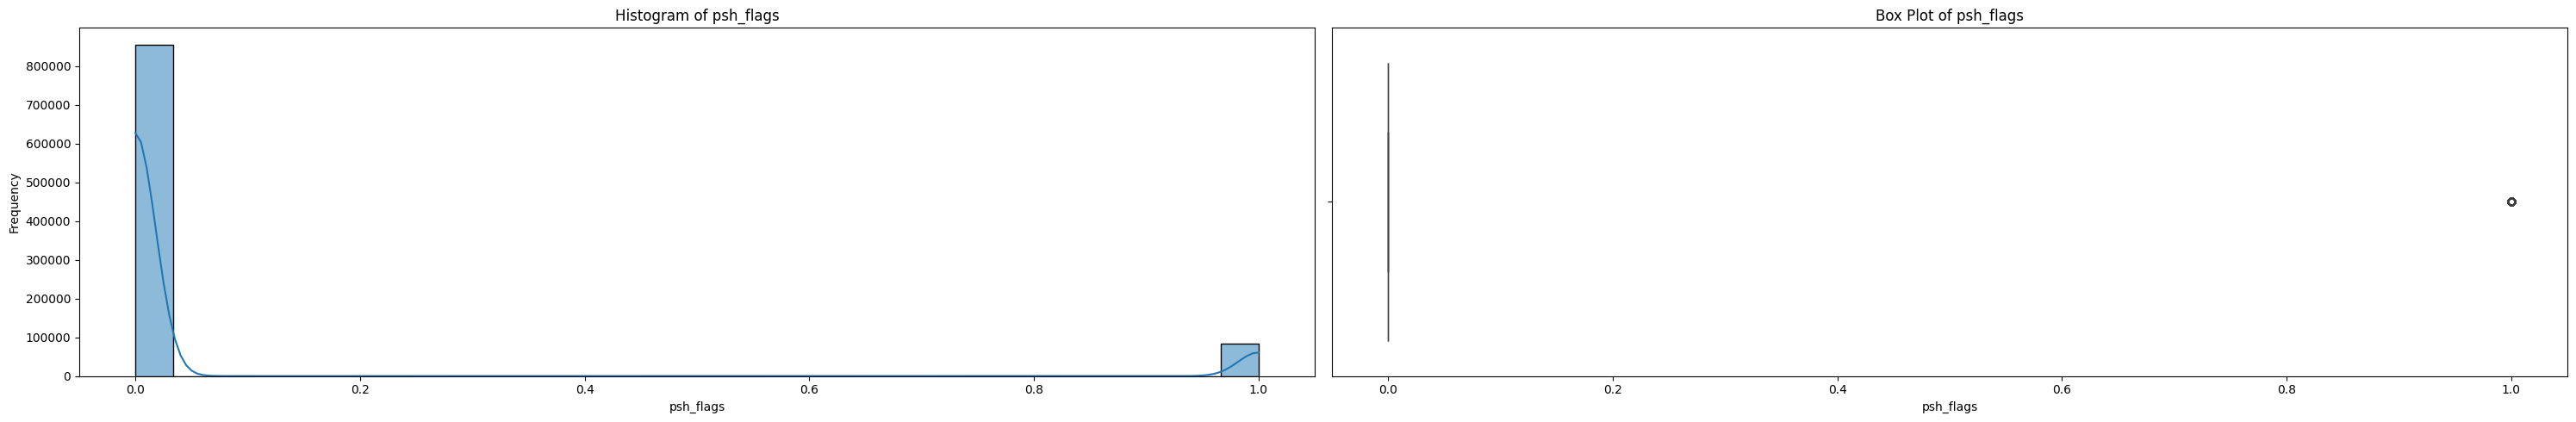

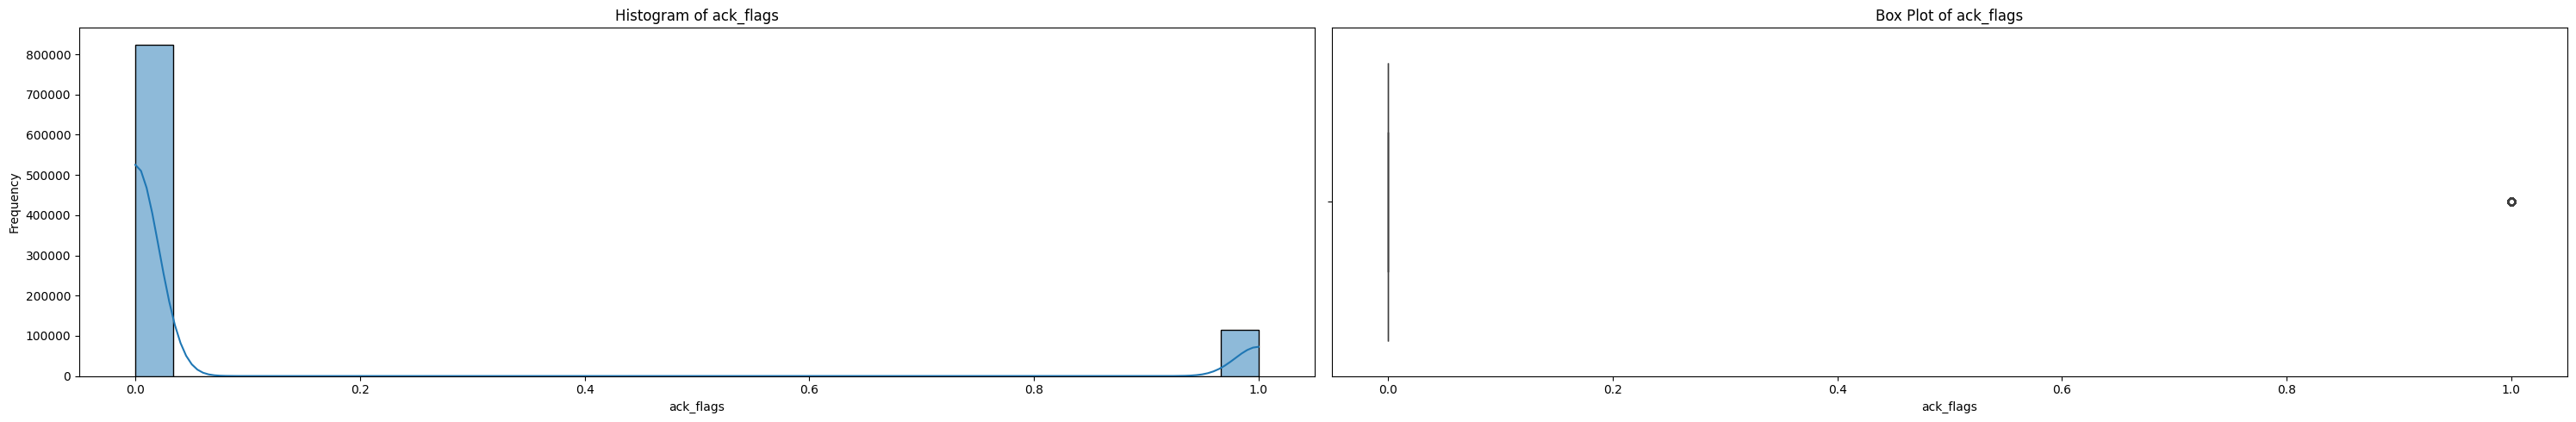

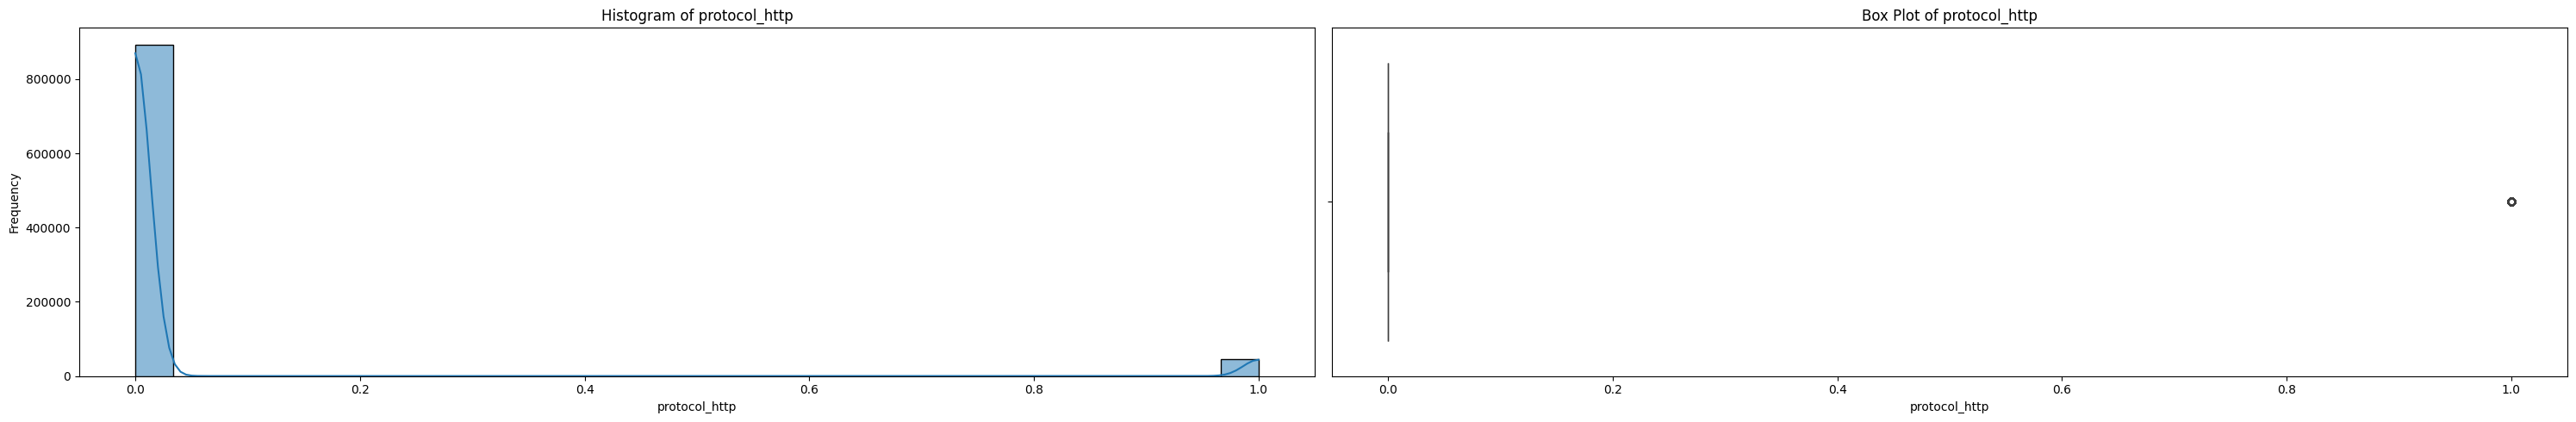

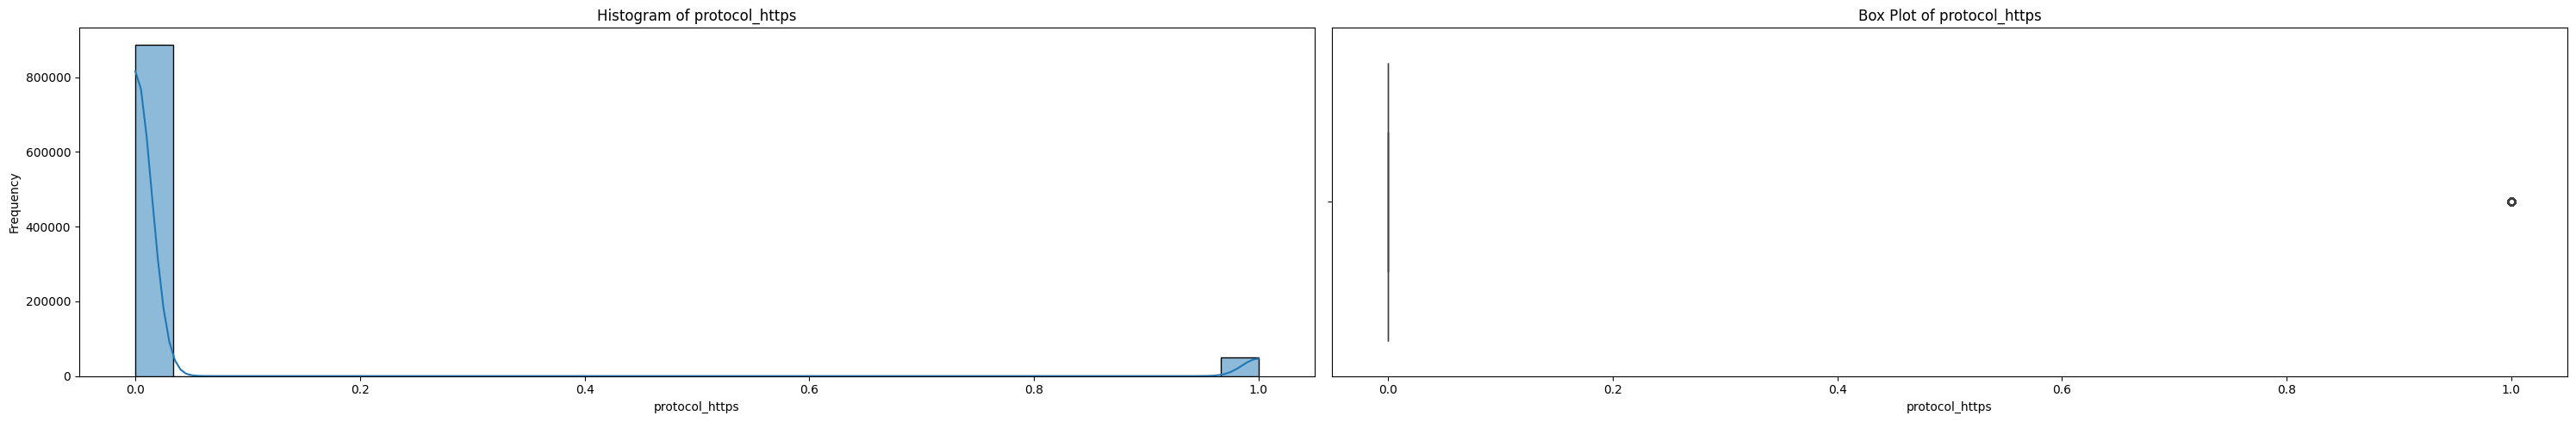

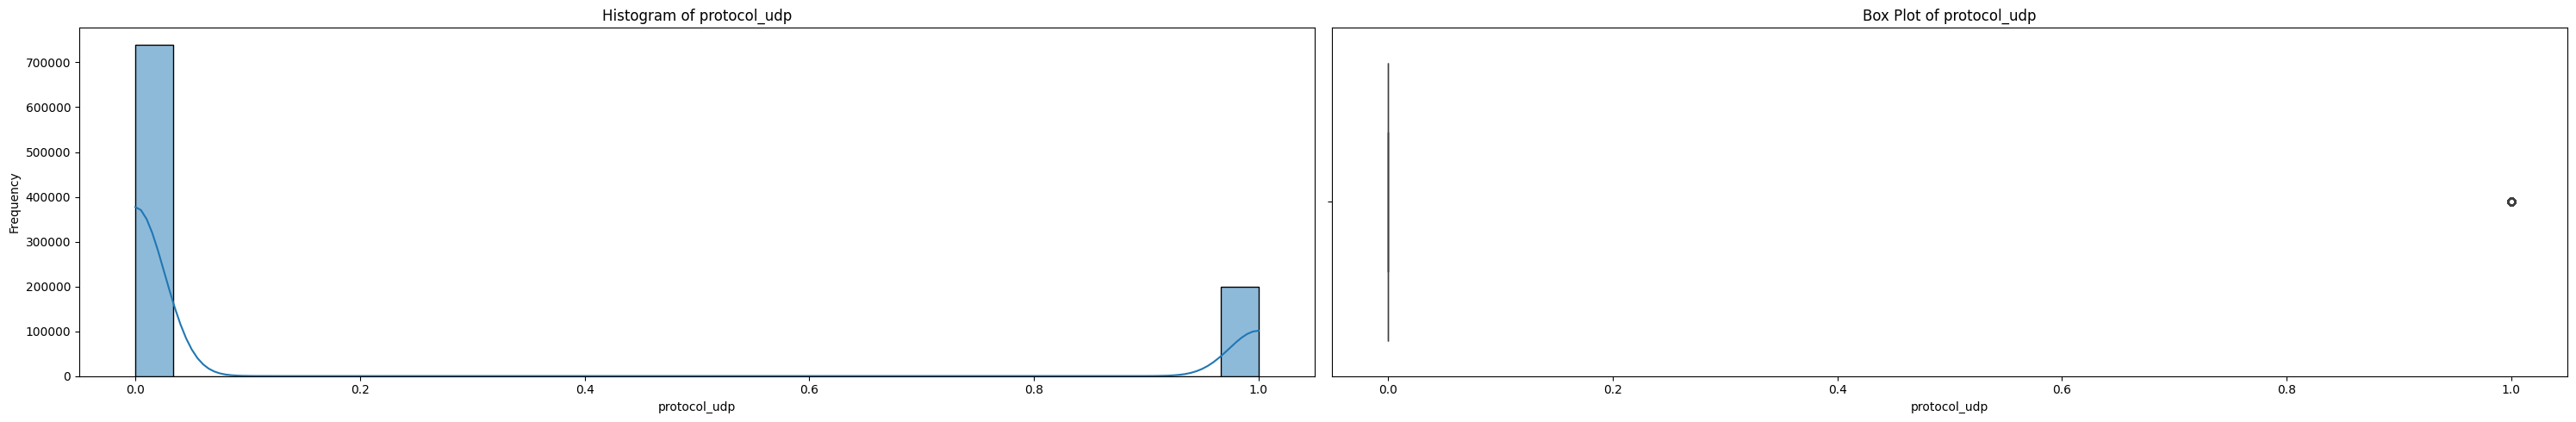

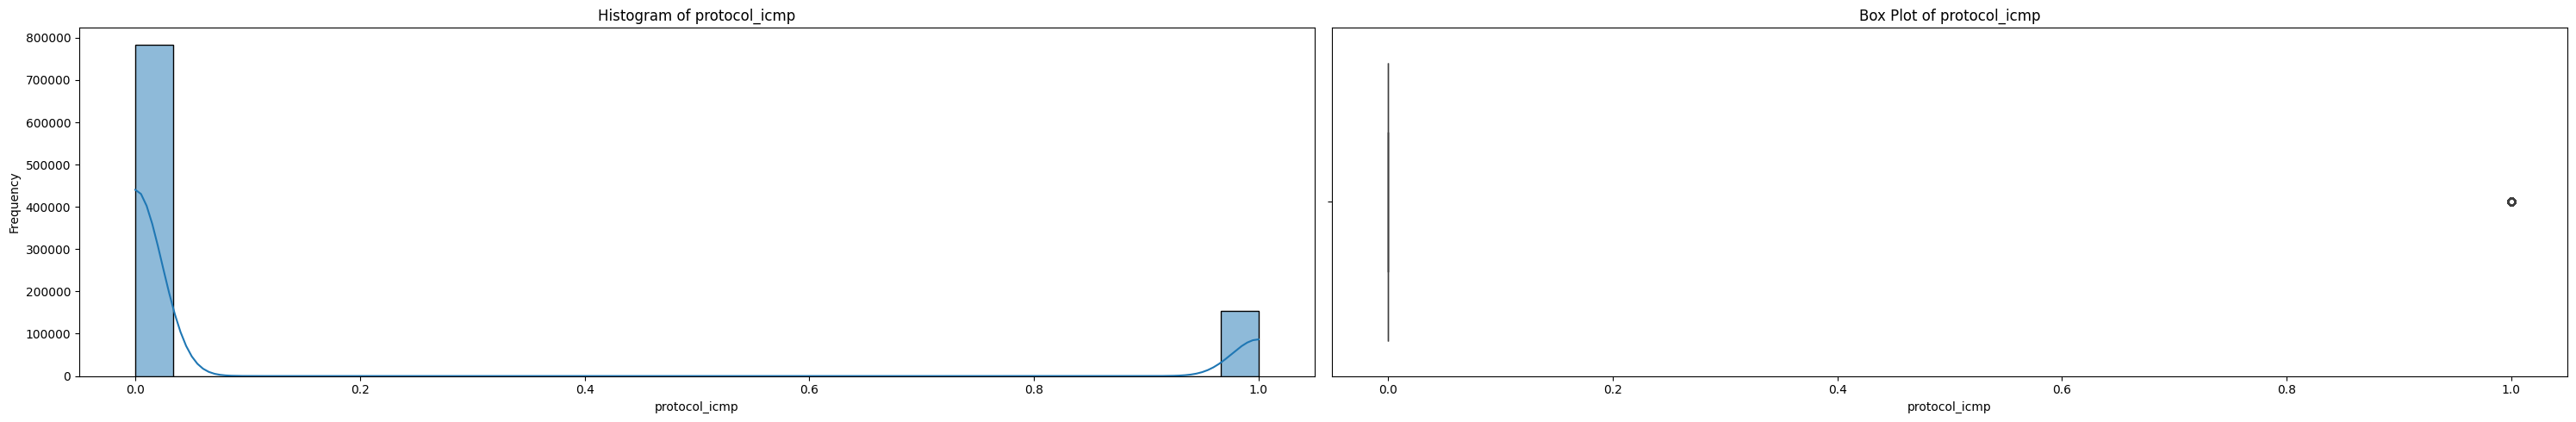

In [41]:
# visualize outlier columns before handling outliers (Histograms and Box Plots)

import matplotlib.pyplot as plt
import seaborn as sns

def plot_distributions(df, cols):
    for col in cols:
        plt.figure(figsize=(30, 5))

        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col}')

        plt.tight_layout()
        plt.show()

plot_distributions(data, outlier_columns)

In [42]:
#handle outliers using winsorization algorithm

def handle_outliers(data, outlier_columns, iqr_multiplier=1.5):
    for col in outlier_columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR

        data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

    return data

data = handle_outliers(data, outlier_columns)

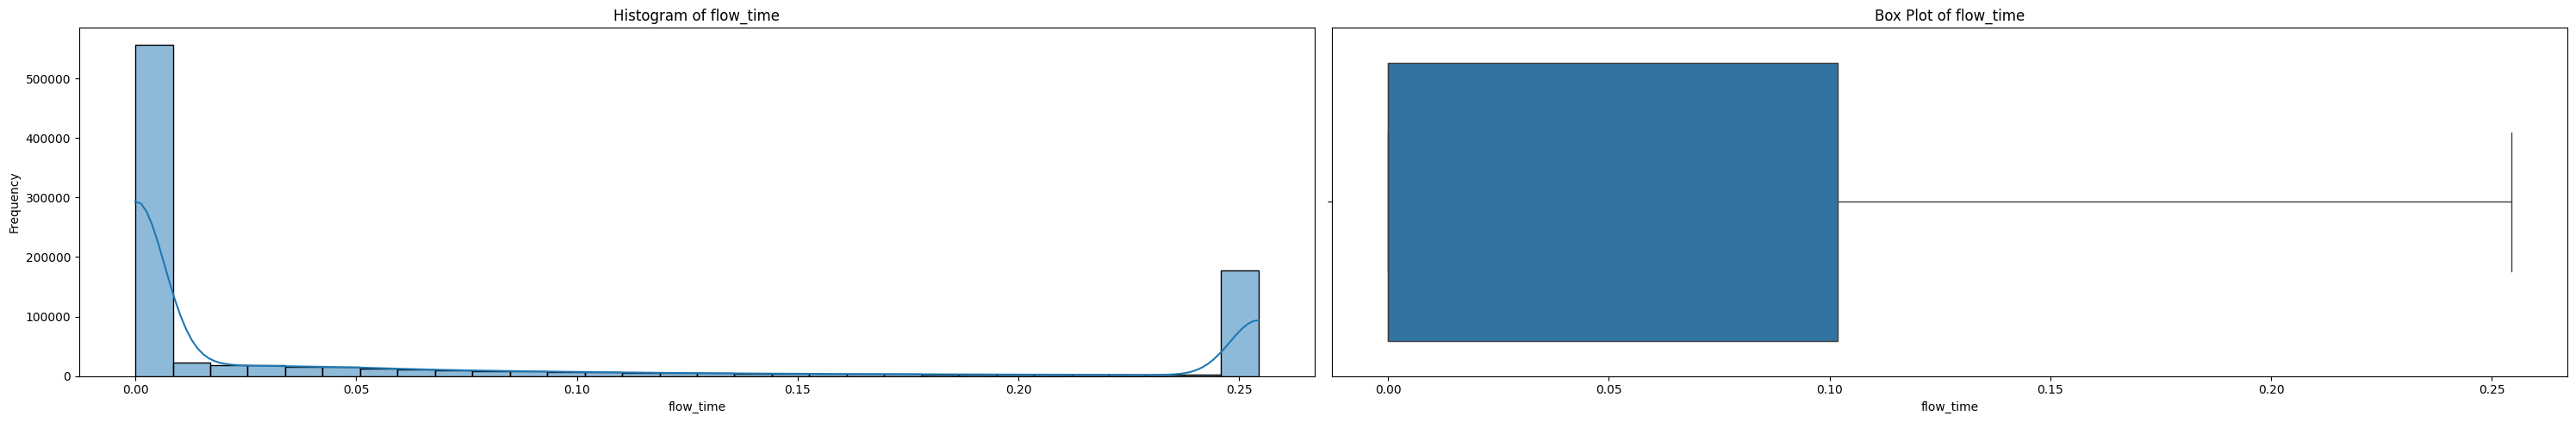

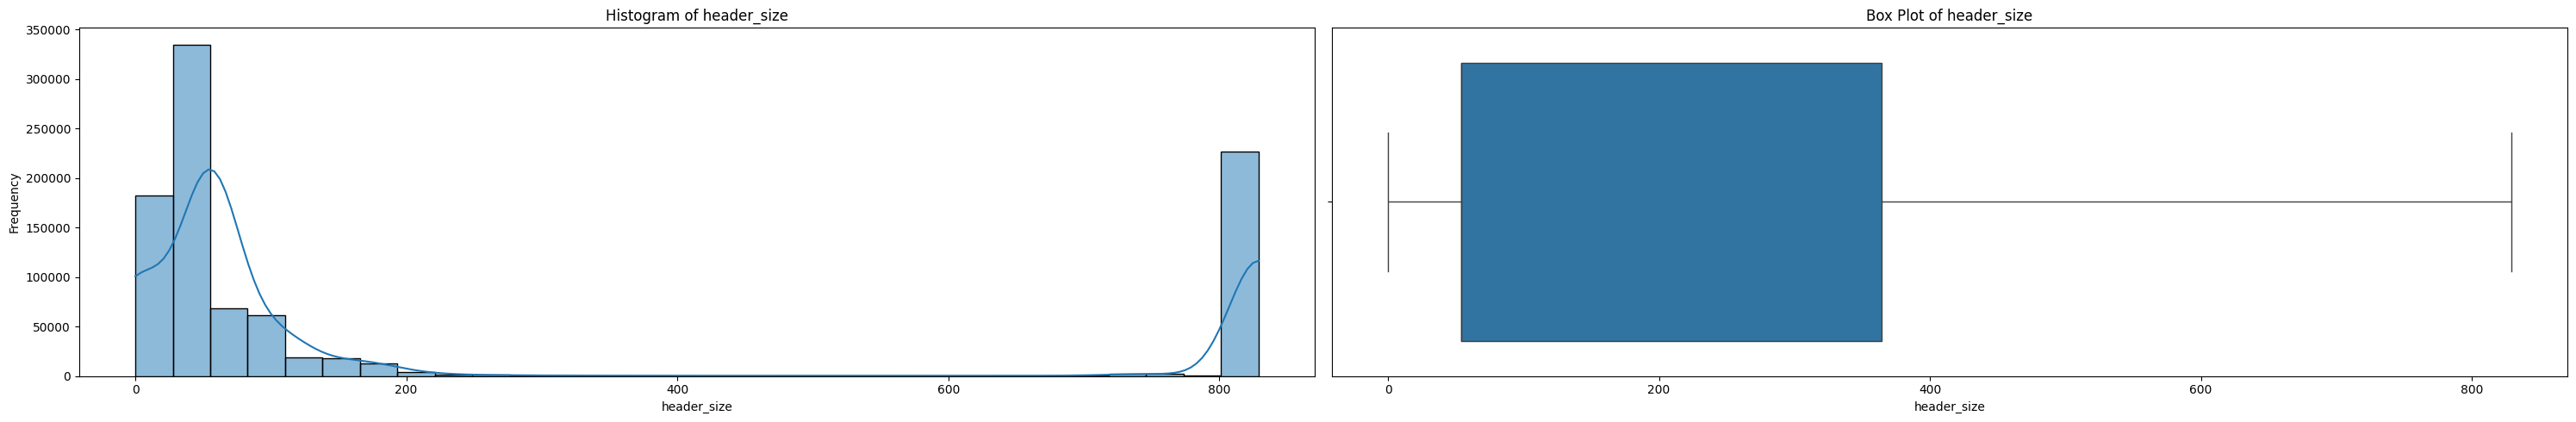

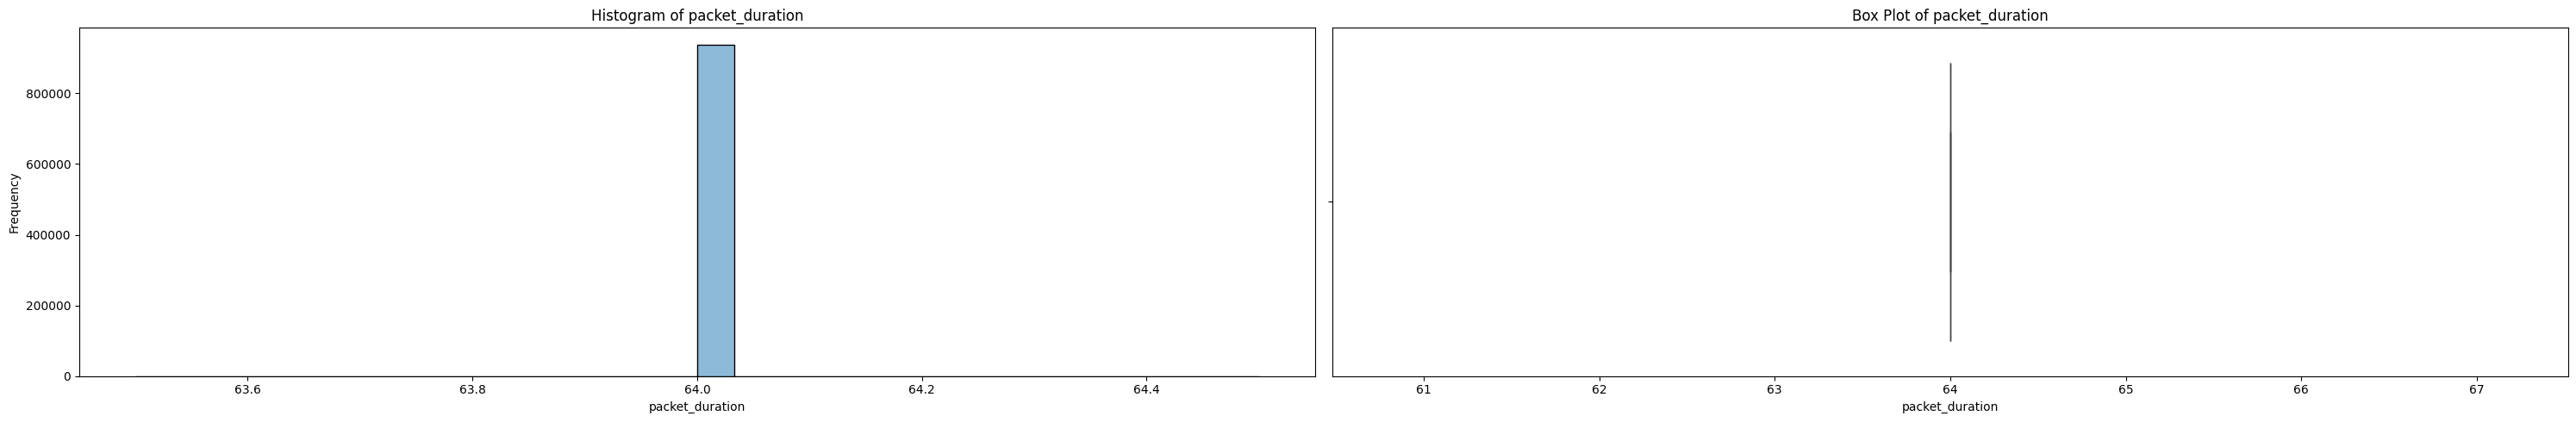

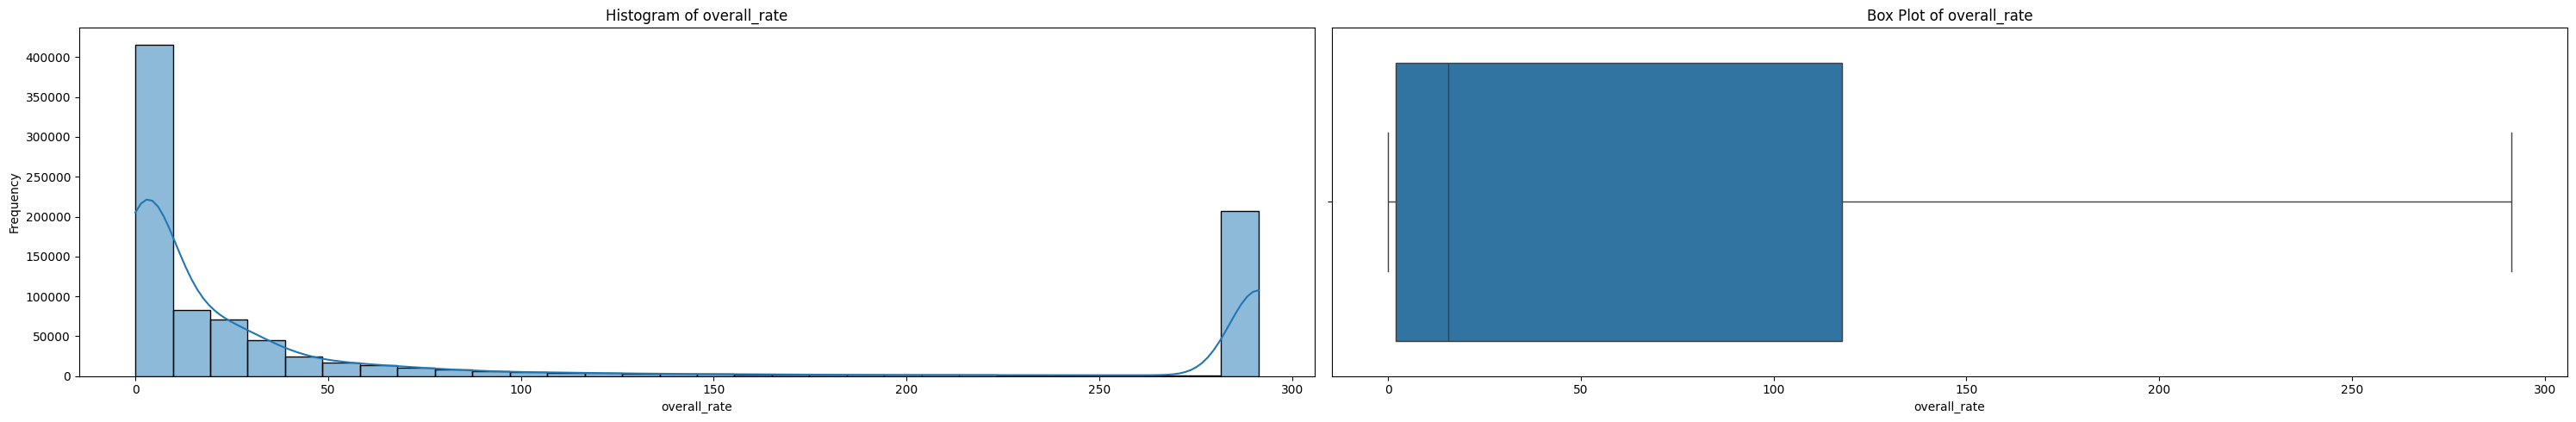

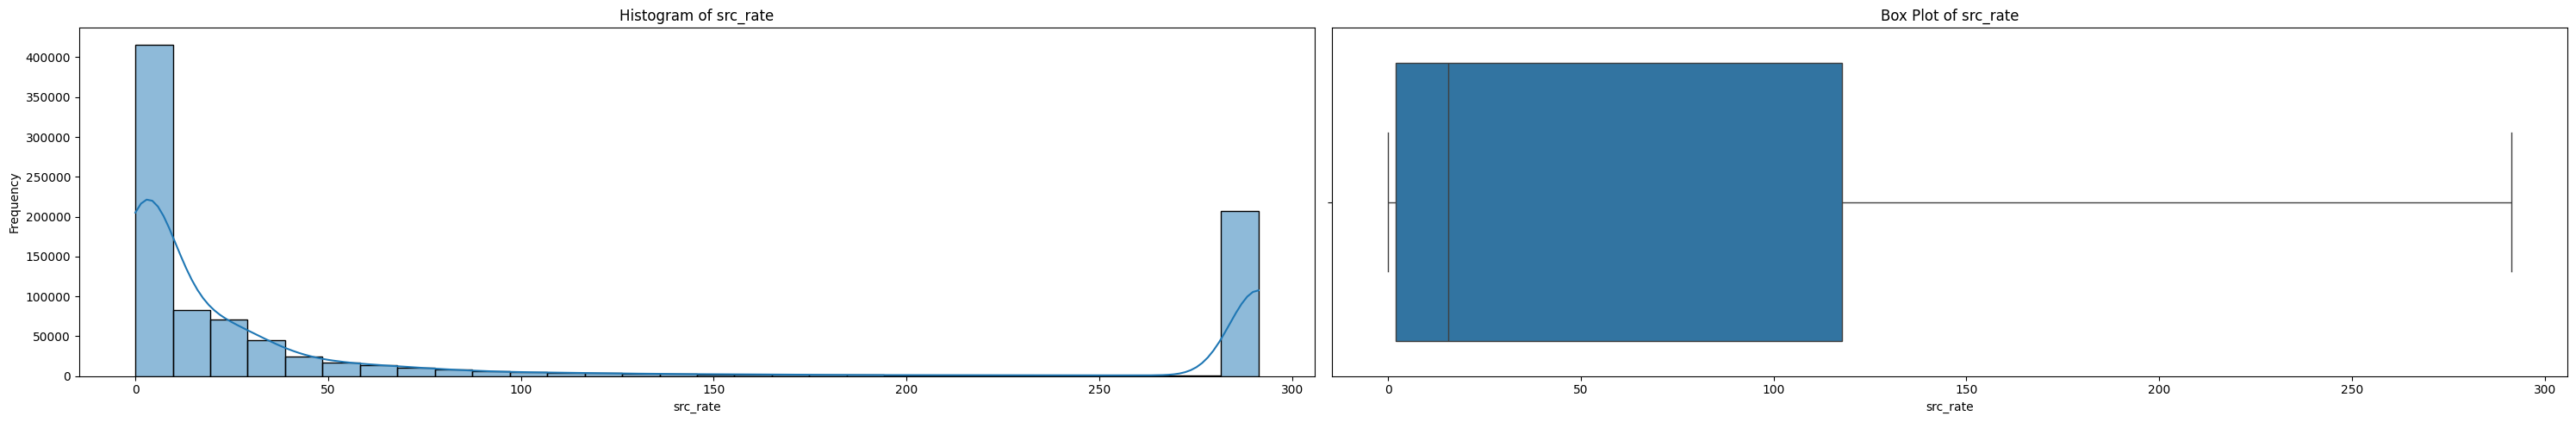

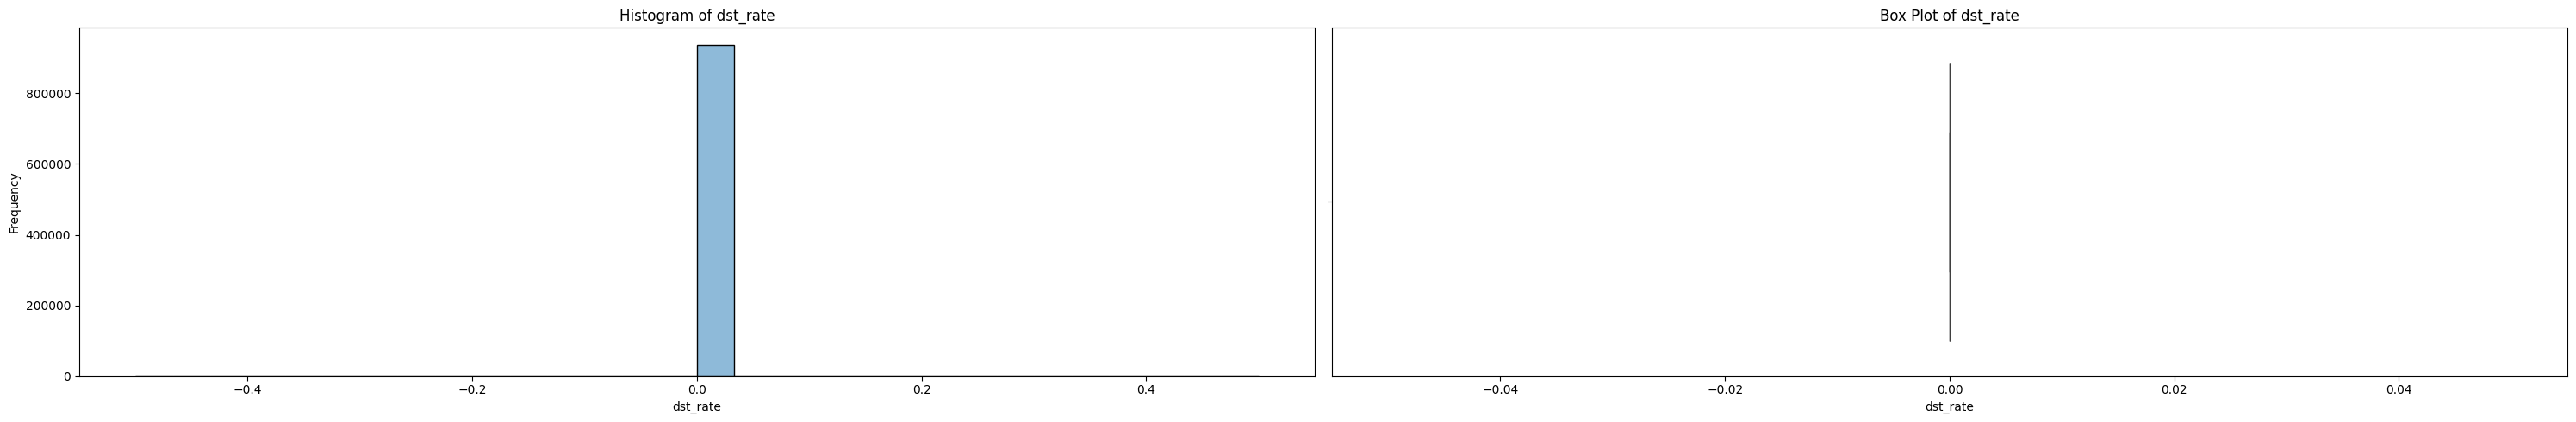

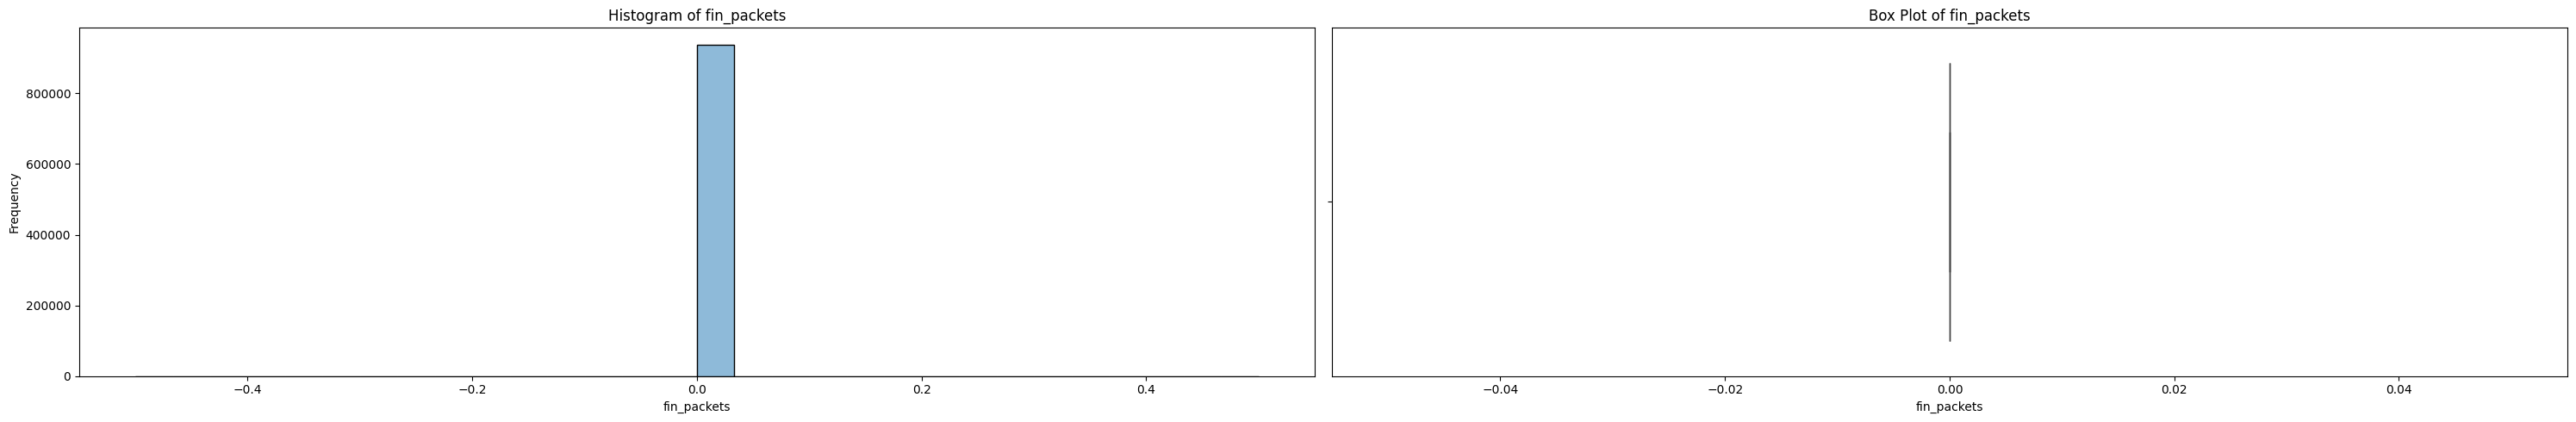

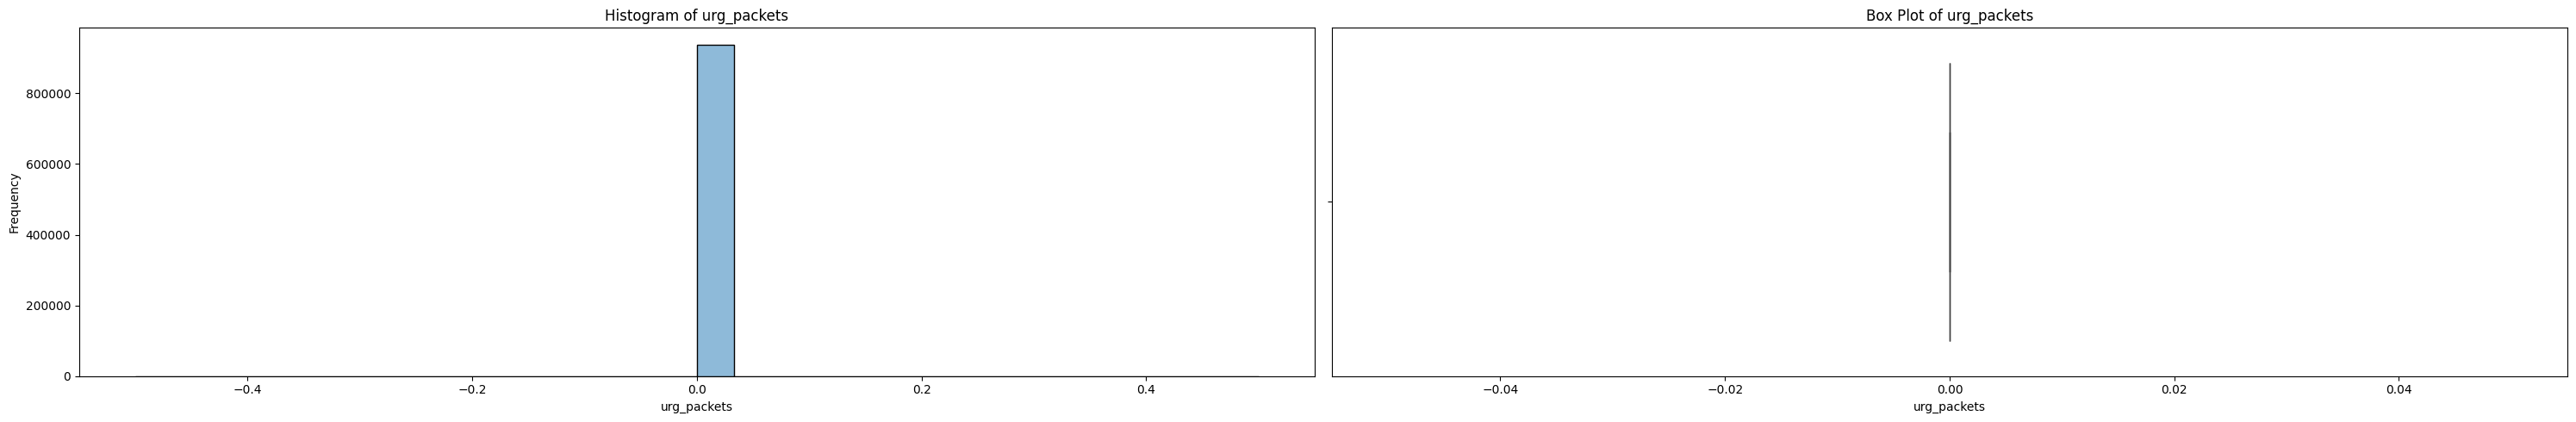

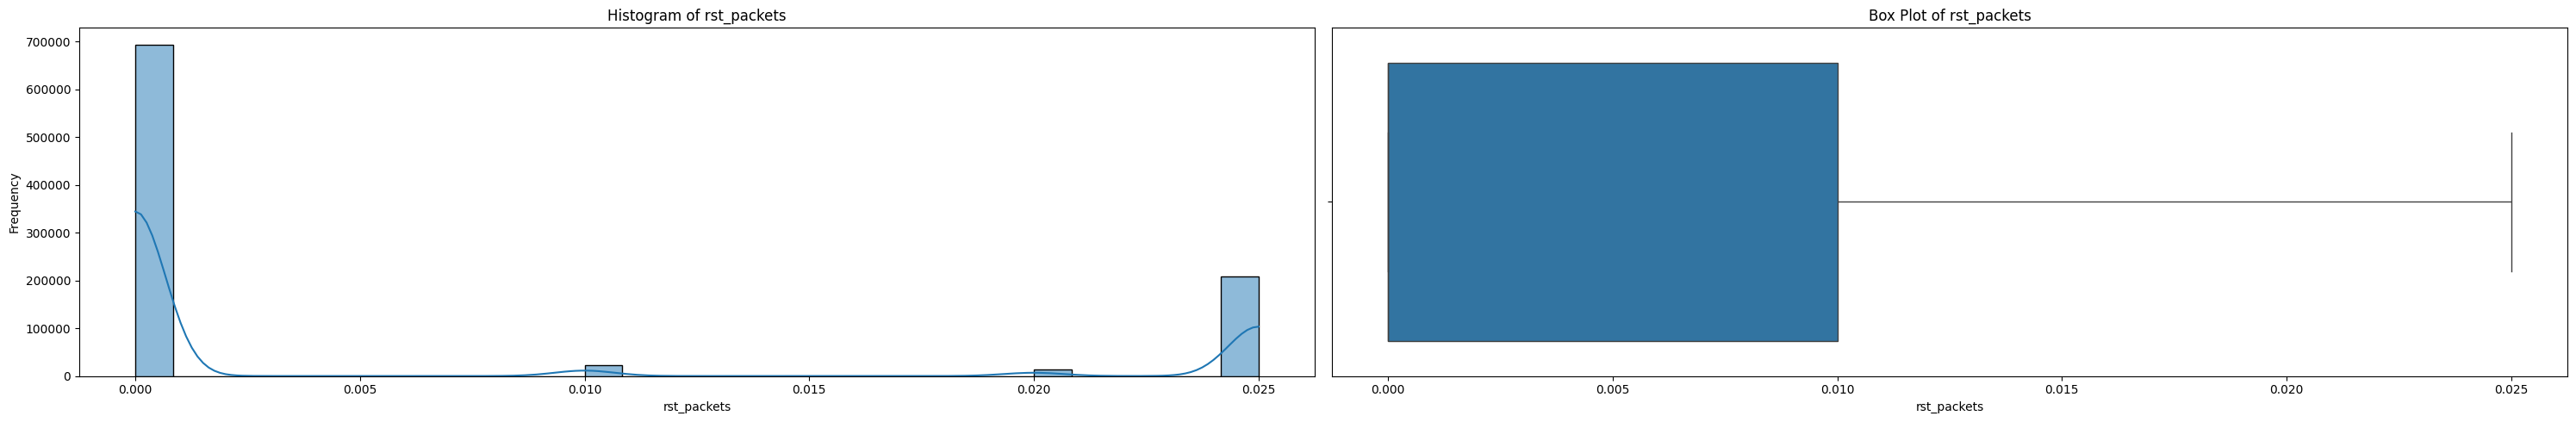

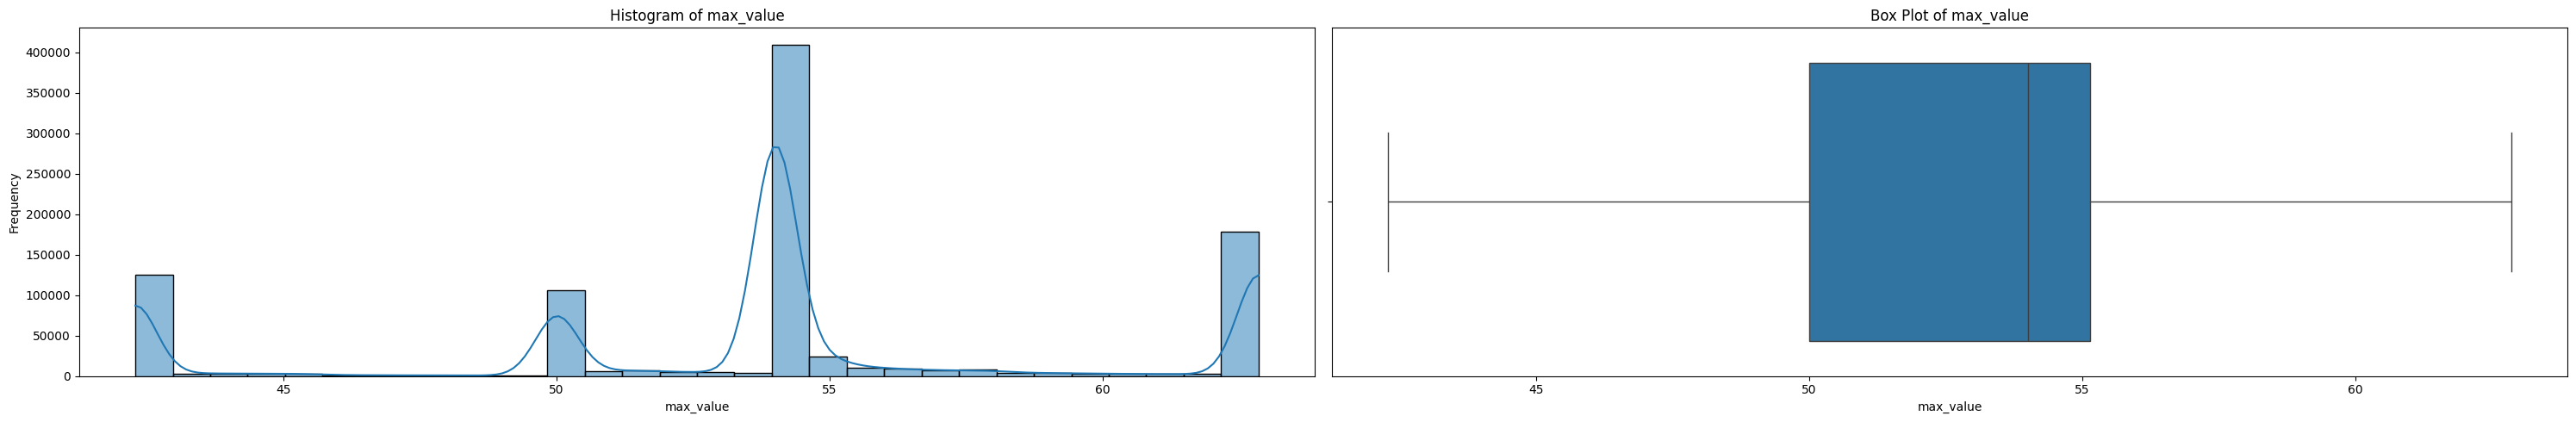

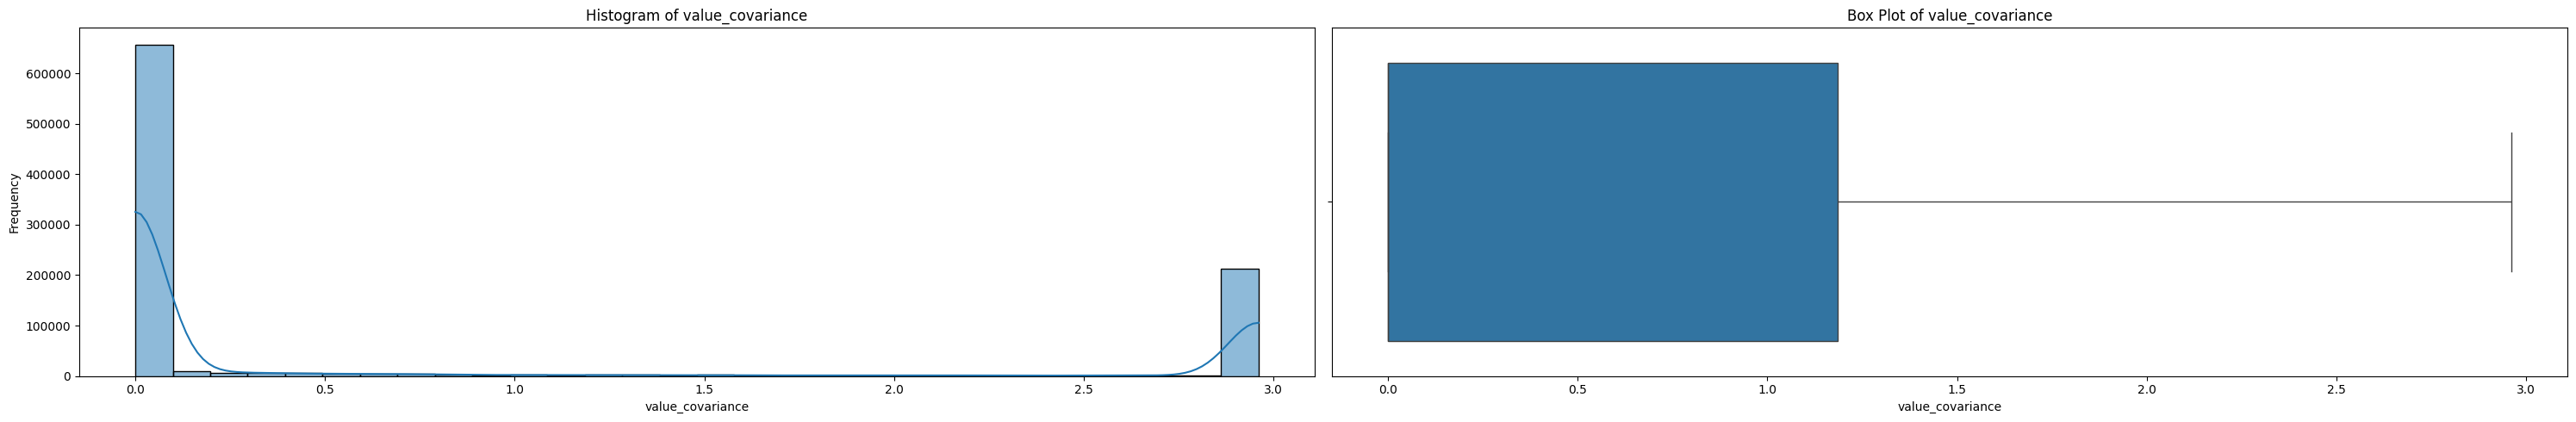

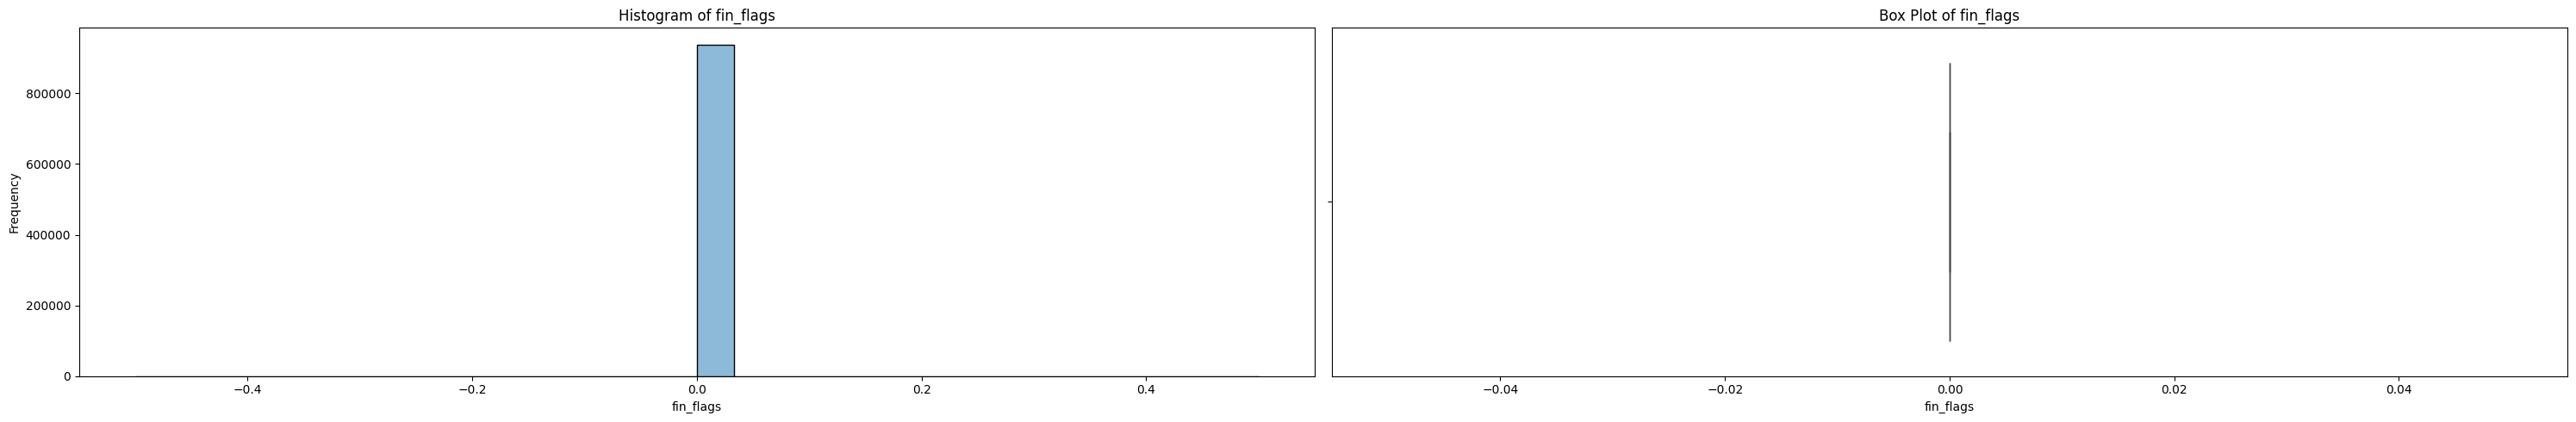

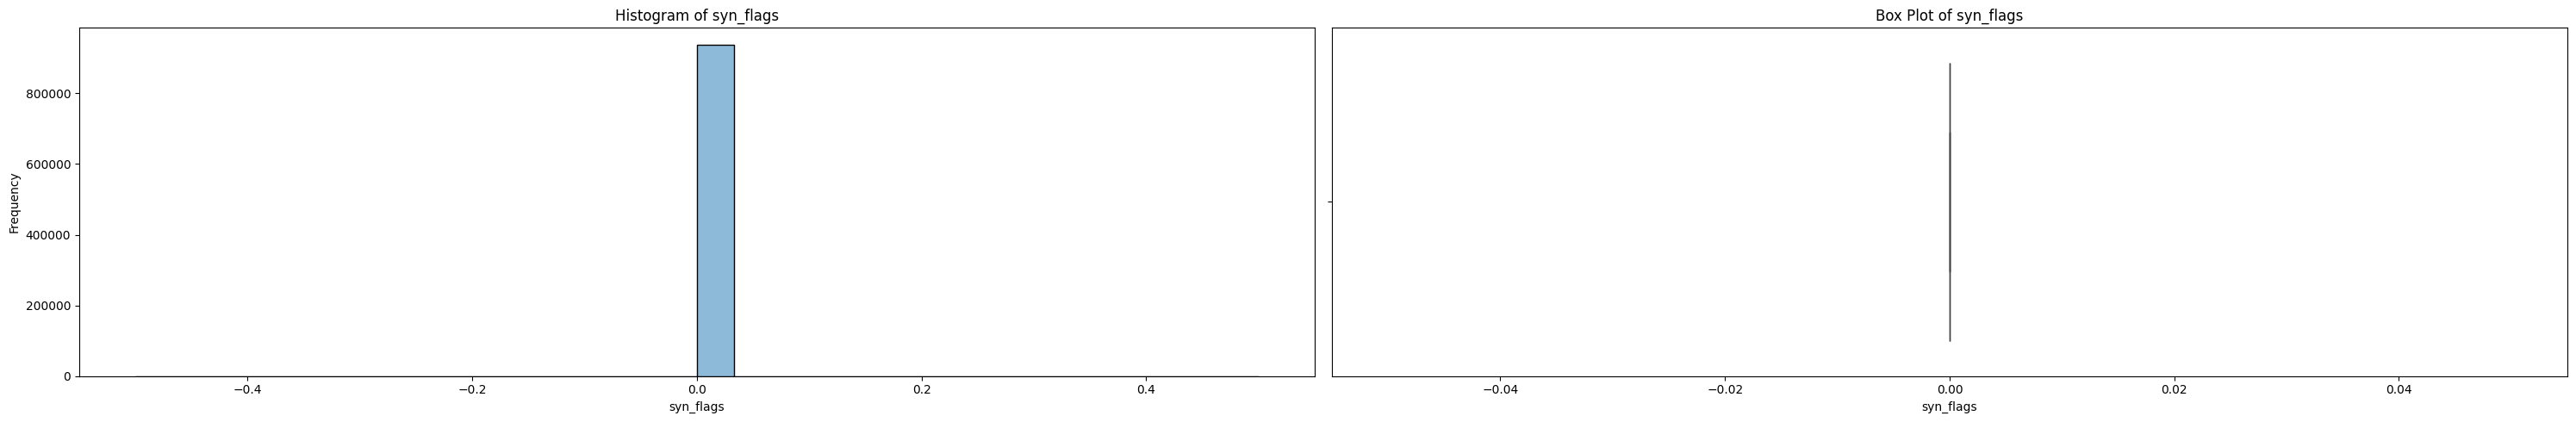

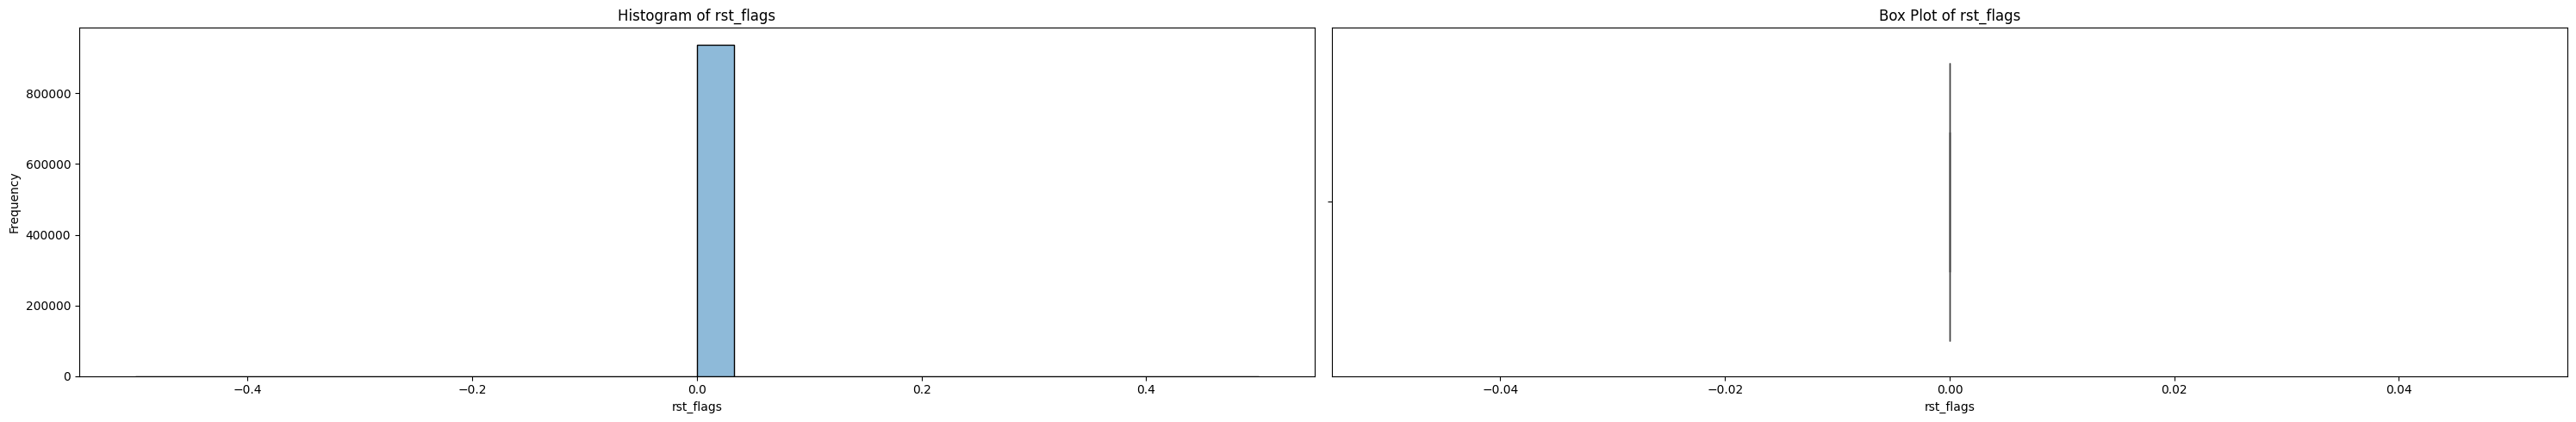

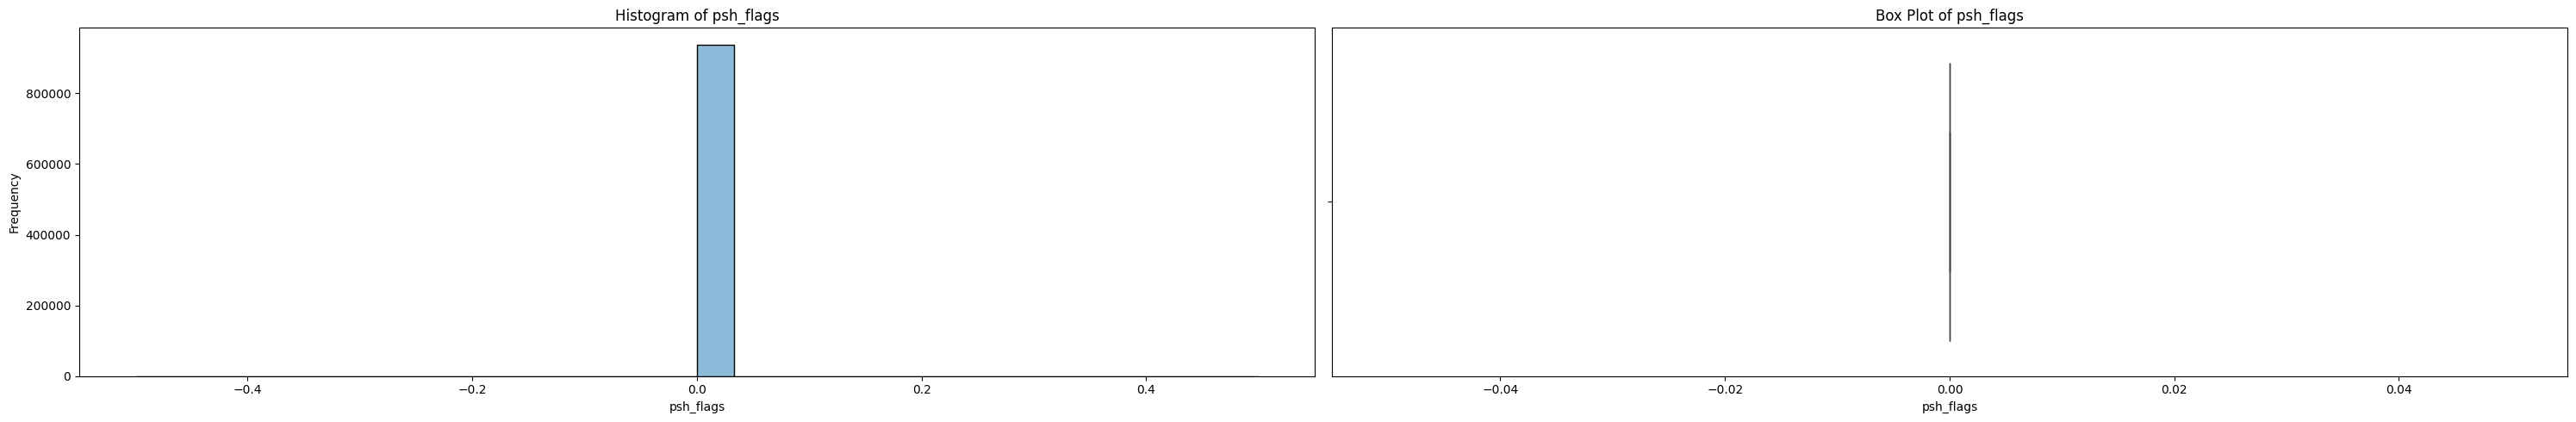

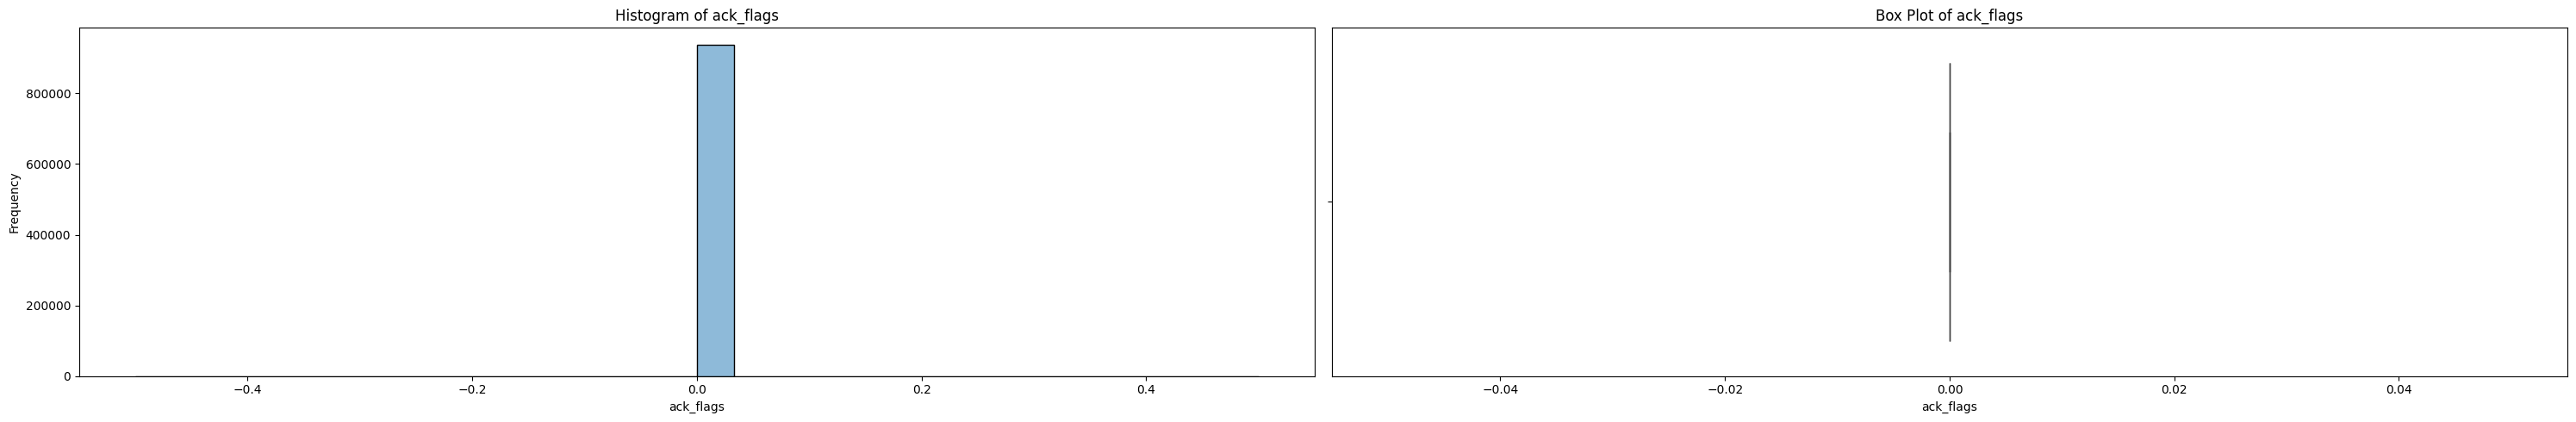

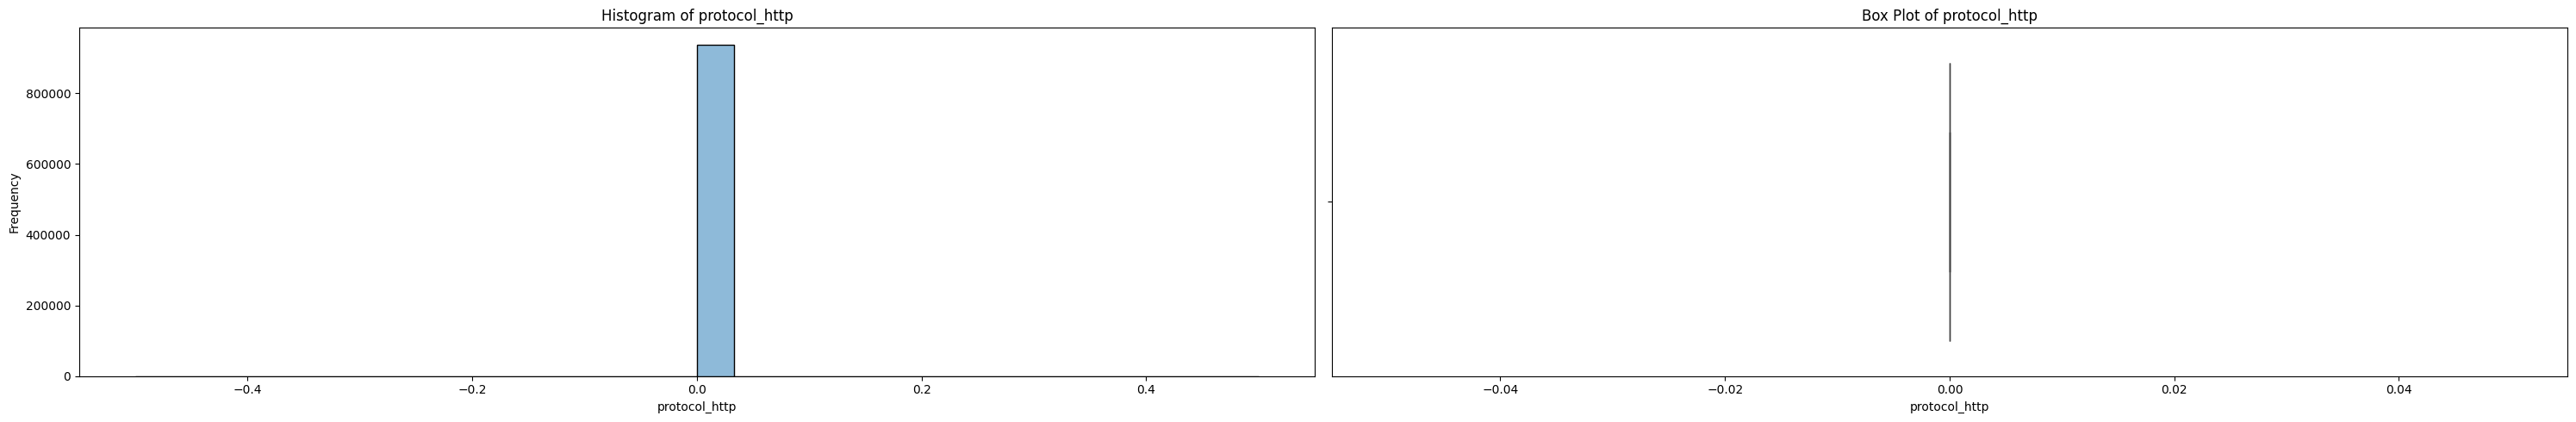

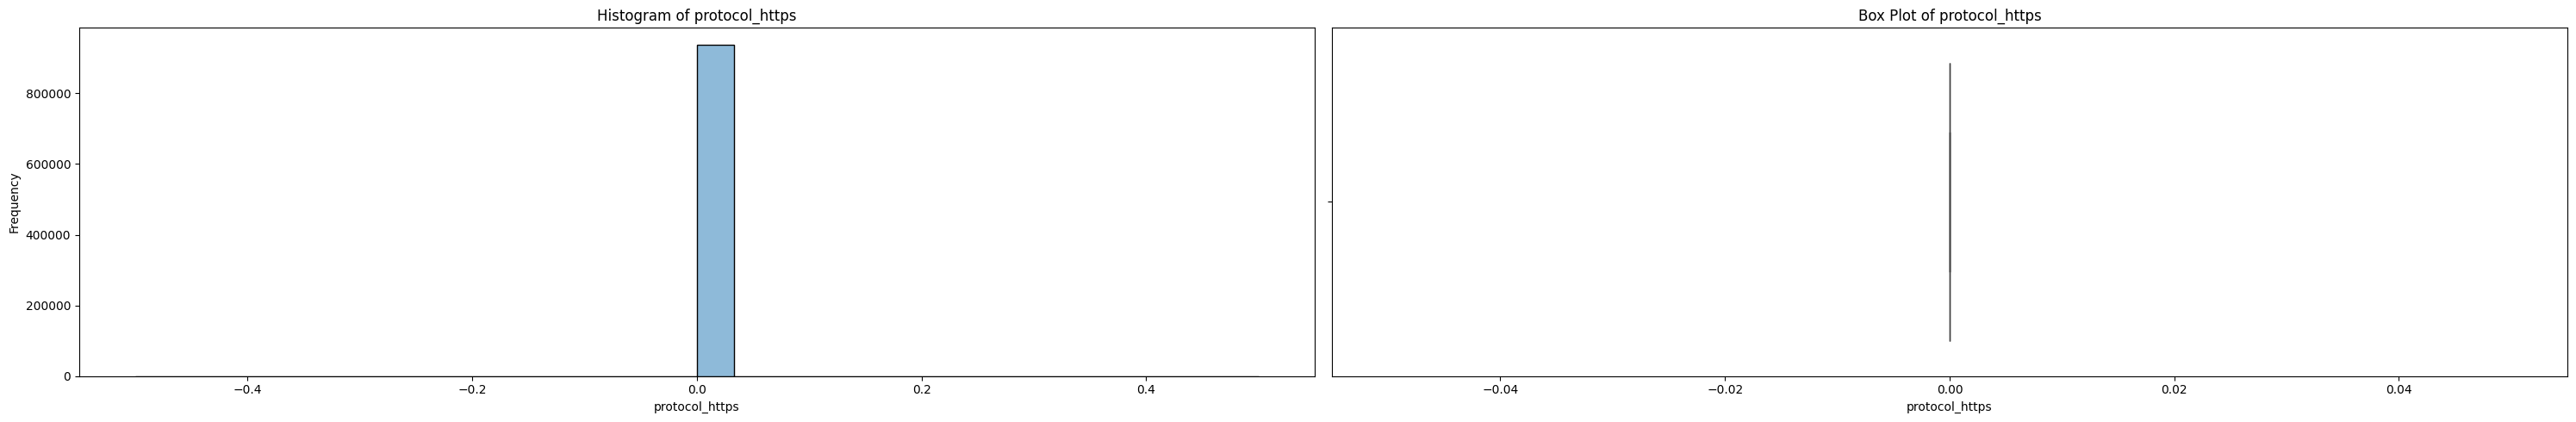

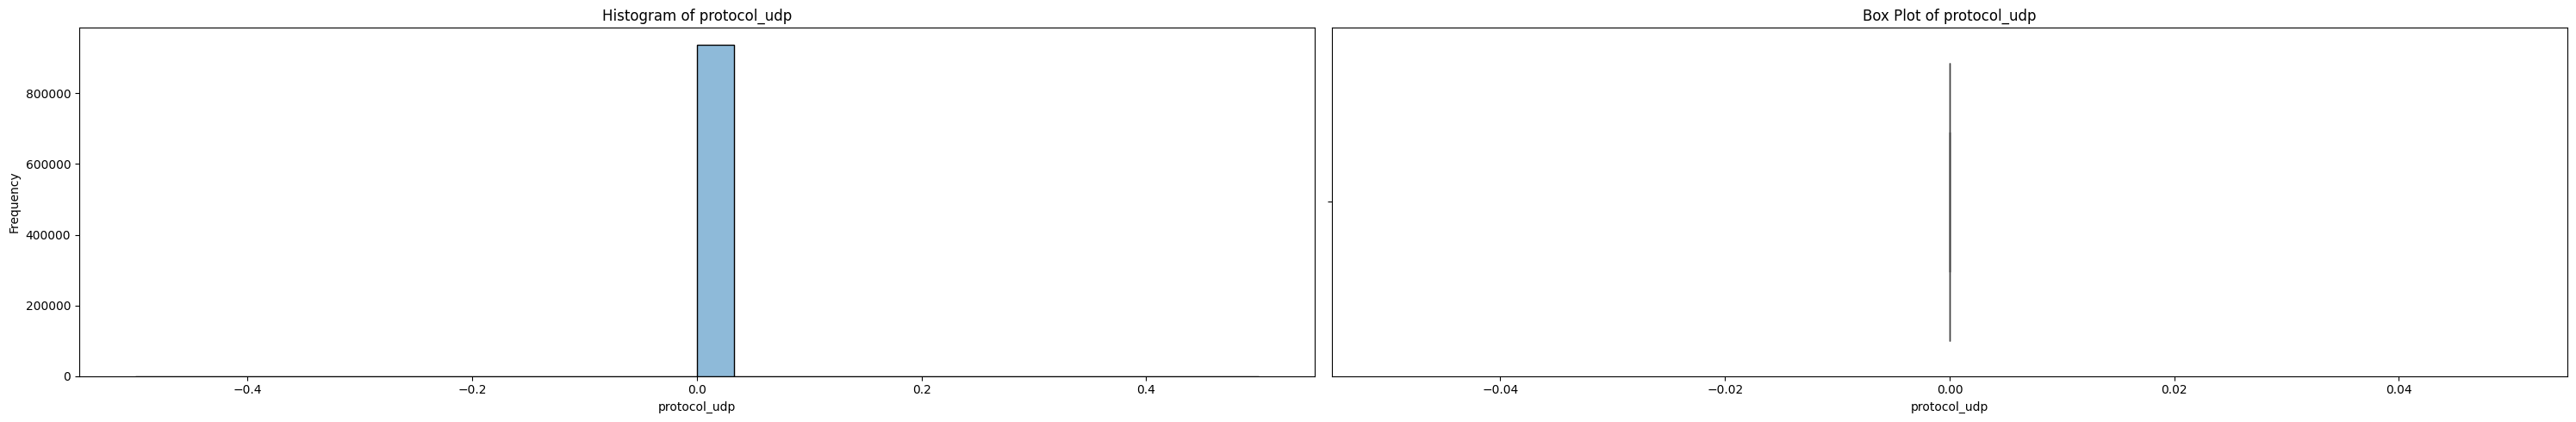

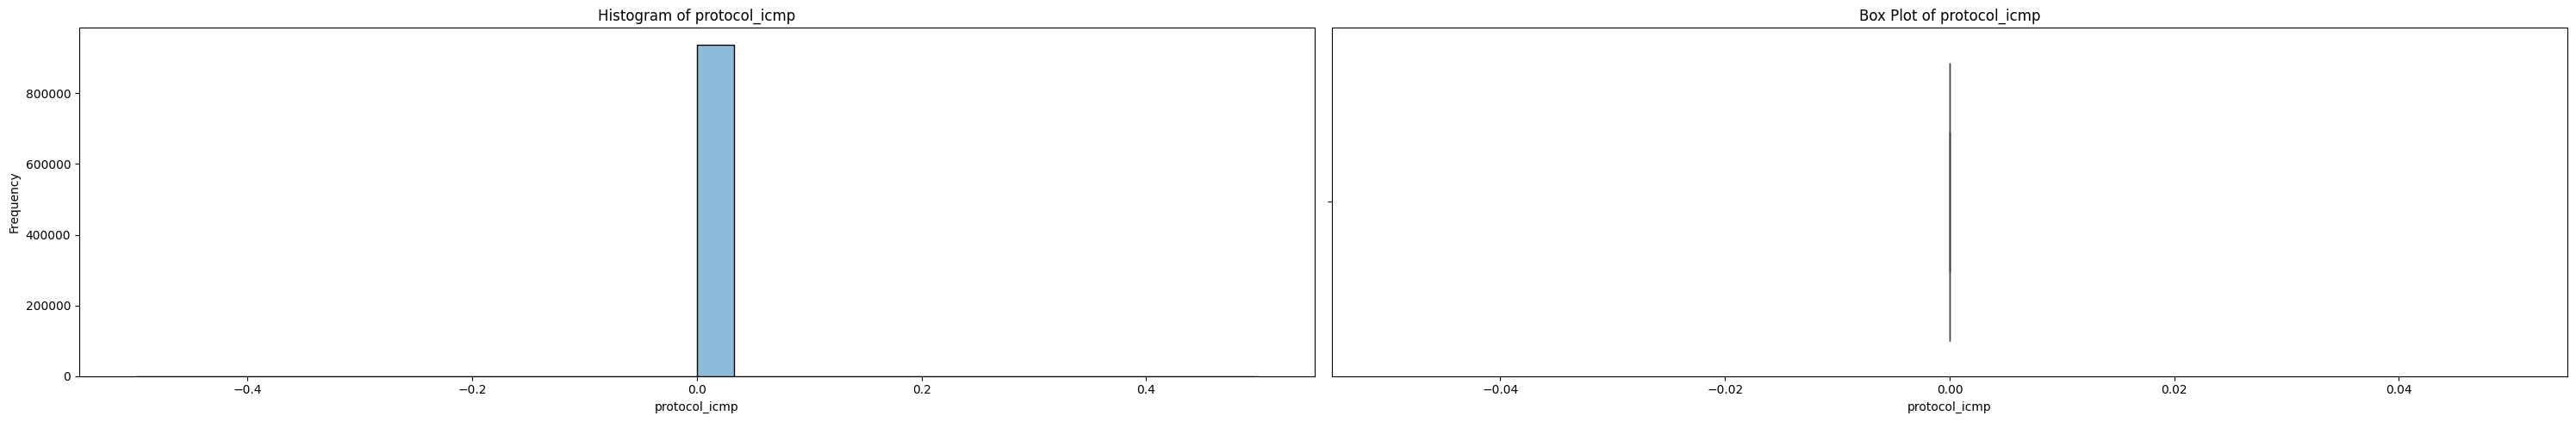

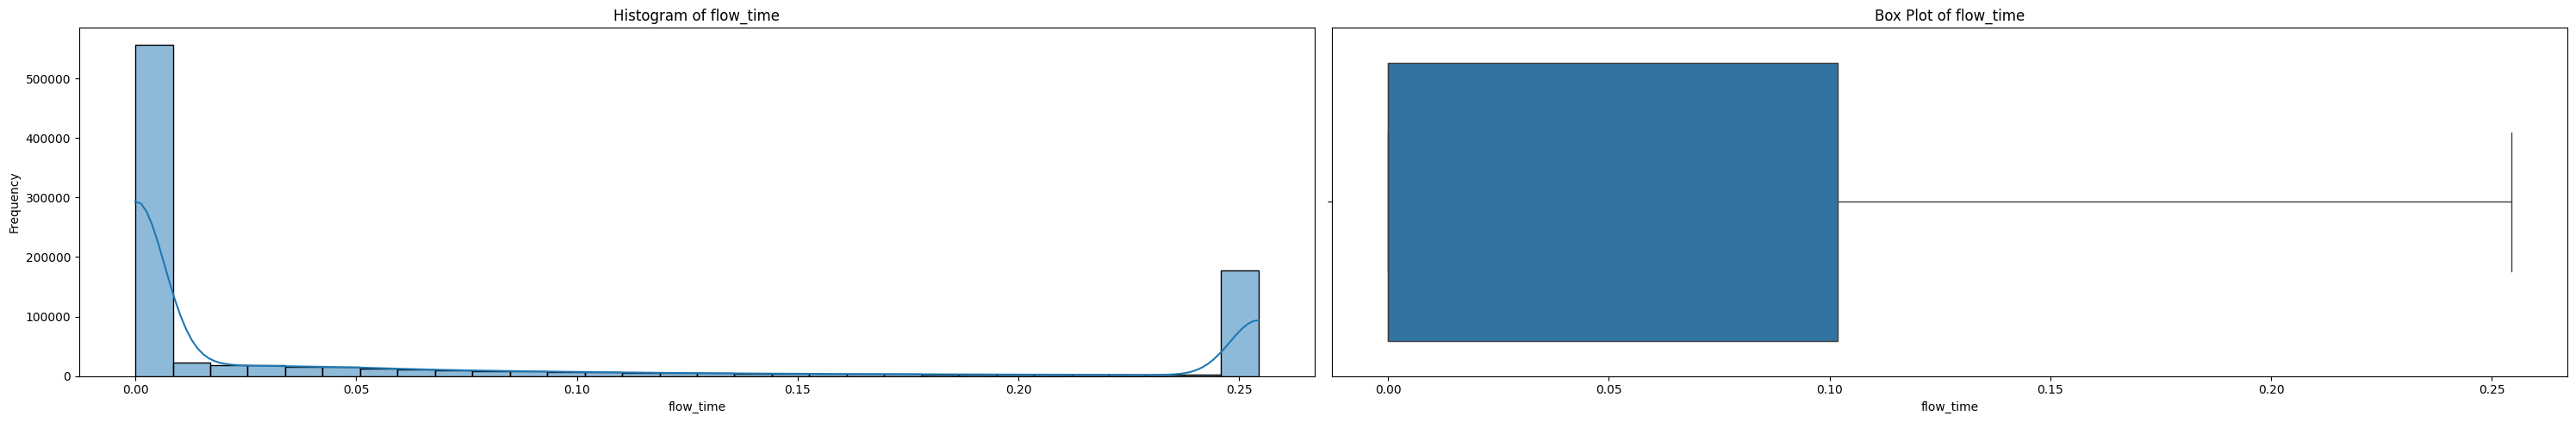

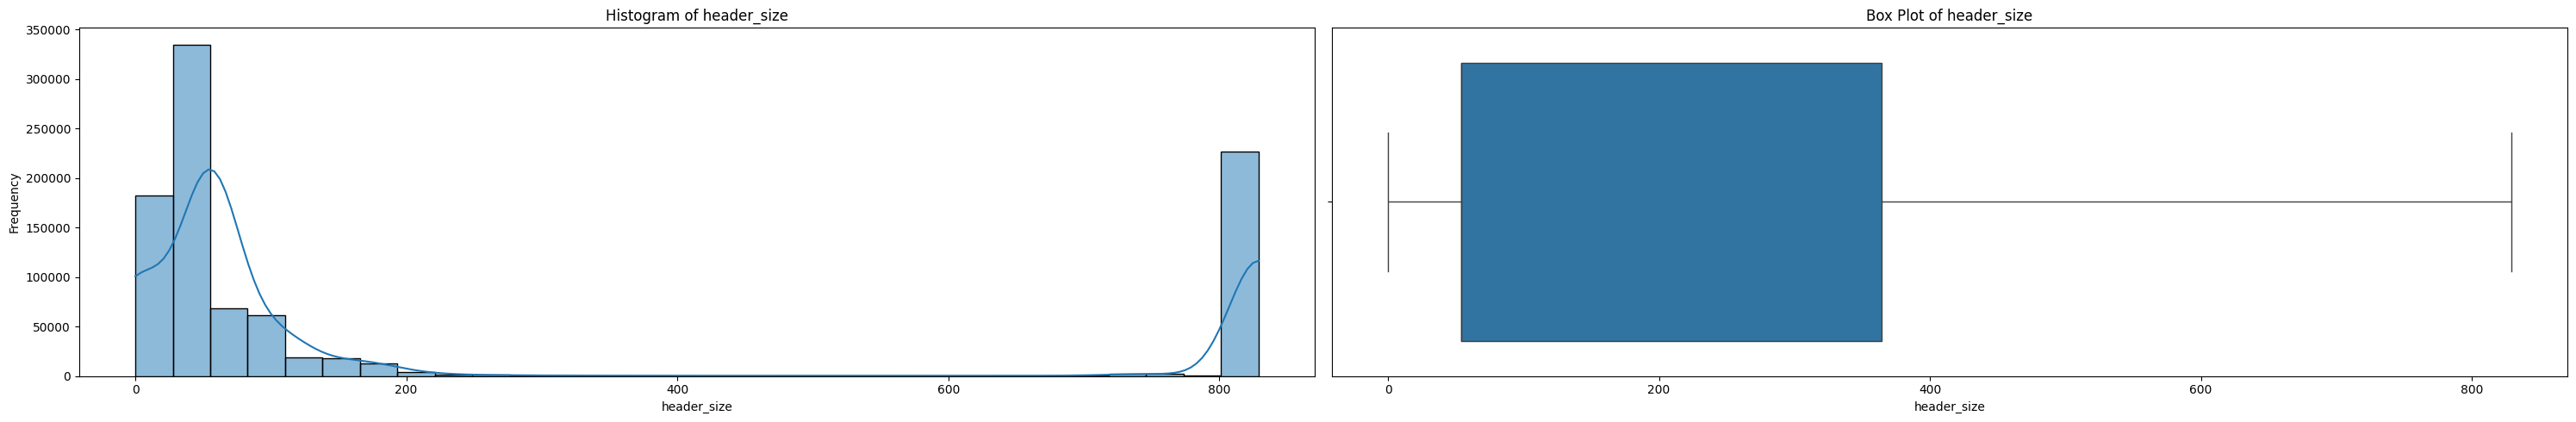

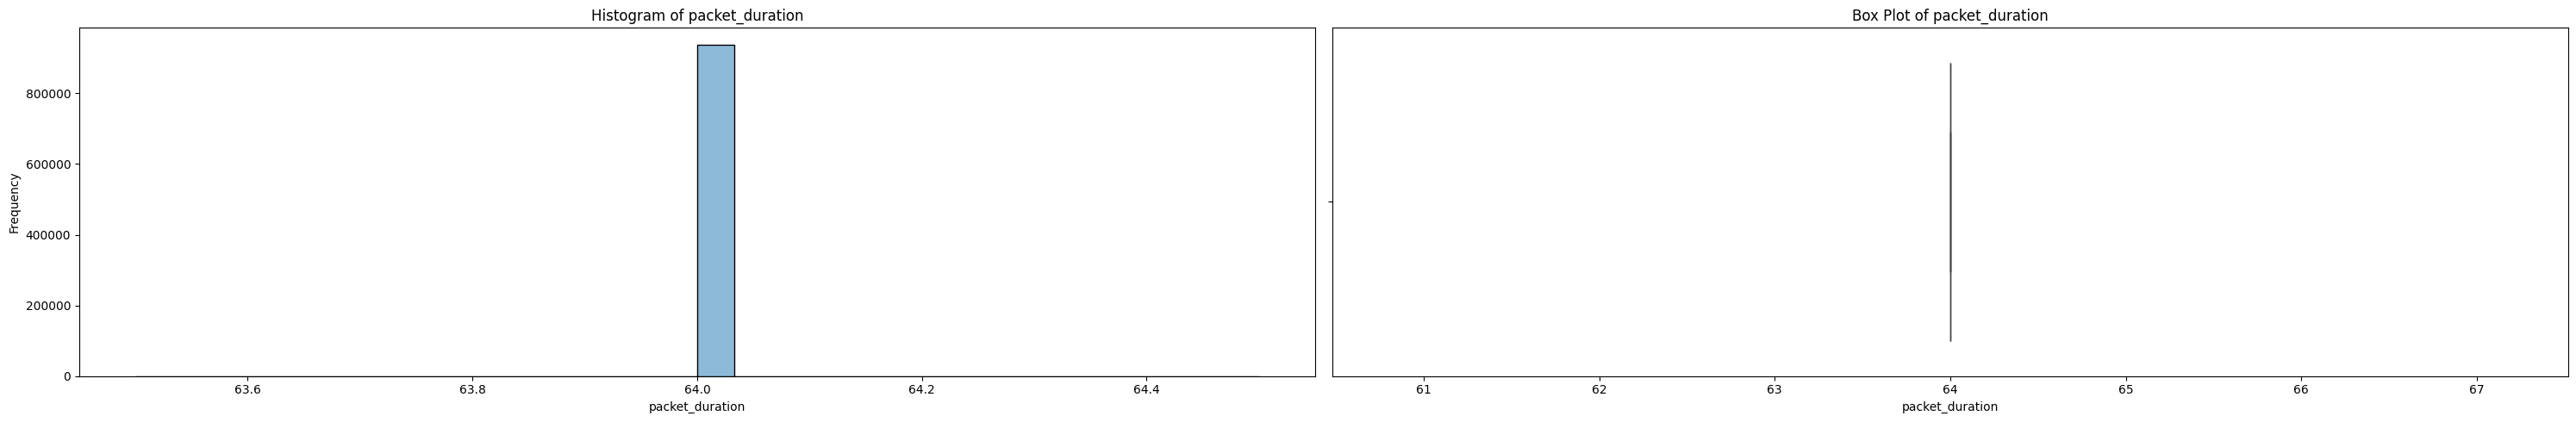

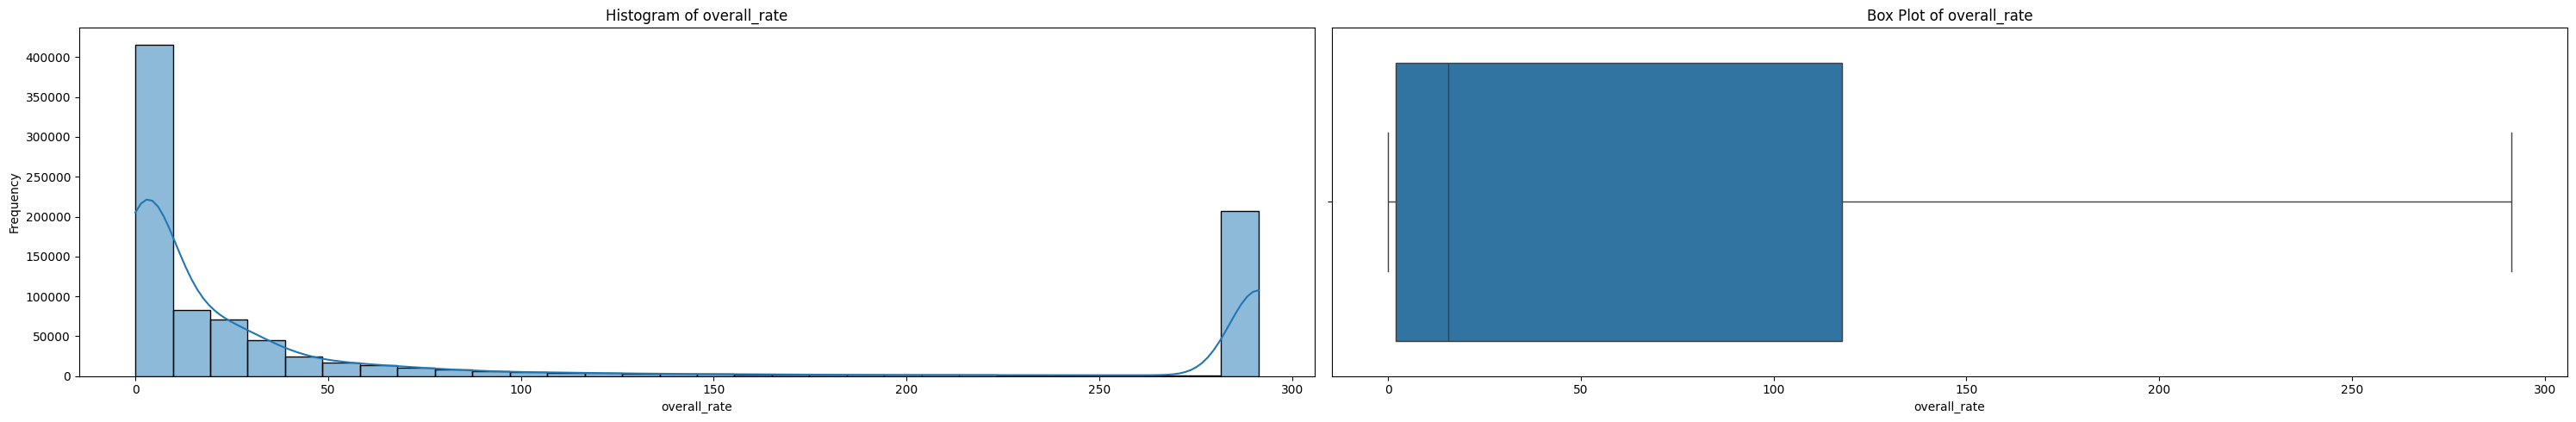

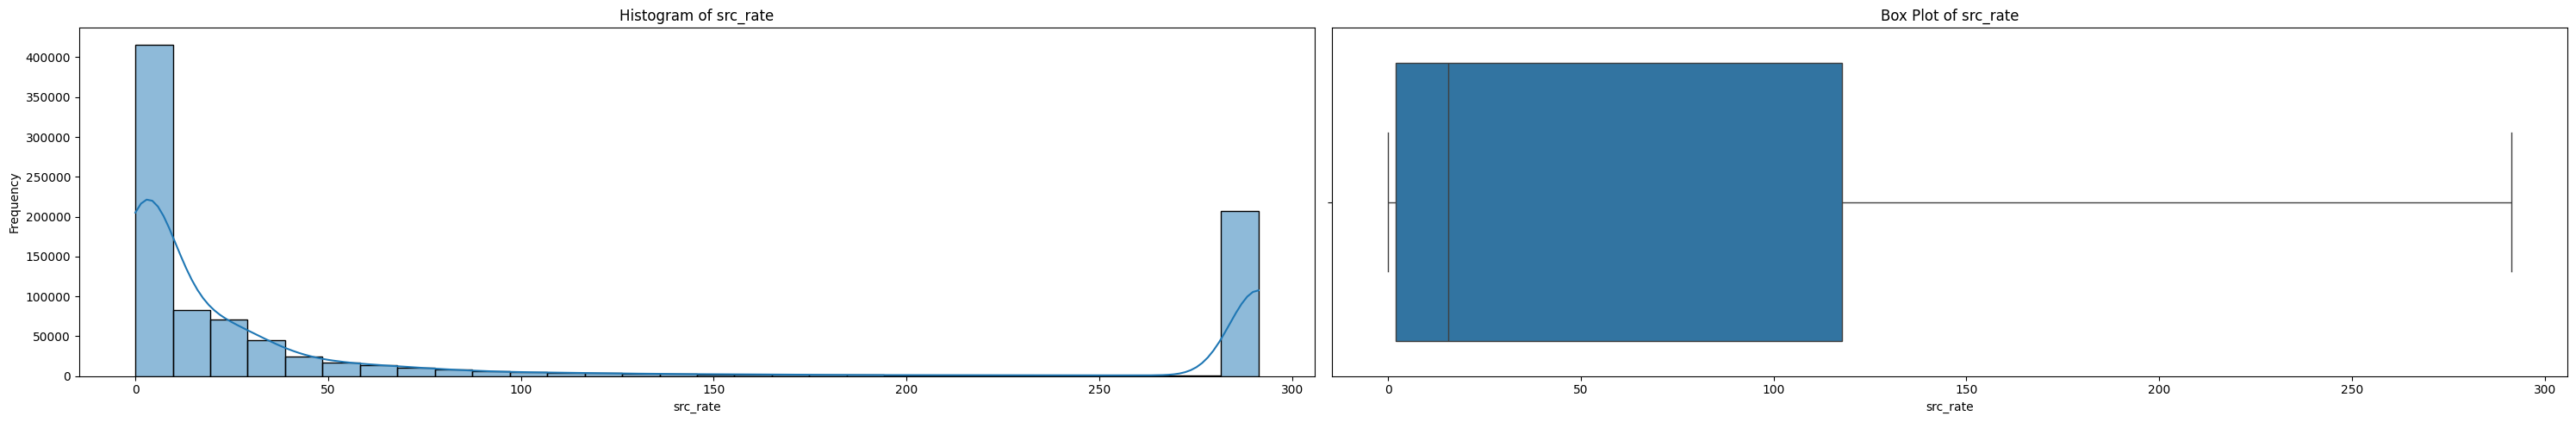

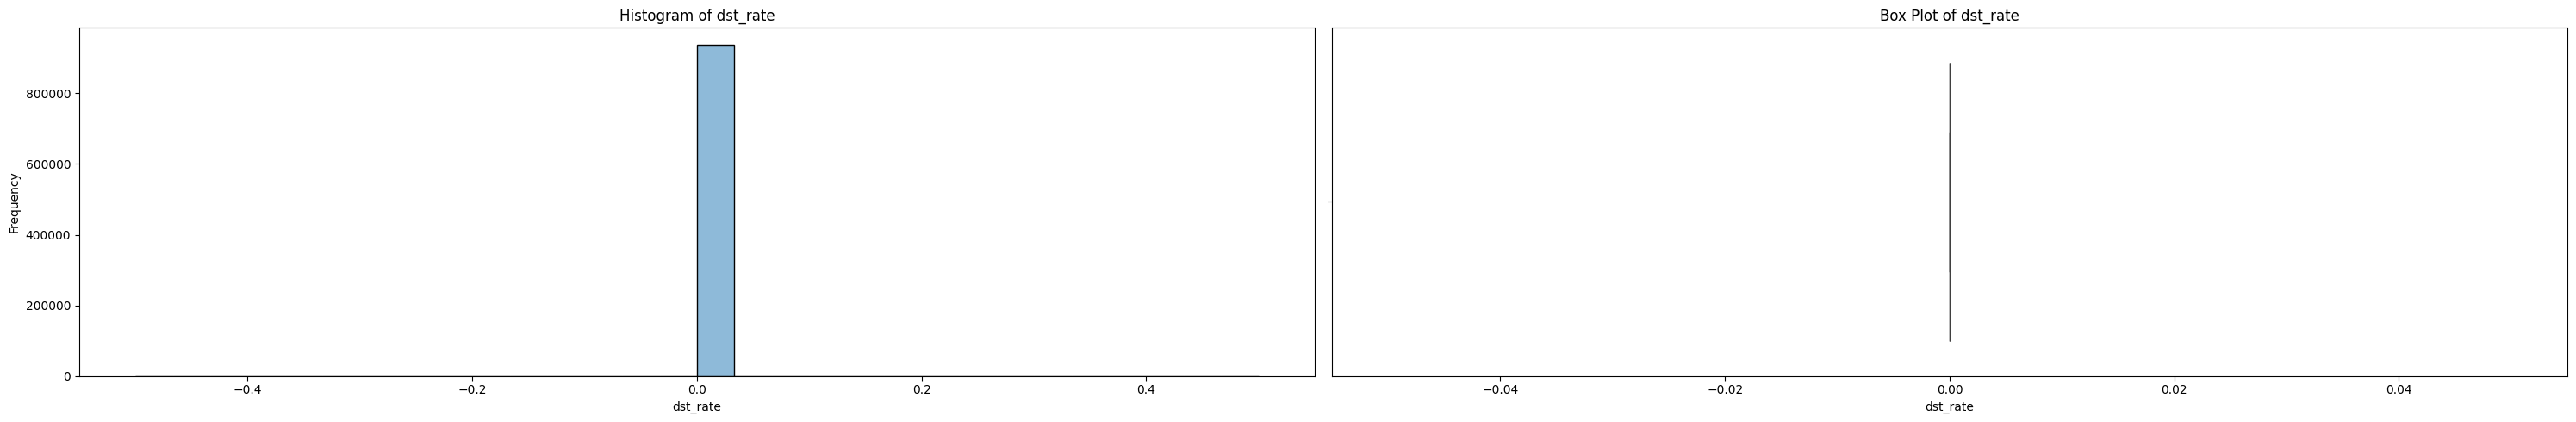

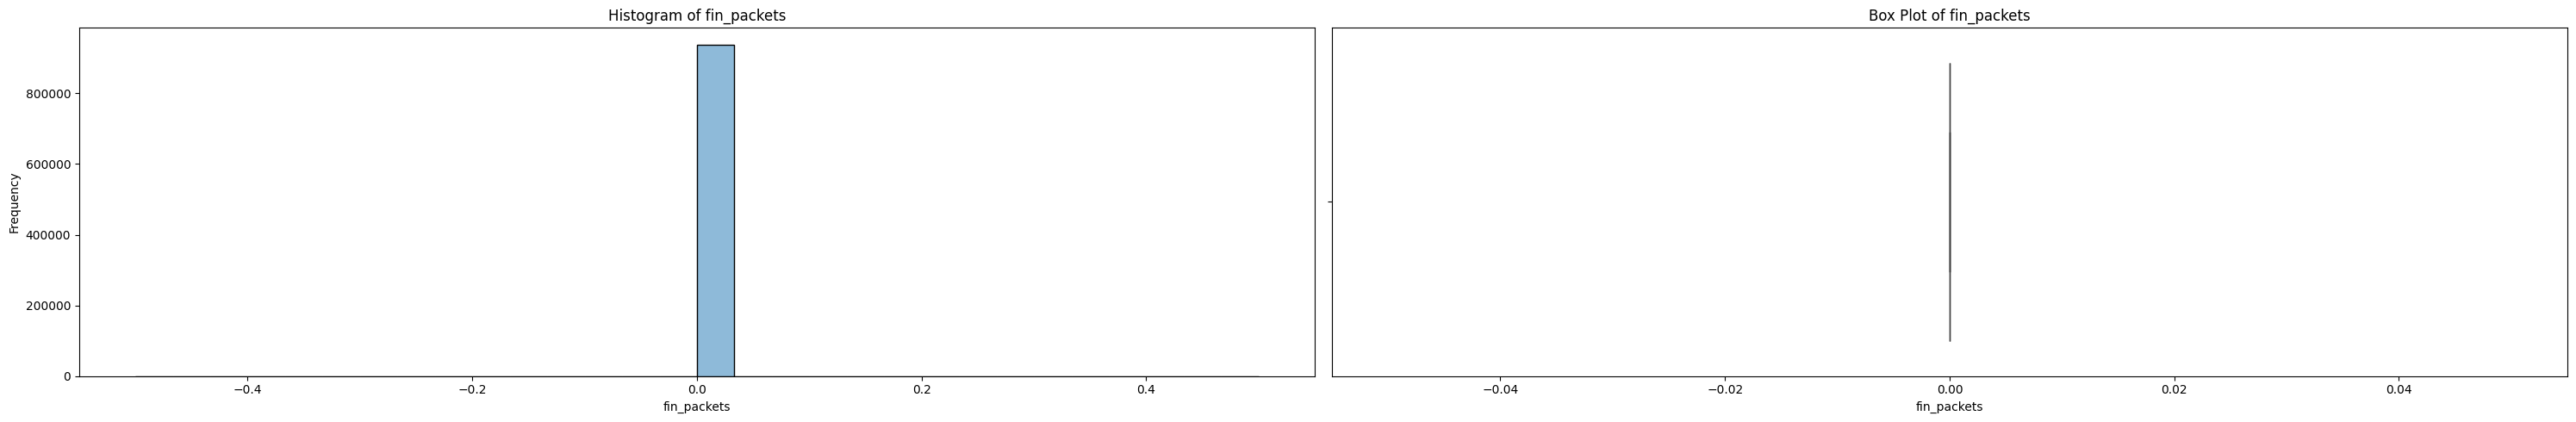

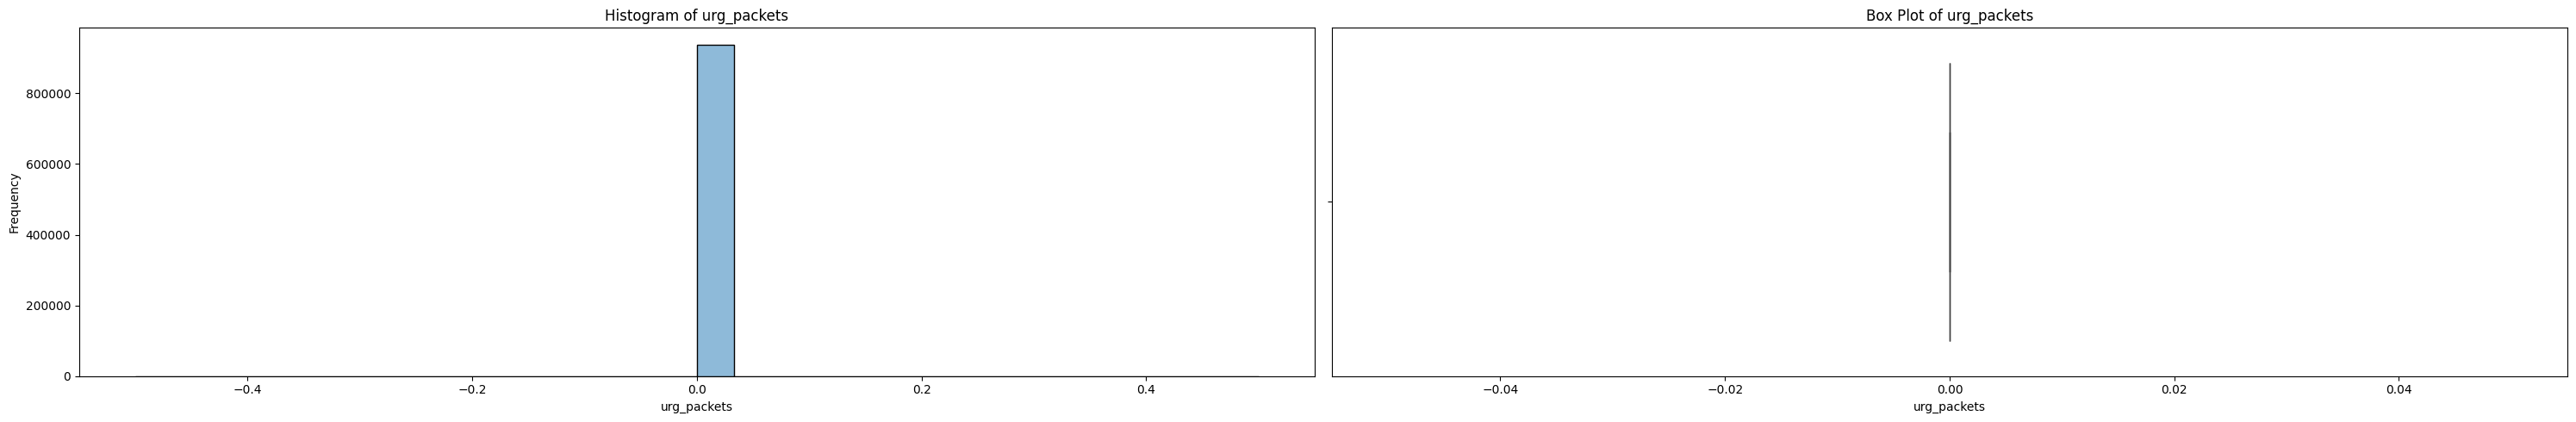

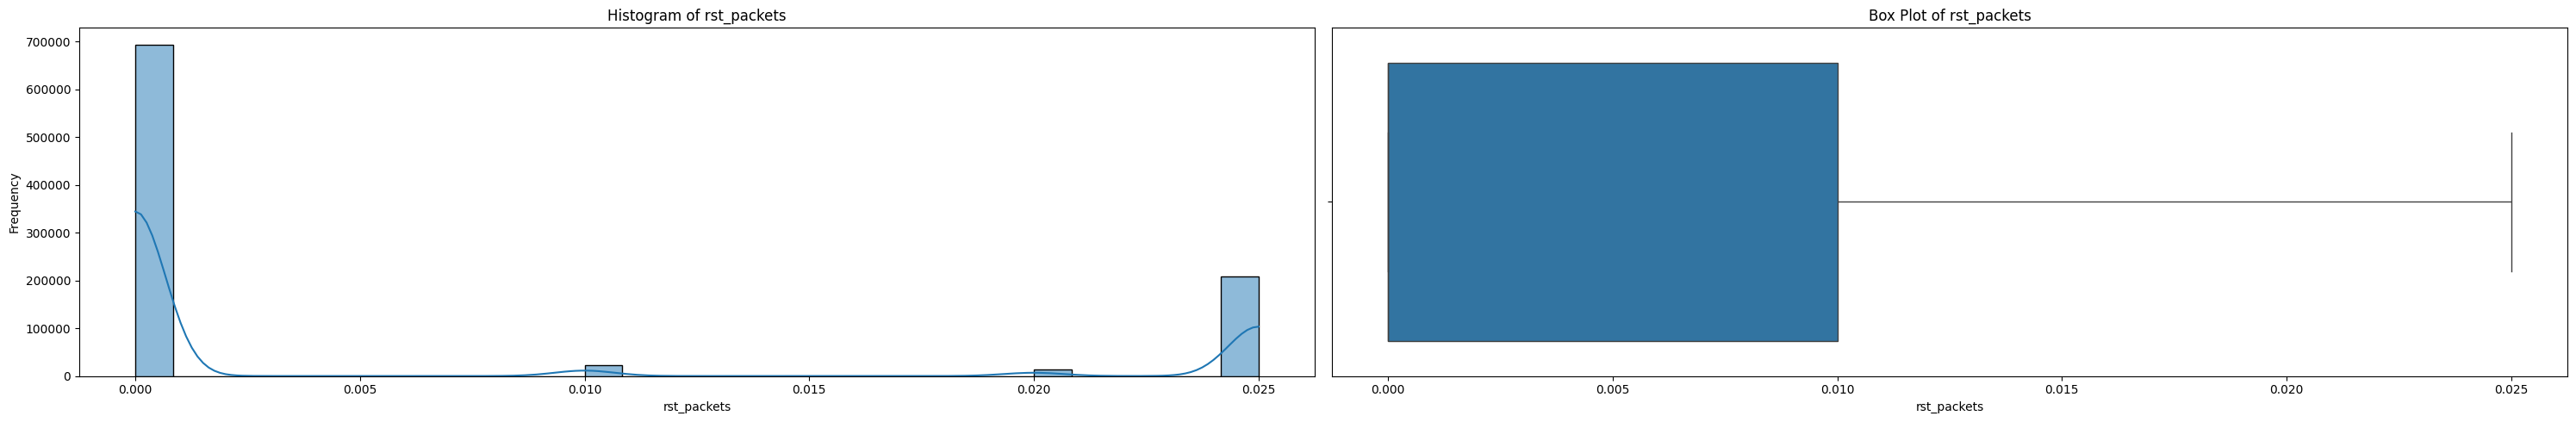

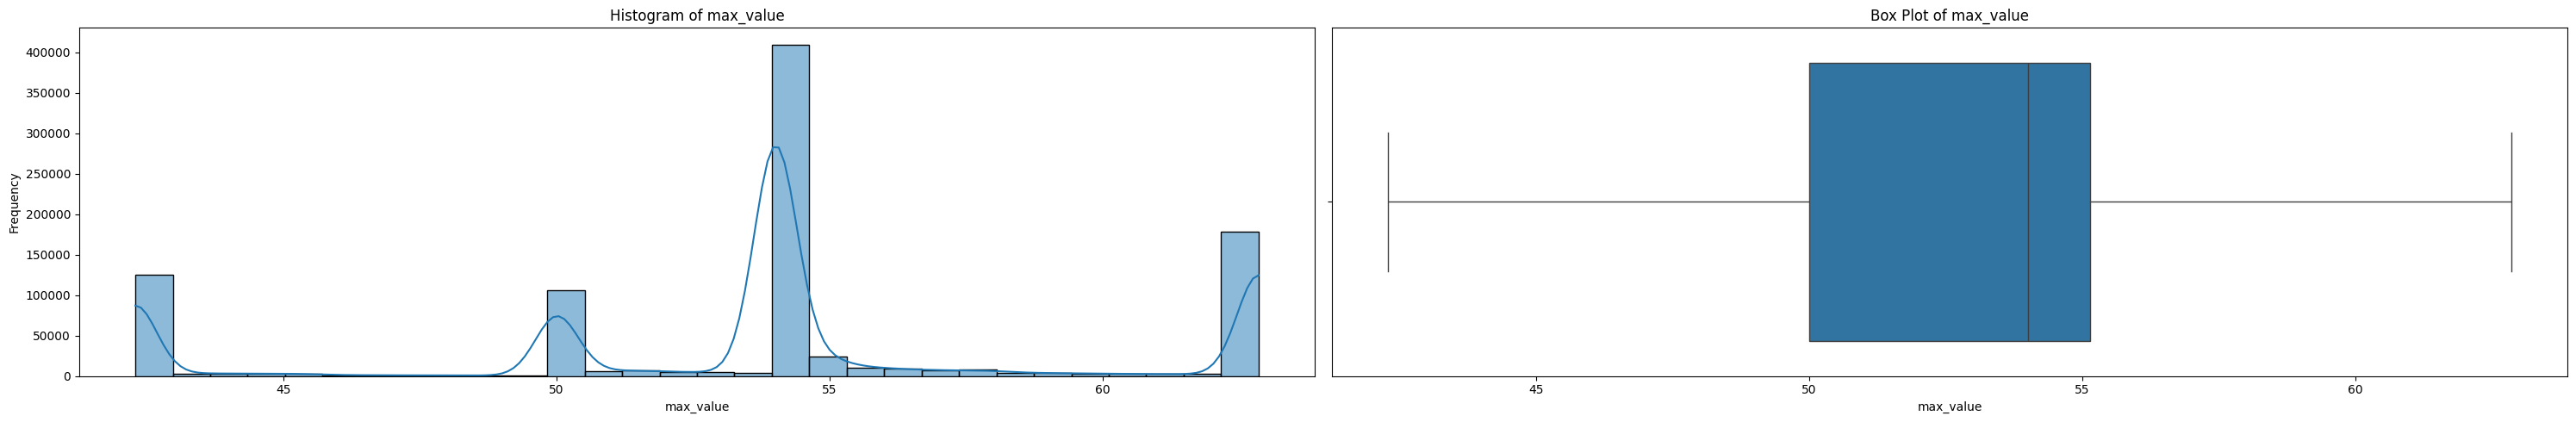

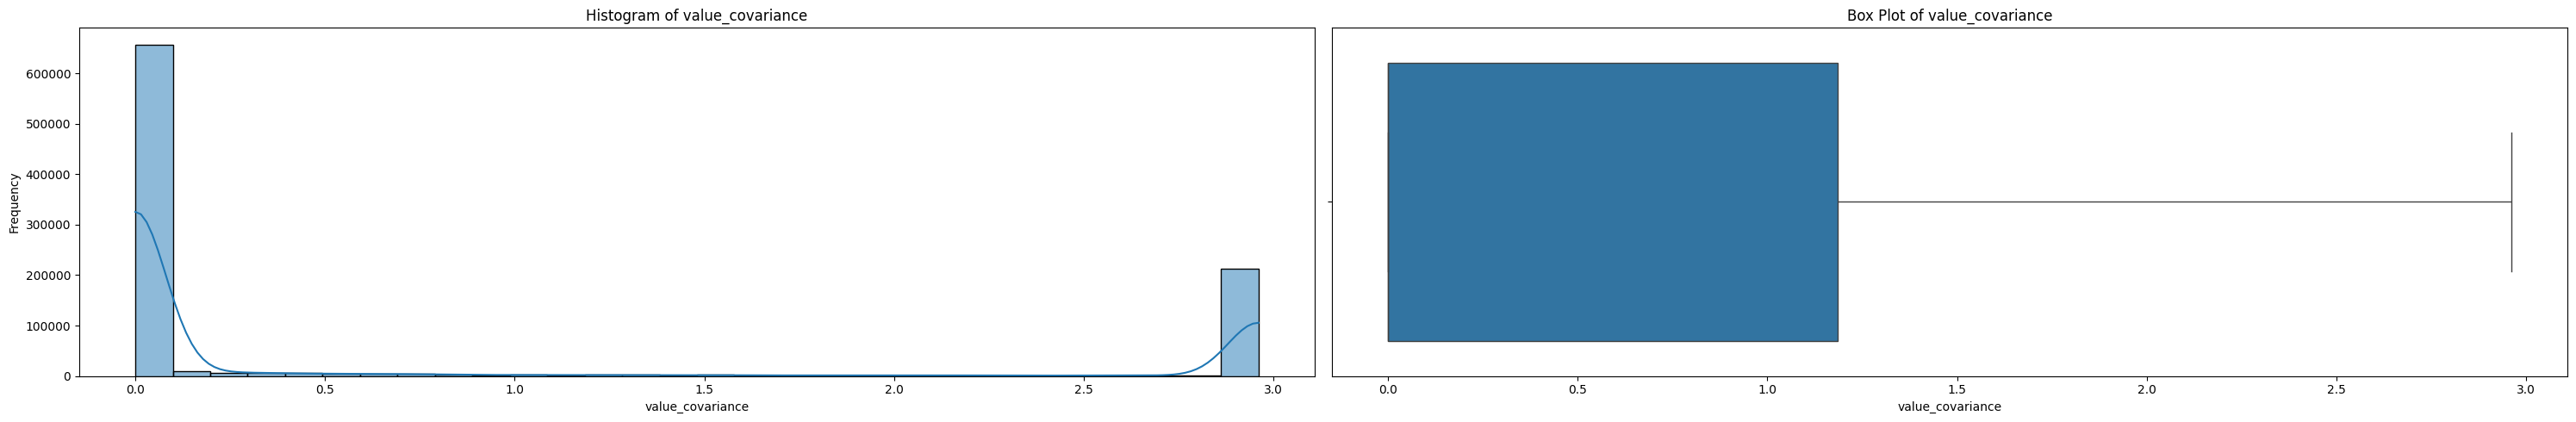

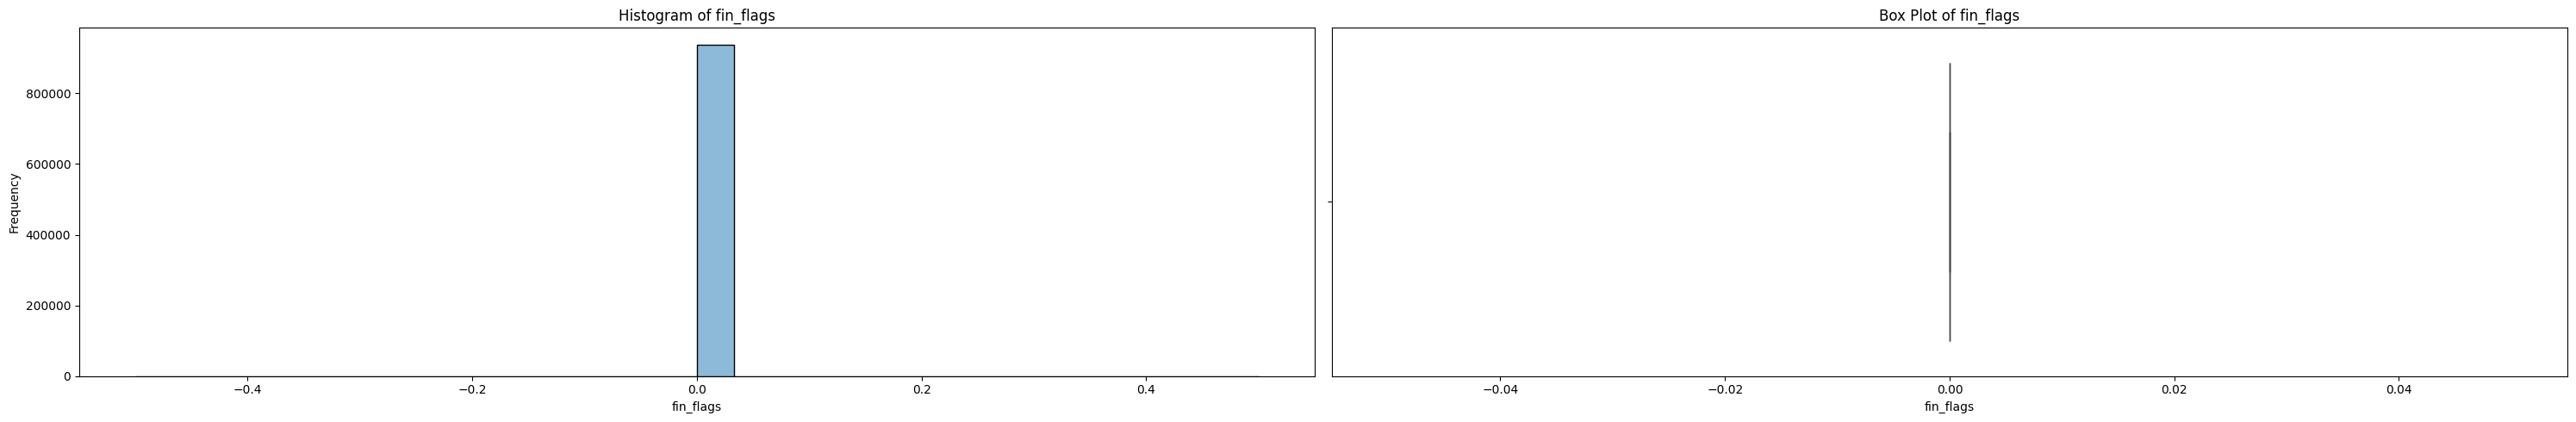

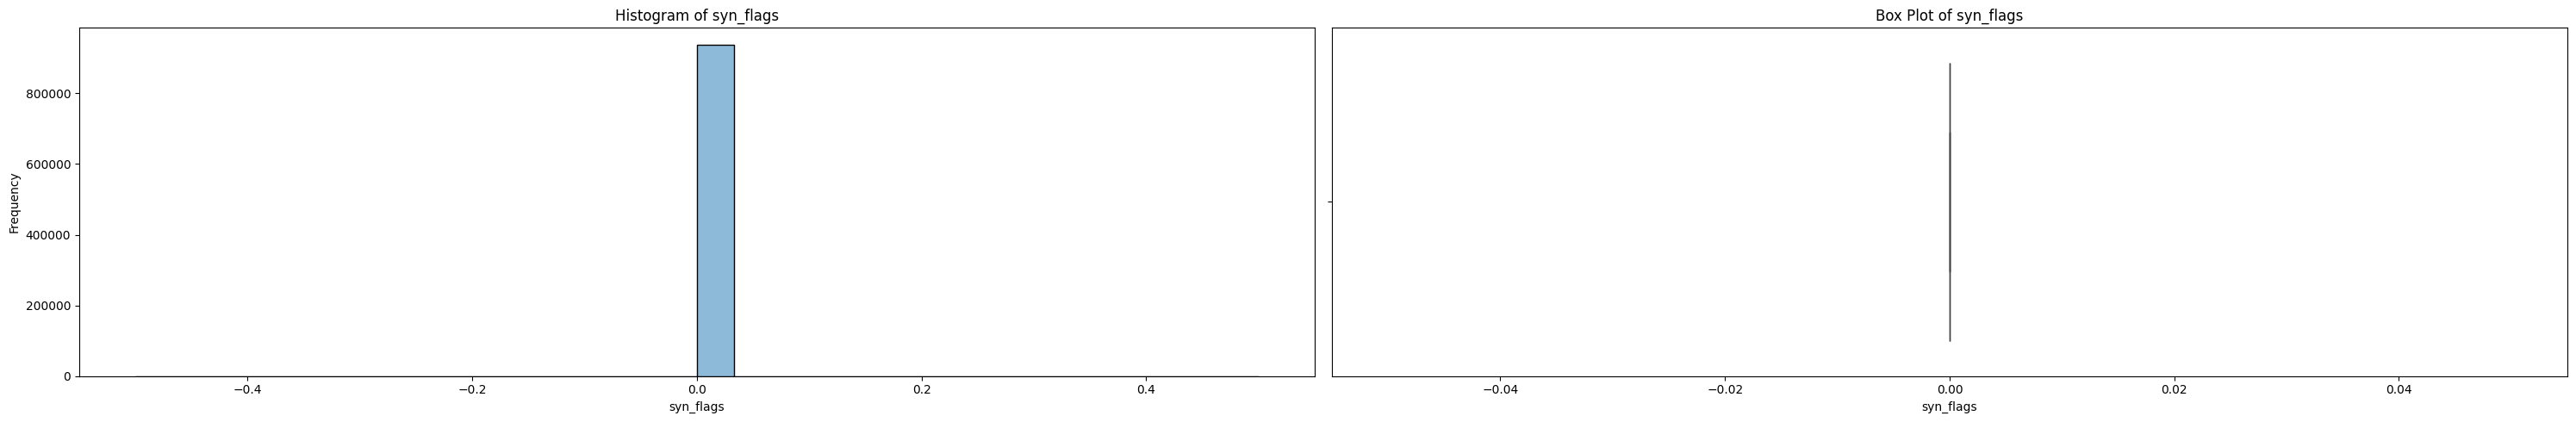

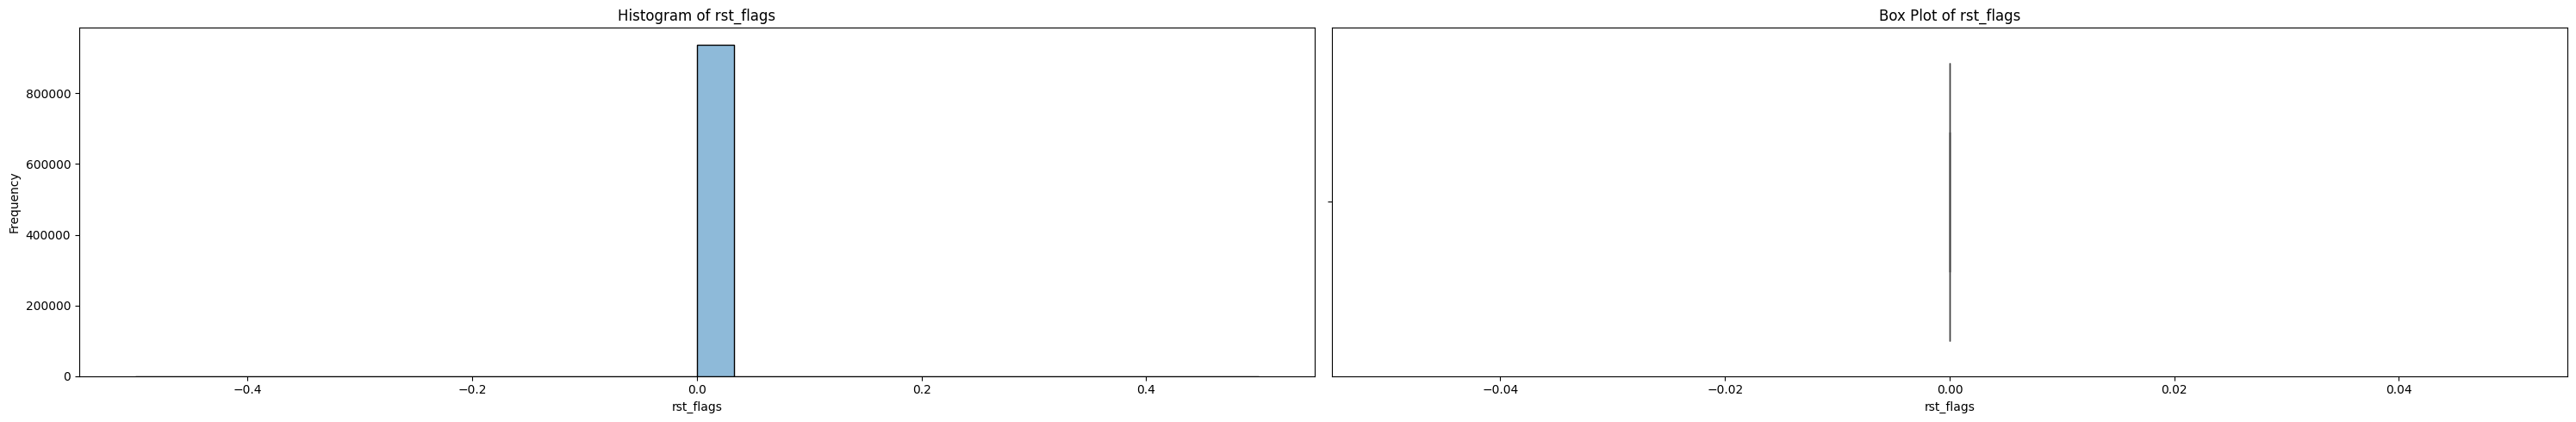

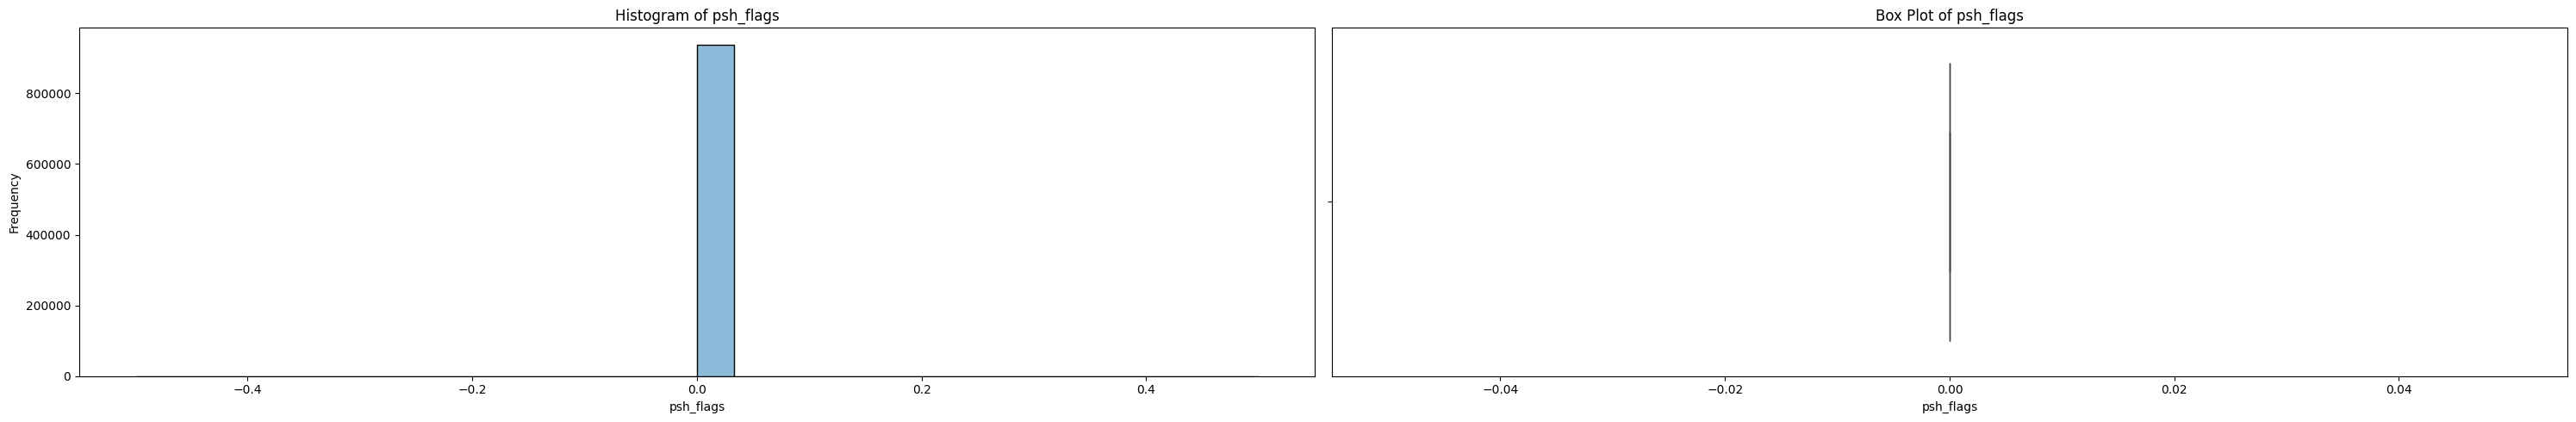

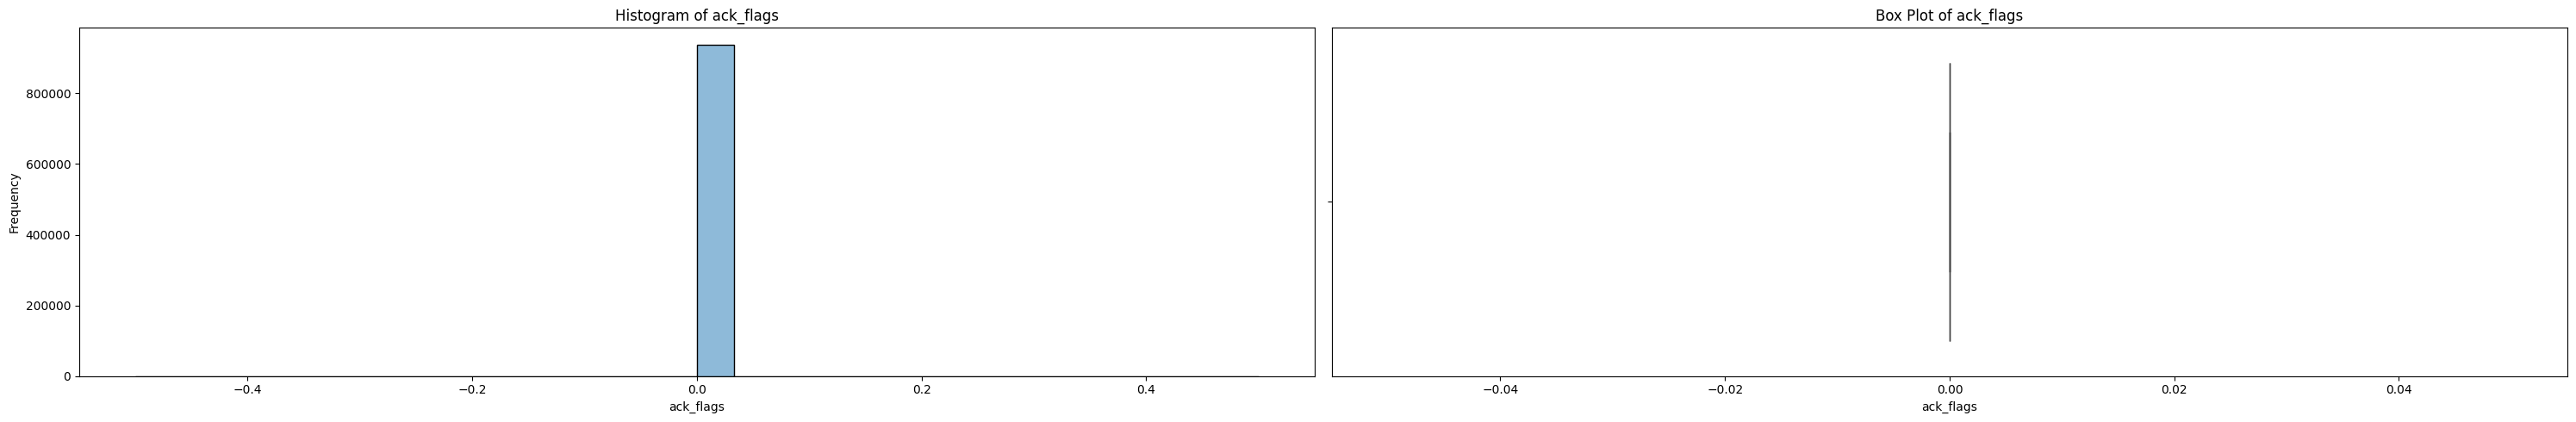

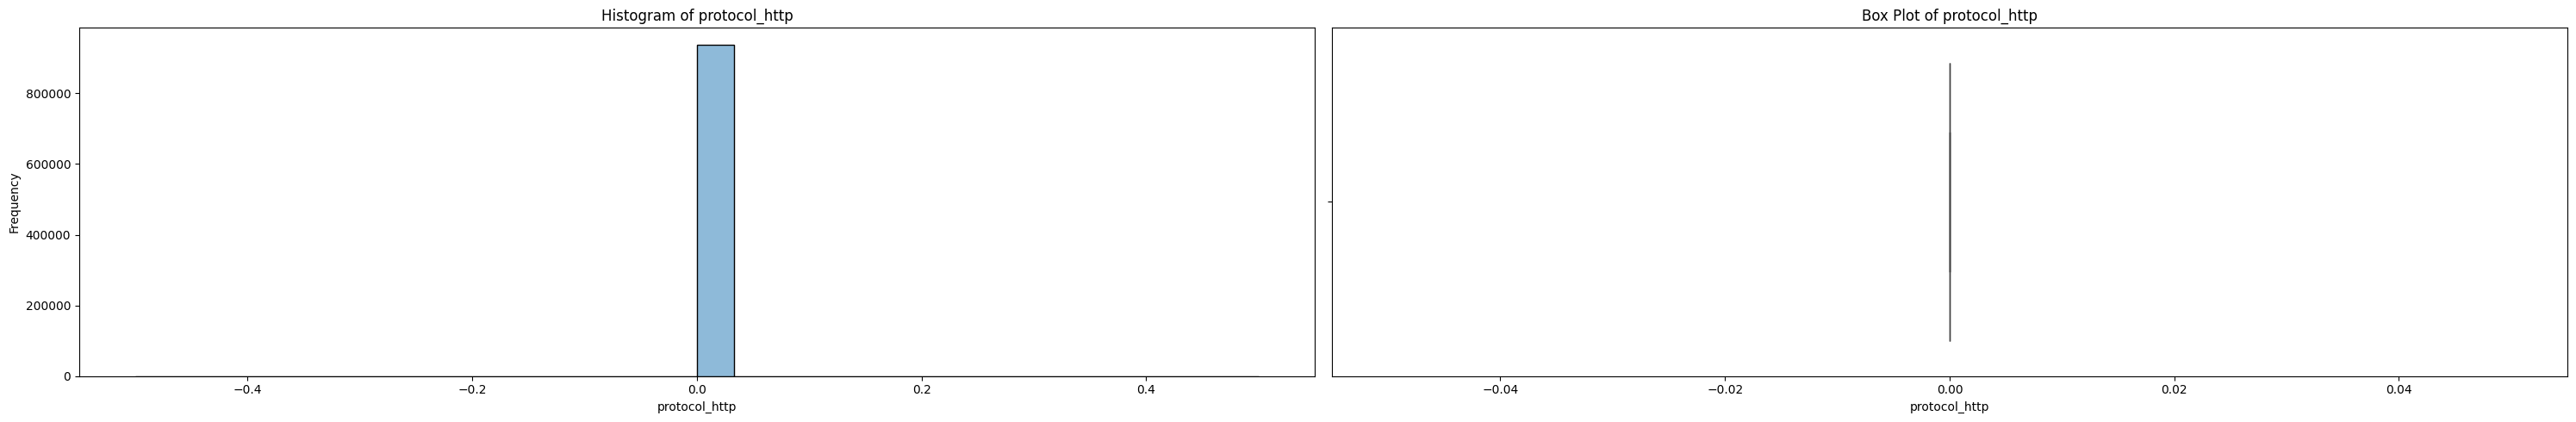

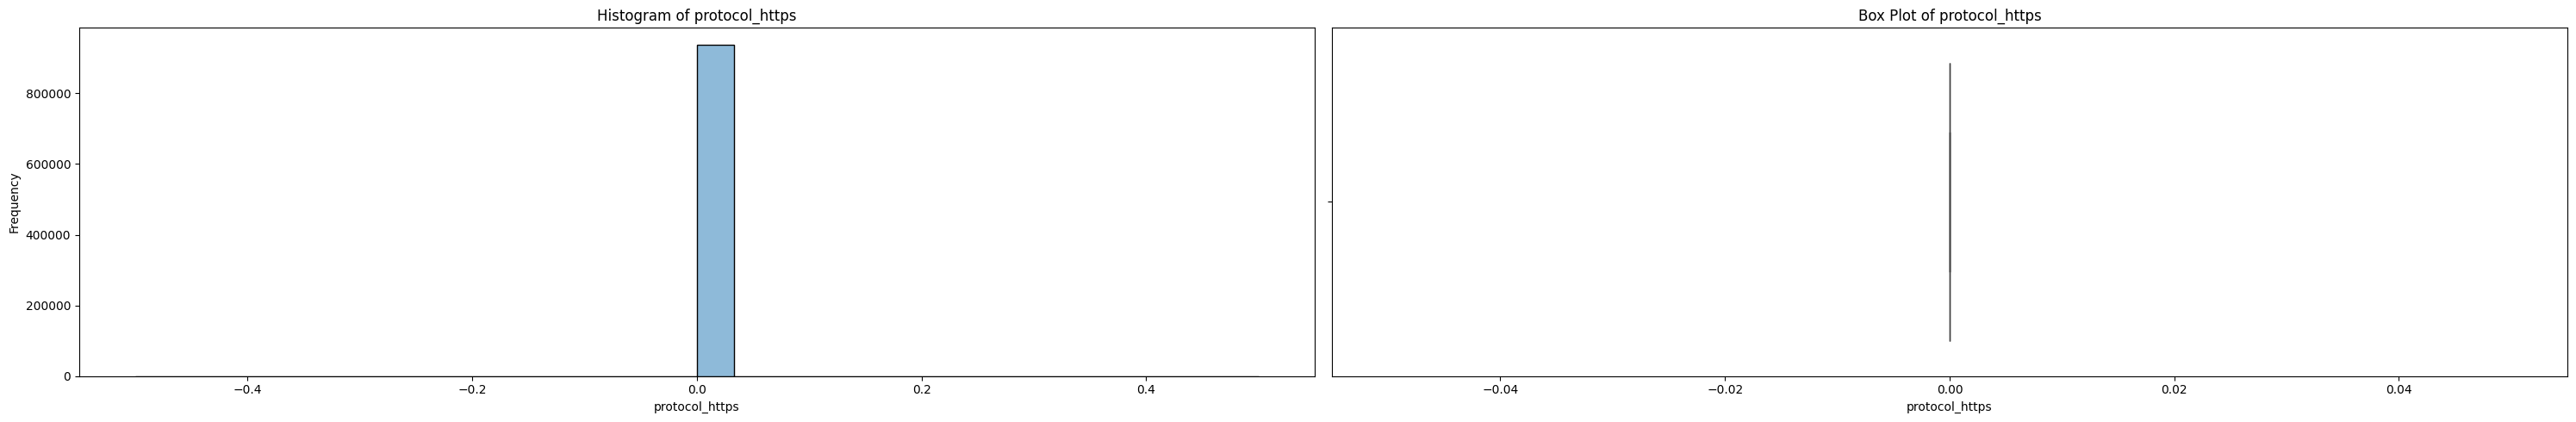

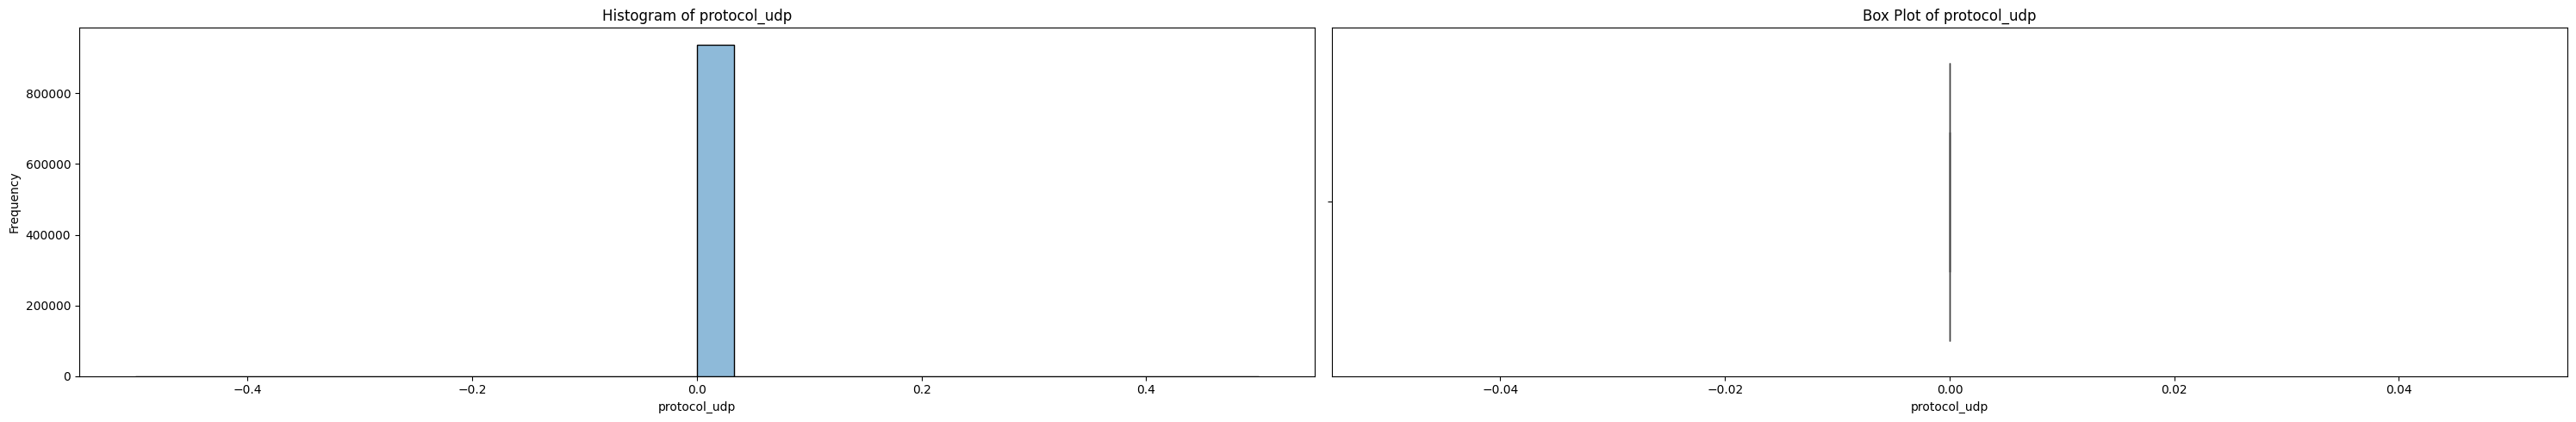

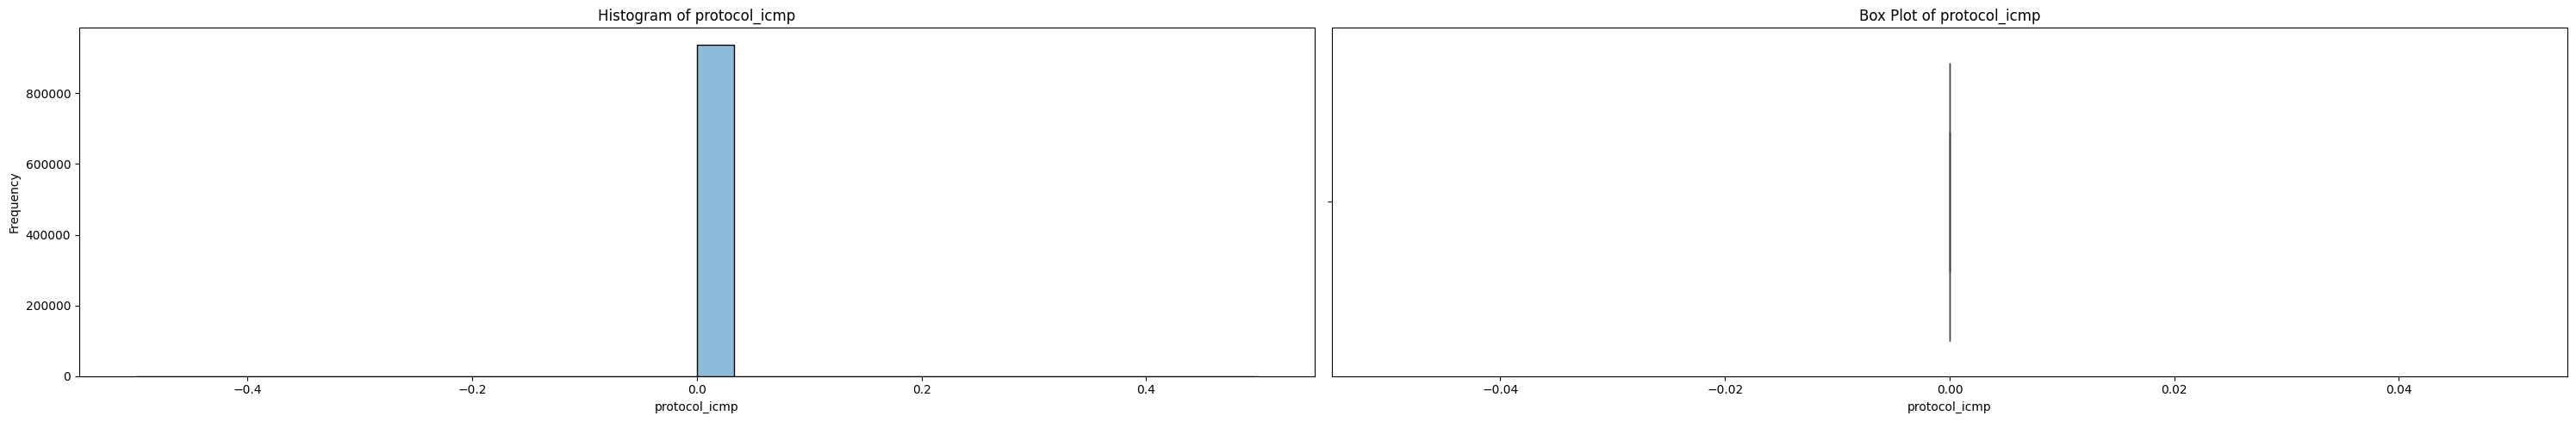

In [43]:
#Visualize outlier columns after handling outliers (Histograms and Box Plots)

def plot_distributions(df, cols):
    for col in cols:
        plt.figure(figsize=(30, 5))

        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col}')

        plt.tight_layout()
        plt.show()

plot_distributions(data, copy_of_outlier_columns)

In [44]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [45]:
df['label'] = label_encoder.fit_transform(df['label'])

In [46]:
target = df['label'].value_counts()

In [47]:
X = df.drop(columns=['label'])
y = df['label']

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [49]:
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer(output_distribution='normal')

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
# from sklearn.ensemble import RandomForestClassifier
# rf_model = RandomForestClassifier(random_state=42)
# rf_model.fit(X_train_scaled, y_train)

In [51]:
# from sklearn.metrics import accuracy_score
# y_pred_rf = rf_model.predict(X_test_scaled)
# acc_rf = accuracy_score(y_test, y_pred_rf)
# print(f"Random Forest Accuracy: {acc_rf:.4f}")

In [52]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:29:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:36:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [53]:
y_pred_xgb = xgb_model.predict(X_test_scaled)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {acc_xgb:.4f}")

XGBoost Accuracy: 0.9111
XGBoost Accuracy: 0.9113


In [54]:
# from sklearn.ensemble import (
#     RandomForestClassifier,
#     ExtraTreesClassifier,
#     VotingClassifier,
#     StackingClassifier
# )
# from sklearn.tree import DecisionTreeClassifier
# from imblearn.ensemble import BalancedRandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score

# # assume X_train_scaled, X_test_scaled, y_train, y_test are already defined

# # ——— Base learners ———
# dt = DecisionTreeClassifier(random_state=42)
# rf = RandomForestClassifier(random_state=42)
# et = ExtraTreesClassifier(random_state=42)
# brf = BalancedRandomForestClassifier(random_state=42)
# xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# # ——— 1. Stacking Ensemble ———
# stack = StackingClassifier(
#     estimators=[
#         ('dt', dt),
#         ('rf', rf),
#         ('et', et),
#         ('brf', brf),
#         ('xgb', xgb)
#     ],
#     final_estimator=RandomForestClassifier(random_state=42),  # meta learner
#     cv=5,
#     passthrough=False,    # only meta-features
#     n_jobs=1
# )
# stack.fit(X_train_scaled, y_train)
# y_pred_stack = stack.predict(X_test_scaled)
# acc_stack = accuracy_score(y_test, y_pred_stack)
# print(f"Stacking Ensemble Accuracy: {acc_stack:.4f}")

# # ——— 2. Soft Voting Ensemble ———
# voting = VotingClassifier(
#     estimators=[
#         ('rf', rf),
#         ('et', et),
#         ('xgb', xgb),
#         ('brf', brf)
#     ],
#     voting='soft',       # average predicted probabilities
#     weights=[1, 1, 2, 1],  # optionally weight the stronger model
#     n_jobs=-1
# )
# voting.fit(X_train_scaled, y_train)
# y_pred_vote = voting.predict(X_test_scaled)
# acc_vote = accuracy_score(y_test, y_pred_vote)
# print(f"Soft Voting Ensemble Accuracy: {acc_vote:.4f}")

In [55]:
# https://drive.google.com/file/d/1BwU-y0RKTTrVuRhuJ-Pe-zl3YXBFMqBh/view?usp=sharing

tempID = '1BwU-y0RKTTrVuRhuJ-Pe-zl3YXBFMqBh'
tempUrl = f'https://drive.google.com/uc?id={tempID}'

test = pd.read_csv(tempUrl)

In [56]:
test_ids = test['Id']
test_features = test.drop(columns=['Id'])

# Same preprocessing on test set
for col in numerical_columns:
    if col in test_features.columns and (test_features[col] < 0).any():
        test_features[col] = test_features[col].clip(lower=0)

# Scale features
test_scaled = scaler.transform(test_features)

# 6. Predict and save submissions
# RF submission
# preds_rf = rf_model.predict(test_scaled)
# preds_rf_decoded = label_encoder.inverse_transform(preds_rf)
# submission_rf = pd.DataFrame({'Id': test_ids, 'label': preds_rf_decoded})
# submission_rf.to_csv(
#     '/content/drive/My Drive/',
#     index=False
# )
# print("Random Forest submission file created: submission_random_forest.csv")

# XGB submission
preds_xgb = xgb_model.predict(test_scaled)
preds_xgb_decoded = label_encoder.inverse_transform(preds_xgb)
submission_xgb = pd.DataFrame({'Id': test_ids, 'label': preds_xgb_decoded})
submission_xgb.to_csv(
    '/content/drive/My Drive/submission_xgboost.csv',
    index=False
)
print("XGBoost submission file created: submission_xgboost.csv")

# Predict and save ensemble submissions

# Stacking Ensemble submission
# preds_stack = stack.predict(test_scaled)
# preds_stack_decoded = label_encoder.inverse_transform(preds_stack)
# submission_stack = pd.DataFrame({'Id': test_ids, 'label': preds_stack_decoded})
# submission_stack.to_csv(
#     '/content/drive/My Drive/',
#     index=False
# )
# print("Stacking submission file created: submission_stacking.csv")

# Soft Voting Ensemble submission
# preds_vote = voting.predict(test_scaled)
# preds_vote_decoded = label_encoder.inverse_transform(preds_vote)
# submission_vote = pd.DataFrame({'Id': test_ids, 'label': preds_vote_decoded})
# submission_vote.to_csv(
#     '/content/drive/My Drive/',
#     index=False
# )
# print("Soft Voting submission file created: submission_voting.csv")

XGBoost submission file created: submission_xgboost.csv
XGBoost submission file created: submission_xgboost.csv
